# **1- INGESTA Y PROCESADO INICIAL**

Antes de comenzar, se debe entender claramente qué tipo de dataset es el que se va a analizar.

Este dataset es un extracto bancario de una cuenta de Caja Rural. La intención principal del análisis es responder a las siguientes preguntas:
1. ¿Cuál es mi balance general actual? ¿Y mi balance mensual?
2. ¿Cómo ha evolucionado mi saldo?
3. ¿Cuáles han sido mis mayores fuentes de ingreso?
4. ¿Cuáles han sido mis mayores gastos?
5. ¿Como es la distribución de mis gastos?
6. Previsión de gastos hasta final de año
7. Previsón de ingresos hasta final de año
8. Previsión de balance a final de año
7. Alertas: con objetivo en balance a final de año


**1.1- Importar datos**

In [81]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [82]:
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 12

In [83]:
plt.style.use('ggplot')

In [84]:
ruta = r'C:\Users\Cristian\Documents\6- Proyectos\2- Python\2-Analisis finanzas personales\Extractos Bancarios'
nombre_archivo = '01.01.2023-15.12.2023.comb.xlsx'
df = pd.read_excel(ruta + "/" + nombre_archivo)


In [85]:
df.head()

Fecha de la operación Fecha valor                   Concepto  Importe  \
0            2023-12-15  15/12/2023       tj-restaurante bazan    -3.20   
1            2023-12-15         NaN  petroprix puerto de s.mar   -72.27   
2            2023-12-15  15/12/2023   rcbo. préstamo5618504251  -291.84   
3            2023-12-14  14/12/2023              tj-shah kebab   -10.00   
4            2023-12-14  14/12/2023              tj-pura tasca    -1.30   

     Saldo  Nro. Apunte  
0  8444.18       1800.0  
1  8447.38          NaN  
2  8519.65       1799.0  
3  8811.49       1798.0  
4  8821.49       1797.0

**1.2- Renombrar columnas**

In [86]:
df.rename(columns={"Fecha de la operación": "Fecha"}, inplace = True)
df.head()

Fecha Fecha valor                   Concepto  Importe    Saldo  \
0 2023-12-15  15/12/2023       tj-restaurante bazan    -3.20  8444.18   
1 2023-12-15         NaN  petroprix puerto de s.mar   -72.27  8447.38   
2 2023-12-15  15/12/2023   rcbo. préstamo5618504251  -291.84  8519.65   
3 2023-12-14  14/12/2023              tj-shah kebab   -10.00  8811.49   
4 2023-12-14  14/12/2023              tj-pura tasca    -1.30  8821.49   

   Nro. Apunte  
0       1800.0  
1          NaN  
2       1799.0  
3       1798.0  
4       1797.0

Se borra la columna "Fecha valor", ya que no aporta nada interesante al df

In [87]:
df.drop(['Fecha valor', 'Nro. Apunte'], axis = 1, inplace = True)
df.head()

Fecha                   Concepto  Importe    Saldo
0 2023-12-15       tj-restaurante bazan    -3.20  8444.18
1 2023-12-15  petroprix puerto de s.mar   -72.27  8447.38
2 2023-12-15   rcbo. préstamo5618504251  -291.84  8519.65
3 2023-12-14              tj-shah kebab   -10.00  8811.49
4 2023-12-14              tj-pura tasca    -1.30  8821.49

**1.3- Relacionar los tipos de datos en el dataset**

In [88]:
df.dtypes

Fecha       datetime64[ns]
Concepto            object
Importe            float64
Saldo              float64
dtype: object

Se convierte la columna de "Fecha" en un tipo de dato fecha y concepto en category

In [89]:
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst = True)
df['Concepto']  = df['Concepto'].astype('category')
df.dtypes

Fecha       datetime64[ns]
Concepto          category
Importe            float64
Saldo              float64
dtype: object

Se ordena el dataset por fecha

In [90]:
df.sort_values(by = "Fecha", inplace = True)
df.reset_index(inplace = True, drop = True)
df.head(10)

Fecha                                       Concepto  Importe     Saldo
0 2023-01-01            trf. rosa maria rodriguez fernandez   -90.00  11106.72
1 2023-01-02                  cargo bizum - regalo chaqueta   -50.00  12997.37
2 2023-01-02                         cargo bizum - comilona   -50.00  12947.37
3 2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65  13047.37
4 2023-01-03                                tj-primor bahia   -55.48  12885.89
5 2023-01-03                             rcbo.adeslas cadiz   -59.00  12805.89
6 2023-01-03                     tj-primark cadiz bahia sur   -21.00  12864.89
7 2023-01-03                       rcbo. préstamo5589240554  -389.07  13592.82
8 2023-01-03                             tj-casa maxi china   -24.00  12781.89
9 2023-01-03                     tj-primark cadiz bahia sur    -6.00  12941.37

Al ordenar por fecha, puede que se haya mezclado el orden de los movimientos en un mismo día. Por ello, se debe recalcular el saldo

In [91]:
for i, fila in df.iterrows():
    if i == 0:
        pass
    else:
        df['Saldo'].iloc[i] = df['Saldo'].iloc[i - 1] + fila['Importe']

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1629926228.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Saldo'].iloc[i] = df['Saldo'].iloc[i - 1] + fila['Importe']


In [92]:
df.head(10)

Fecha                                       Concepto  Importe     Saldo
0 2023-01-01            trf. rosa maria rodriguez fernandez   -90.00  11106.72
1 2023-01-02                  cargo bizum - regalo chaqueta   -50.00  11056.72
2 2023-01-02                         cargo bizum - comilona   -50.00  11006.72
3 2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65  12947.37
4 2023-01-03                                tj-primor bahia   -55.48  12891.89
5 2023-01-03                             rcbo.adeslas cadiz   -59.00  12832.89
6 2023-01-03                     tj-primark cadiz bahia sur   -21.00  12811.89
7 2023-01-03                       rcbo. préstamo5589240554  -389.07  12422.82
8 2023-01-03                             tj-casa maxi china   -24.00  12398.82
9 2023-01-03                     tj-primark cadiz bahia sur    -6.00  12392.82

Se echa un vistazo general a la evolución del saldo

In [93]:
colores_I_G = ['#196F3D', '#E74C3C']

Text(0.5, 1.0, 'Evolución del Saldo')

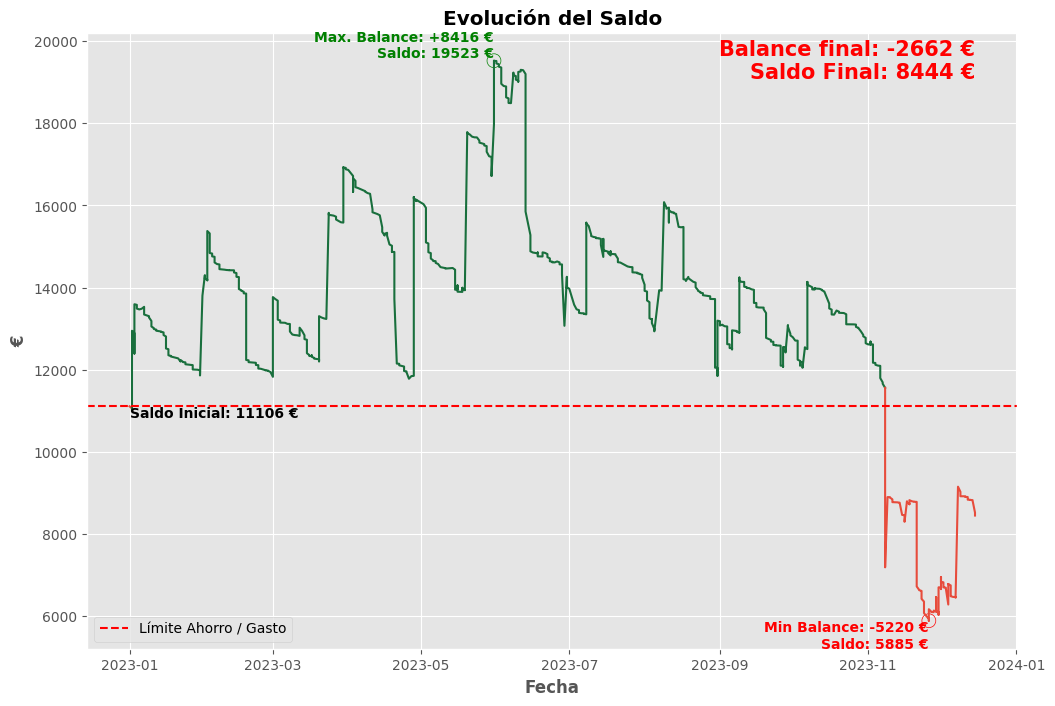

In [94]:
etiquetas = df['Fecha']
valores = df['Saldo']


#plt.plot(etiquetas, valores, color = '#3498DB')

#Ahora se van a graficar textos de información relativo a máximos y míminos
valor_inicial = df['Saldo'].iloc[0]
valor_final = df['Saldo'].iloc[-1]
max_balance = 0
min_balance = 0
for i, valor in enumerate(valores):
    if (valor - valor_inicial) > max_balance:
        max_balance = int(valor - valor_inicial)
        pos_max_balance = i
    if (valor - valor_inicial) < min_balance:
        min_balance = int(valor - valor_inicial)
        pos_min_balance = i

i_inicial = 0
i_final = df['Saldo'].size - 1
status = False
for i, valor in enumerate(valores):
    if i == i_inicial:
        pass
    else:
        #Se evalúa qué dirección toma. Status True se usará para estados positivos, False para negativos
        if valor >= valor_inicial:
            change_status = status == False
            status = True
        else:
            change_status = status == True
            status = False
        
        if change_status == True:
            color = colores_I_G[1] if status == True else colores_I_G[0]
            plt.plot(etiquetas[i_inicial:i], valores [i_inicial:i], color = color)
            i_inicial = i - 1
        elif i == i_final:
            color = colores_I_G[0] if status == True else colores_I_G[1]
            plt.plot(etiquetas[i_inicial:i], valores [i_inicial:i], color = color)

#Se añade información al gráfico
        
#Saldo inicial
plt.text(etiquetas.iloc[0], valores.iloc[0], f"Saldo Inicial: {int(valores[0])} €", va = 'top', ha = 'left', fontweight = 'bold', fontsize = 10, color = 'black')   
#Máximo balance
balance = int(valor_final - valor_inicial)
plt.text(etiquetas.iloc[pos_max_balance], valores.iloc[pos_max_balance], f"Max. Balance: +{max_balance} €\nSaldo: {int(valores[pos_max_balance])} €", va = 'bottom', ha = 'right', fontweight = 'bold', fontsize = 10, color = 'g')
plt.scatter(etiquetas.iloc[pos_max_balance], valores.iloc[pos_max_balance], marker = 'o', color = 'none', edgecolor = 'g', s = 100)
#Mínimo balance
plt.text(etiquetas.iloc[pos_min_balance], valores.iloc[pos_min_balance], f"Min Balance: {min_balance} €\nSaldo: {int(valores[pos_min_balance])} €", va = 'top', ha = 'right', fontweight = 'bold', fontsize = 10, color = 'r')
plt.scatter(etiquetas.iloc[pos_min_balance], valores.iloc[pos_min_balance], marker = 'o', color = 'none', edgecolor = 'r', s = 100)
#balance final
color_balance = 'r' if balance < 0 else 'g'
plt.text(etiquetas.iloc[-1], max(valores), f"Balance final: {balance} €\nSaldo Final: {int(valor_final)} €", va = 'center', ha = 'right', fontweight = 'bold', fontsize = 15, color = color_balance)
#Dibuja constante como la barrera entre balance negativo o positivo
plt.axhline(valores[0], color = 'r', linestyle = '--', label = 'Límite Ahorro / Gasto')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend(loc = 'lower left')
plt.title('Evolución del Saldo')

También se observa el comportamiento de los importes

Text(0.5, 1.0, 'Distribución de Importes')

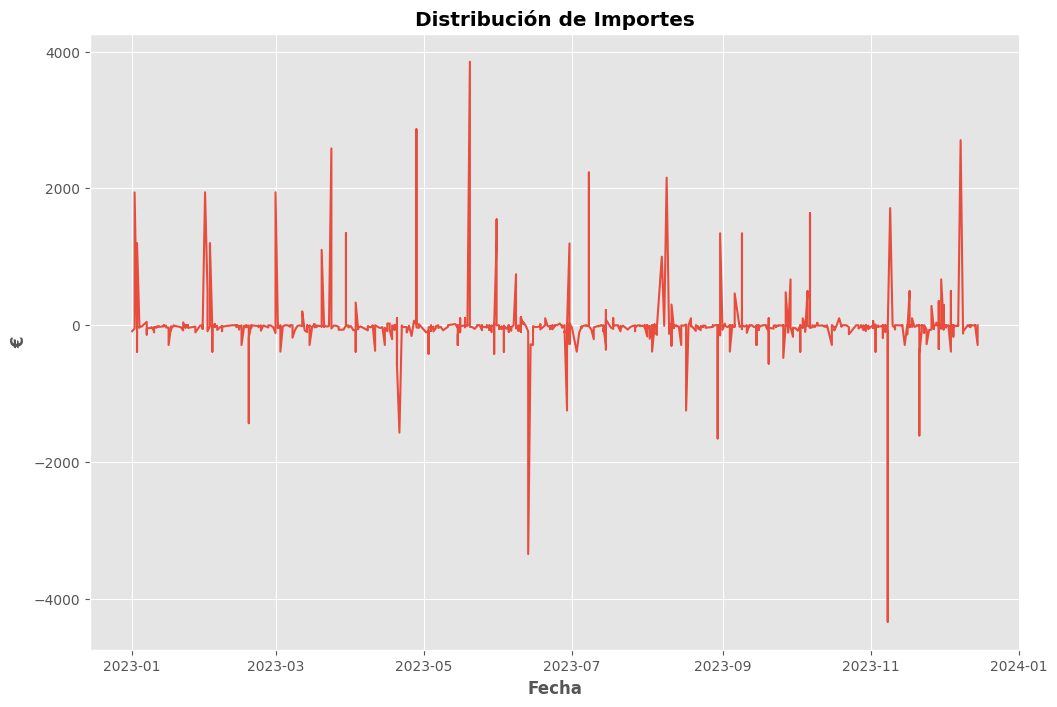

In [95]:
plt.plot(df['Fecha'], df['Importe'], color = '#E74C3C')
plt.xlabel('Fecha')
plt.ylabel('€')
plt.title('Distribución de Importes')

# **2- Diagnóstico de calidad de los datos (QA)**

**2.1- Duplicados**

Este df es un extracto del banco, no debería tener duplicados completos en filas ya que cada fila tiene su propio ID

In [96]:
df[df.duplicated()].shape

(0, 4)

Vemos que no hay ningún duplicado (el cero representa la cantidad de filas duplicadas)

**2.2- Duplicidad por categoría**

Las únicas columnas que deben de ser analizadas para encontrar valores repetidos en ellas por separado son 'Fecha' (para saber cuántos movimientos se han realizado en un solo día) y 'Concepto' (para saber cuáles son los conceptos más repetitivos e identificar las mayores frecuencias)

In [97]:
df['Fecha'].value_counts()

Fecha
2023-07-15    9
2023-05-15    8
2023-10-04    8
2023-11-02    8
2023-12-02    8
             ..
2023-04-13    1
2023-04-14    1
2023-08-16    1
2023-08-09    1
2023-01-01    1
Name: count, Length: 308, dtype: int64

Se observa que 9 es el mayor número de movimientos en un solo día y 1 el mínimo. Este día fue el 15 de Julio de 2023. Esto se puede ver mejor con una gráfica para observar el top 10.

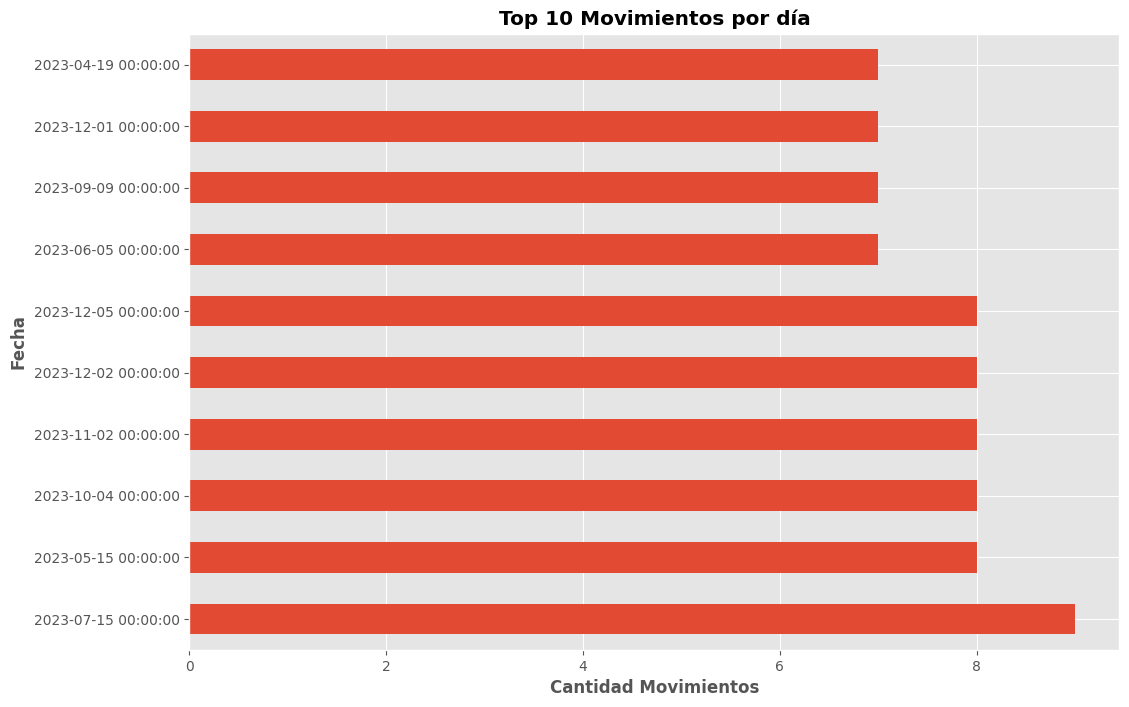

In [98]:
df['Fecha'].value_counts().head(10).plot.barh()
plt.xlabel("Cantidad Movimientos")
plt.ylabel("Fecha")
plt.title("Top 10 Movimientos por día")
plt.show()

Además, si queremos ver concretamente cuáles fueron los movimientos ese dia, podemos filtrar:

In [99]:
df[df['Fecha'] == '2023-07-15']

Fecha                          Concepto  Importe     Saldo
421 2023-07-15          rcbo. préstamo5618504251  -291.83  14745.15
422 2023-07-15    abono bizum - lorena y alberto    40.00  14785.15
423 2023-07-15                abono bizum - celi    80.00  14865.15
424 2023-07-15                abono bizum - cena    20.00  14885.15
425 2023-07-15    abono bizum - toni selu y pepe    60.00  14945.15
426 2023-07-15      abono bizum - comida abuelos    20.00  14965.15
427 2023-07-15  abono bizum - regalo afri y cena   220.00  15185.15
428 2023-07-15                   tj-club nautico  -357.00  14828.15
429 2023-07-15           abono bizum - tata lola    80.00  14908.15

Ahora, veamos el concepto

In [100]:
df['Concepto'].value_counts()

Concepto
tj-primark cadiz bahia sur    28
tj-mercadona camposoto        26
tj-carref bahia               25
tj-amzn mktp es               25
tj-restaurante bazan          17
                              ..
tj-ballenoil san fernando      1
tj-bahia de cadiz              1
tj-back market                 1
tj-b72378599                   1
vorwerk international  c       1
Name: count, Length: 371, dtype: int64

Mercadona y Primark tienen el record en cuanto cantidad de transacciones con 26, seguida de amazon con 25. Sería interesante graficar para obtener un top 10.

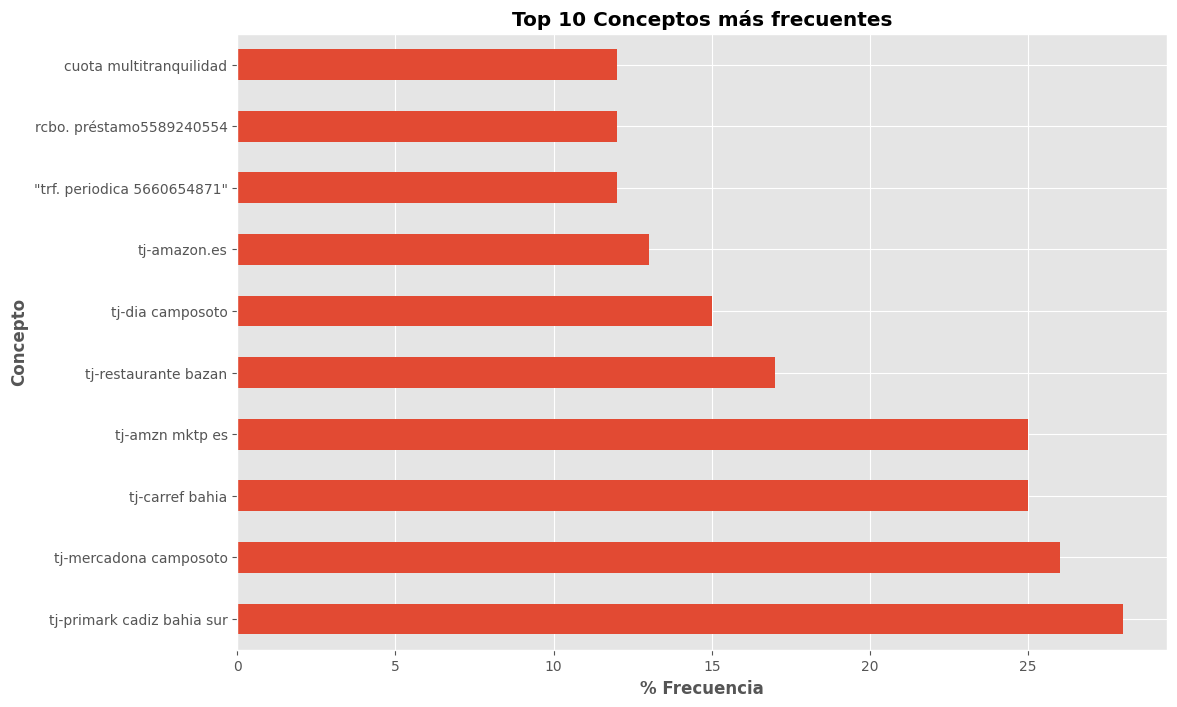

In [101]:
df['Concepto'].value_counts().head(10).plot.barh()
plt.xlabel("% Frecuencia")
plt.ylabel("Concepto")
plt.title("Top 10 Conceptos más frecuentes")
plt.show()

Se observa que amazon aparece con dos conceptos repetidos, "tj-amazn mktp es" y "tj-amazon.es". Además, se observa que una gran cantidad de conceptos tiene delante el prefijo "tj-", que quiere decir que es una transacción realizada mediante compra por tarjeta. Esto podría ser una categorización de un nivel superior para analizar. Además, existe otro concepto de tarjeta llamada "tarjeta visa classic". Este tipo de gasto es un cargo de lo acumulado en el mes anterior y pagado con la tarjeta de crédito. A diferencia con las compras con "tj-" (que son de débito), estas no se pagan al momento.

En un apartado posterior se realizarán agrupación de variables, donde se agruparán conceptos y se creará columnas con clases superiores para estudios más genéricos

**2.3- Valores inexistentes**

Al ser un extracto bancario, en teoría, no deben existir columnas con valores inexistentes, salvo que el concepto esté vacío.

In [102]:
df.isnull().sum()

Fecha       0
Concepto    0
Importe     0
Saldo       0
dtype: int64

Queda corroborado, no hay valores vacíos.

**2.4- Valores extremos (Outliers)**

Para detectar outliers, como medida general, se considerarán aquellos valores que estén tres veces desviados del zscore, es decir, se alejan 2.5 desviaciones estándares o más de la media. La fórmula del Zscore es la siguiente:
z(x)=(x - media)/ desvest.
En este df, la columna donde tiene más sentido hablar de outliers es en "Importe", que es donde se recoge el valor numérico de la transacción.

In [103]:
df_outliers = df[abs(stats.zscore(df['Importe']))>2.5]
df_outliers

Fecha                                       Concepto  Importe  \
3   2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65   
10  2023-01-03                trf. ana cristina miras sanchez  1200.00   
62  2023-01-31  trf. construcciones ferroviarias de madrid sl  1942.32   
68  2023-02-02                trf. ana cristina miras sanchez  1200.00   
107 2023-02-18                   trf. aluminios pvc sotelo sl -1435.50   
125 2023-03-01  trf. construcciones ferroviarias de madrid sl  1942.32   
168 2023-03-20                trf. ana cristina miras sanchez  1100.00   
173 2023-03-24                                        pensión  2584.21   
181 2023-03-30                                        pensión  1346.13   
230 2023-04-21                    trf. david rodriguez garcia -1573.00   
241 2023-04-28                                        pensión  2864.03   
242 2023-04-28                                        pensión  1491.90   
291 2023-05-20  trf. construcciones ferroviarias de madrid s.  3852.20   
317 2023-05-31                                        pensión  1241.08   
318 2023-05-31                                        pensión  1545.05   
356 2023-06-13                   trf. aluminios pvc sotelo sl -3349.50   
391 2023-06-29                                    trf. picazo -1250.00   
393 2023-06-30                                        pensión  1193.52   
407 2023-07-08  trf. adecco tt s a empresa de trabajo tempora  2231.26   
479 2023-08-07                trf. ana cristina miras sanchez  1000.00   
481 2023-08-09  trf. adecco tt s a empresa de trabajo tempora  2156.88   
501 2023-08-17                                   trf. picazzo -1250.00   
532 2023-08-30                   tj-clinica dental cadizsmile -1658.00   
538 2023-08-31                                        pensión  1343.13   
566 2023-09-09  trf. adecco tt s a empresa de trabajo tempora  1338.75   
651 2023-10-07  trf. adecco tt s a empresa de trabajo tempora  1636.25   
741 2023-11-08                         tj-univ int valenciana -4339.44   
743 2023-11-09  trf. adecco tt s a empresa de trabajo tempora  1710.64   
775 2023-11-21                      tj-el corte ingles-depart -1614.15   
840 2023-12-08  trf. adecco tt s a empresa de trabajo tempora  2704.39   

        Saldo  
3    12947.37  
10   13592.82  
62   13801.10  
68   15376.12  
107  12417.32  
125  13767.36  
168  13302.68  
173  15818.51  
181  16927.93  
230  12147.89  
241  14713.35  
242  16205.25  
291  17785.63  
317  17978.26  
318  19523.31  
356  15850.33  
391  13075.03  
393  14261.56  
407  15578.61  
479  13933.80  
481  16079.28  
501  14202.47  
532  12051.48  
538  13193.31  
566  14242.36  
651  14137.20  
741   7218.26  
743   8896.63  
775   7163.99  
840   9149.97

Se puede observar que, en la tabla anterior, aparece una serie de registros cuyas cantidades son de unos importes altos, ya sean gastos o ingresos. La cantidad de outliers que obtenemos son:

In [104]:
len(df_outliers)

30

Estos son demasiados Outliers. Para agruparlos y estudiarlos mejor, se debe de usar otra estrategia.

Debido a la naturaleza del df y antes de continuar con el análisis, se va a dividir el df en dos df diferentes:
1- df_ingresos: para todos los movimientos positivos
2- df_gastos: para todos los movimientos negativos

In [105]:
df_ingresos = df[df['Importe'] > 0]
df_ingresos.reset_index(inplace = True, drop = True)
df_gastos = df[df['Importe'] < 0]
df_gastos.reset_index(inplace = True, drop = True)

Para cada una de estas tablas, se eliminará la columna "Saldo", ya que carece de sentido al ya no ser un continuo.

In [106]:
df_ingresos.drop('Saldo', axis=1, inplace=True)
df_gastos.drop('Saldo', axis=1, inplace=True)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\38797503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos.drop('Saldo', axis=1, inplace=True)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\38797503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos.drop('Saldo', axis=1, inplace=True)


Ahora, se vuelve a realizar el análisis de los outliers por separado (al estar mezclados los valores positivos y negativos, la media se ve afectada y, por lo tanto, la desviación estándar y el score también)

In [107]:
df_outliers_ingresos = df_ingresos[abs(stats.zscore(df_ingresos['Importe']) > 2.5)]
df_outliers_ingresos

Fecha                                       Concepto  Importe
13 2023-03-24                                        pensión  2584.21
23 2023-04-28                                        pensión  2864.03
32 2023-05-20  trf. construcciones ferroviarias de madrid s.  3852.20
88 2023-12-08  trf. adecco tt s a empresa de trabajo tempora  2704.39

Al haber separado los df en ingresos y gastos, ahora se ve claramente que, en Ingresos el datos más excepcional es un pago de construcciones ferroviarias de madrid. Esto es un finiquito de empresa. Los ingresos de pensión corresponden a sueldos de meses de paternidad, donde la retención fiscal es mínima.

Para una mejor visualización, se puede usar un gráfico de boxplot

In [108]:
agrupacion_concepto = df_ingresos.groupby('Concepto')
agrupacion_concepto['Importe'].sum().sort_values(ascending = False)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\794280051.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupacion_concepto = df_ingresos.groupby('Concepto')


Concepto
pensión                                          14945.59
trf. adecco tt s a empresa de trabajo tempora    12816.41
trf. ana cristina miras sanchez                   6463.00
trf. construcciones ferroviarias de madrid sl     6154.50
trf. construcciones ferroviarias de madrid s.     3852.20
                                                   ...   
tj-brasil                                            0.00
tj-braseria el carbon                                0.00
tj-blue gorilla sl                                   0.00
tj-blue gorilla fitness                              0.00
vorwerk international  c                             0.00
Name: Importe, Length: 371, dtype: float64

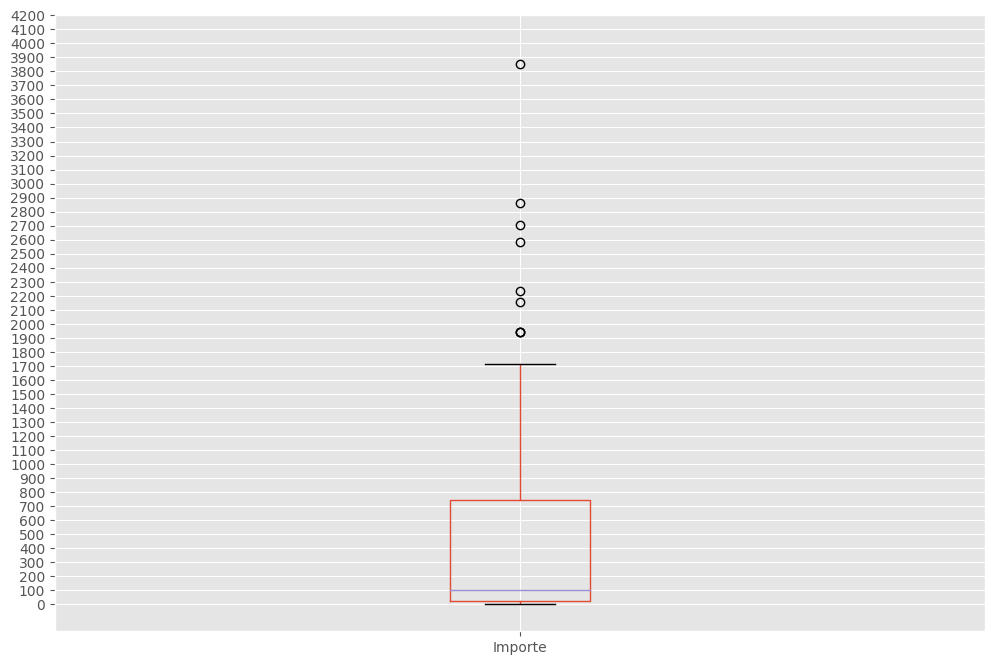

In [109]:
df_ingresos.boxplot(column = 'Importe')
valor_max = round(max(df_ingresos['Importe'])*1.1)
plt.yticks(np.arange(0, valor_max, 100))
plt.show()

Del boxplot, se puede extraer la siguiente información interesante:

-El 50% de los movimientos de ingresos están por debajo de 100 €
-El 75% de los movimientos de ingresos están por debajo de 950 € aprox.
-Hay un 25% de los movimientos de ingresos están por encima de los 950 € aprox.

Ojo, hay que tener en cuenta que estamos hablando de la cantidad de movimientos. Es decir, que el 50% de los movimientos de ingresos estén por debajo de los 100 € NO quiere decir que el 50% del monto total de los ingresos sean debido a transacciones por debajo de los 100 €. Un solo movimiento puede representar el 90% del monto total.

*Como ejemplo ilustrativo, puedo tener un monto total de 10 €, donde tengo 5 movimientos de 1 € y 1 movimiento de 5 €. En total son 6 movimientos, de los cuales 5 representan el 83% de los movimientos (los de 1 €), y solo un movimiento que representa el 17% de los movimientos. Sin embargo, el 83% de los movimientos representan, en este caso, el 50% del monto total y el de 17% el otro 50%. Como se ve, no existe una relación fija entre cantidad de movimientos y monto total.*


Antes de comenzar con el de gastos, todos sus valores de importe se pasarán a positivo debido a que el signo menos ya carece de sentido al haberse separado

In [110]:
df_gastos['Importe'] = df_gastos['Importe'].apply(lambda x: abs(x))

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\720297465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Importe'] = df_gastos['Importe'].apply(lambda x: abs(x))


En este punto, se puede graficar fácilmente una comparación entre los gastos y los ingresos.

In [111]:
ancho_barra = 0.35

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2777550156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['mes'] = df_ingresos['Fecha'].apply(lambda fecha: fecha.month)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2777550156.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['mes'] = df_gastos['Fecha'].apply(lambda fecha: fecha.month)


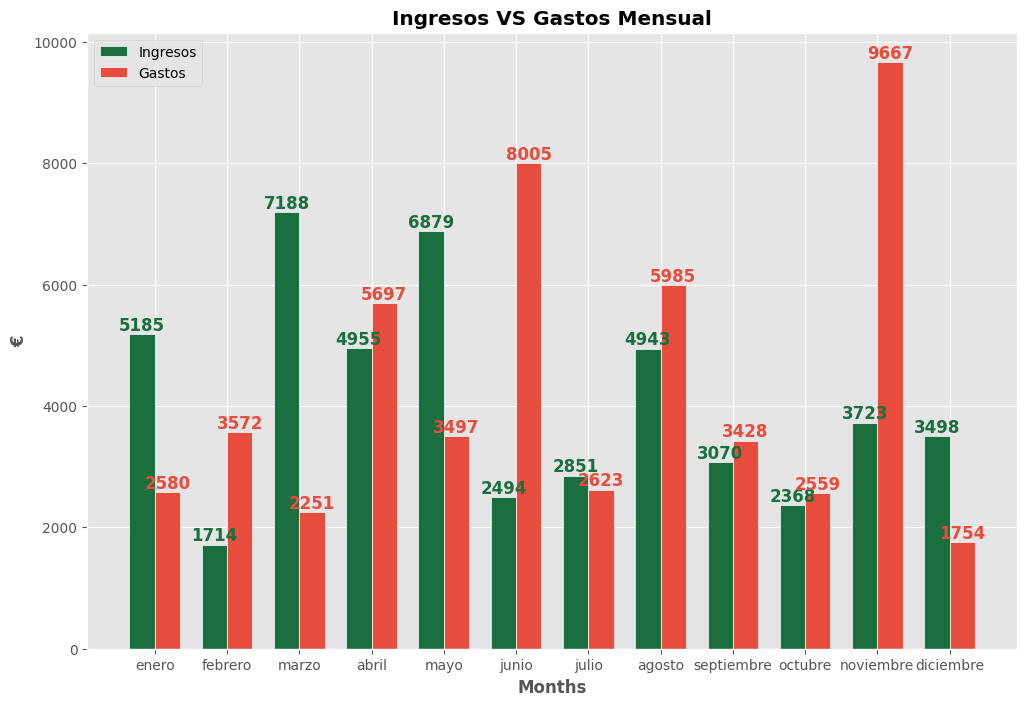

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2777550156.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos.drop('mes', inplace = True, axis = 1)
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2777550156.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos.drop('mes', inplace = True, axis = 1)


In [112]:
# Configurar el entorno local a español
import locale
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

df_ingresos['mes'] = df_ingresos['Fecha'].apply(lambda fecha: fecha.month)
df_gastos['mes'] = df_gastos['Fecha'].apply(lambda fecha: fecha.month)
filtro_gastos = df_gastos.groupby('mes')['Importe'].sum()
filtro_ingresos = df_ingresos.groupby('mes')['Importe'].sum()
etiquetas_gastos = list(filtro_gastos.index)
valores_gastos = list(filtro_gastos.values)
etiquetas_ingresos = list(filtro_ingresos.index)
valores_ingresos = list(filtro_ingresos.values)

meses_del_anio = [
    'enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
    'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'
]

etiquetas_gastos = [meses_del_anio[i] for i, _ in enumerate(etiquetas_gastos)]
etiquetas_ingresos = [meses_del_anio[i] for i, _ in enumerate(etiquetas_ingresos)]

posicion_ingresos = np.arange(len(etiquetas_ingresos))
posicion_gastos = posicion_ingresos + ancho_barra

#(valores, labels = etiquetas, colors = colores, startangle = 90, autopct=lambda p: '{:.0f} €'.format(p * sum(valores) / 100), wedgeprops = {'linewidth': 1, 'edgecolor': 'grey'})
plt.bar(posicion_ingresos, valores_ingresos, color = colores_I_G[0], width = ancho_barra, label = 'Ingresos', edgecolor = 'white')
plt.bar(posicion_gastos, valores_gastos, color = colores_I_G[1], width = ancho_barra, label = 'Gastos', edgecolor = 'white')

#Se cambian los nombre de las etiquetas del eje X
plt.xticks(posicion_ingresos + ancho_barra / 2, etiquetas_gastos, ha = 'center')

#Se añaden etiquetas a cada barra mostrando su valor (ingresos)
for i, valor in enumerate(valores_ingresos):
    plt.text(posicion_ingresos[i], valor + 0.1, str(int(valor)), color=colores_I_G[0], ha='center', va='bottom', fontdict={'weight':'bold','size':12})

#Se añaden etiquetas a cada barra mostrando su valor (gastos)
for i, valor in enumerate(valores_gastos):
    plt.text(posicion_gastos[i], valor + 0.1, str(int(valor)), color=colores_I_G[1], ha='center', va='bottom', fontdict={'weight':'bold','size':12})

plt.title('Ingresos VS Gastos Mensual')
plt.ylabel("€")
plt.xlabel('Months')
plt.legend()

plt.show()
df_ingresos.drop('mes', inplace = True, axis = 1)
df_gastos.drop('mes', inplace = True, axis = 1)

Text(0.5, 1.0, 'Ingresos VS Gastos Anual')

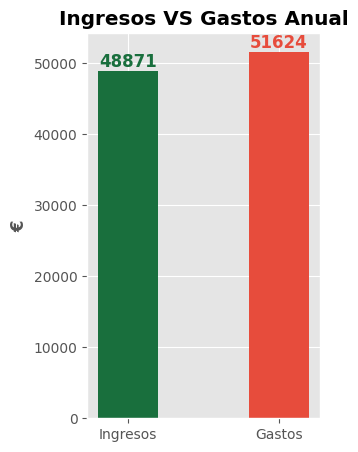

In [113]:
fig = plt.figure(figsize = (3, 5))
etiquetas = ['Ingresos', 'Gastos']
valores = [df_ingresos['Importe'].sum(), df_gastos['Importe'].sum()]
plt.bar(etiquetas, valores, width = 0.4, color = colores_I_G)
#Se añaden etiquetas a cada barra mostrando su valor (gastos)
for i, valor in enumerate(valores):
    plt.text(etiquetas[i], valor + 0.1, str(int(valor)), color=colores_I_G[i], ha='center', va='bottom', fontdict={'weight':'bold','size':12})

plt.ylabel("€")
plt.title('Ingresos VS Gastos Anual')

In [114]:
df_gastos[abs(stats.zscore(df_gastos['Importe'])) > 2.5]

Fecha                      Concepto  Importe
98  2023-02-18  trf. aluminios pvc sotelo sl  1435.50
209 2023-04-21   trf. david rodriguez garcia  1573.00
314 2023-06-13  trf. aluminios pvc sotelo sl  3349.50
345 2023-06-29                   trf. picazo  1250.00
438 2023-08-17                  trf. picazzo  1250.00
468 2023-08-30  tj-clinica dental cadizsmile  1658.00
662 2023-11-08        tj-univ int valenciana  4339.44
693 2023-11-21     tj-el corte ingles-depart  1614.15

Como se ve que hay valores repetidos, se entiende que son partes del mismo pago pero divididos en más de uno.

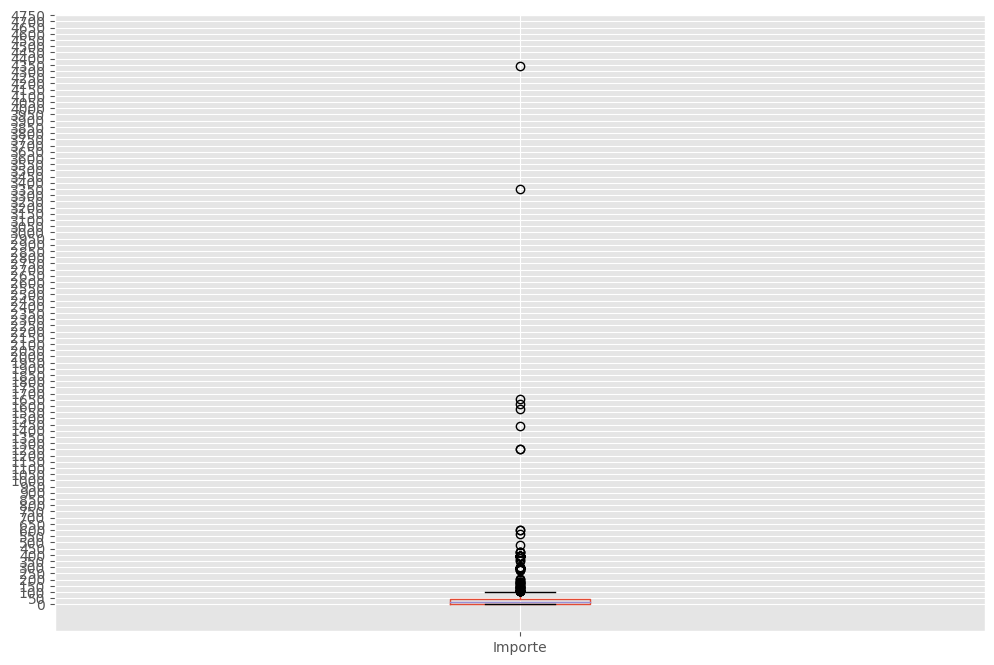

In [115]:
df_gastos.boxplot(column = 'Importe')
valor_max = round(max(df_gastos['Importe'])*1.1)
plt.yticks(np.arange(0, valor_max, 50))
plt.show()

El boxplot de los gastos es completamente diferente al de los ingresos:

-El 75% de los movimientos de gastos están por debajo de los 50 €.
-Practicamente todos los movimientos de gastos están por debajo de los 100 € a excepción de los Outliers.

En este caso, se puede observar que el boxplot muestra más outliers que los calculados en base al zscore. Esto es porque en los boxplot el cálculo de lo denominado outliers se realiza de una forma diferente: Son aquellos valores que superan en 1.5 veces el rango intercuartílico, que es la diferencia entre q3 y q1.

En un apartado posterior, se realizará un análisis estadístico más profundo al respecto.

# **3- Agrupación de variables**

## **3.1-Contabilización de datos**

Se contabiliza la cantidad de valores distintos que cada variable categórica tiene

In [116]:
def valores_unicos(df):
  for col in df:
    print(f'Val. Unicos en Col {df[col].name}: {len(df[col].unique())}')

In [117]:
valores_unicos(df_ingresos)

Val. Unicos en Col Fecha: 70
Val. Unicos en Col Concepto: 45
Val. Unicos en Col Importe: 65


In [118]:
valores_unicos(df_gastos)

Val. Unicos en Col Fecha: 297
Val. Unicos en Col Concepto: 326
Val. Unicos en Col Importe: 483


## **3.2- Agrupación de variables categóricas**

Se trata de observar los valores únicos que aparecen en cada columna del dataset y decidir, en base a estos, cómo crear una agrupación más genérica.
Para este ejercicio, no solo es necesario tener conocimiento de análisis de datos, sino también de la temática del dataset, pues las agrupaciones pueden ser subjetivas.

Se van a considerar dos formas generales de agrupar:



1.   Entre las propias variables de una misma columna, encontrando elementos que deberían de llamarse igual para contabilizar igual en duplicados.
2.   Creando categorías nuevas en base a repetición de parte del texto encontrado en una columna o a la repetición de no de un texto pero sí de un concepto.



### df_ingresos

Columna CONCEPTO en INGRESOS

In [119]:
df_ingresos['Concepto'].value_counts()

Concepto
pensión                                          10
trf. a.e.a.t. devoluciones tributarias            9
trf. ana cristina miras sanchez                   8
trf. adecco tt s a empresa de trabajo tempora     8
abono bizum - sin concepto                        4
                                                 ..
tj-brasil                                         0
tj-braseria el carbon                             0
tj-blue gorilla sl                                0
tj-blue gorilla fitness                           0
vorwerk international  c                          0
Name: count, Length: 371, dtype: int64

Se ha detectado que hay un concepto relacionado con construcciones ferroviarias que no está bajo el mismo concepto exactamente por una letra y debería de llamarse igual. Por lo tanto, se modifica dicho concepto.

In [120]:
df_ingresos['Concepto'][df_ingresos['Concepto'].str.contains('construcciones ferroviarias')] = 'trf. construcciones ferroviarias de madrid sl'
df_ingresos[df_ingresos['Concepto'].str.contains('construcciones ferroviarias')]


C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\141409089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Concepto'][df_ingresos['Concepto'].str.contains('construcciones ferroviarias')] = 'trf. construcciones ferroviarias de madrid sl'


Fecha                                       Concepto  Importe
0  2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65
5  2023-01-31  trf. construcciones ferroviarias de madrid sl  1942.32
9  2023-03-01  trf. construcciones ferroviarias de madrid sl  1942.32
15 2023-04-03  trf. construcciones ferroviarias de madrid sl   329.21
32 2023-05-20  trf. construcciones ferroviarias de madrid sl  3852.20

In [121]:
df_ingresos['Concepto'].value_counts()

Concepto
pensión                                          10
trf. a.e.a.t. devoluciones tributarias            9
trf. adecco tt s a empresa de trabajo tempora     8
trf. ana cristina miras sanchez                   8
trf. construcciones ferroviarias de madrid sl     5
                                                 ..
tj-brasil                                         0
tj-braseria el carbon                             0
tj-blue gorilla sl                                0
tj-blue gorilla fitness                           0
vorwerk international  c                          0
Name: count, Length: 371, dtype: int64

Se puede crear unas categorizaciones superiores según:

Tipo de pago (Tipo_Pago)
1.   Bizum
2.  Transferencia

Tipo de concepto (Tipo_Concepto)
1.   Devoluciones
2.  Salario
3. Otros (todos los bizum)




Tipo_Pago

Se crea la columna Tipo_Pago con nulls

In [122]:
df_ingresos['Tipo_Pago'] = None

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\3664973205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Tipo_Pago'] = None


Se determinan los bizum

In [123]:
df_ingresos.loc[df_ingresos['Concepto'].str.contains('bizum'),'Tipo_Pago'] = 'Bizum'

Por descarte, el resto son transferencias

In [124]:
df_ingresos['Tipo_Pago'][df_ingresos['Tipo_Pago'].isna()] = 'Transferencia'

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1003355928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Tipo_Pago'][df_ingresos['Tipo_Pago'].isna()] = 'Transferencia'


In [125]:
df_ingresos

Fecha                                       Concepto  Importe  \
0  2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65   
1  2023-01-03                trf. ana cristina miras sanchez  1200.00   
2  2023-01-06                               stradivarius.com    16.09   
3  2023-01-07                        abono bizum - lorealber    47.00   
4  2023-01-22              abono bizum - haberme invitao joe    39.00   
..        ...                                            ...      ...   
84 2023-11-29                     abono bizum - movil amazon   350.00   
85 2023-11-30                                        pensión   668.27   
86 2023-12-01  trf. adecco tt s a empresa de trabajo tempora   294.50   
87 2023-12-04                trf. ana cristina miras sanchez   500.00   
88 2023-12-08  trf. adecco tt s a empresa de trabajo tempora  2704.39   

        Tipo_Pago  
0   Transferencia  
1   Transferencia  
2   Transferencia  
3           Bizum  
4           Bizum  
..            ...  
84          Bizum  
85  Transferencia  
86  Transferencia  
87  Transferencia  
88  Transferencia  

[89 rows x 4 columns]

Tipo_Concepto

Se crea la columna Tipo_Concepto

In [126]:
df_ingresos['Tipo_Concepto'] = None

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\3393956210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Tipo_Concepto'] = None


Se añade todo lo que son salarios en una nueva columna

In [127]:
lista_salarios = ['devoluciones tributarias', 'ana cristina miras sanchez', 'adecco', 'construcciones ferroviarias', 'pensión']
df_ingresos.loc[df_ingresos['Concepto'].str.contains('|'.join(lista_salarios)),'Tipo_Concepto'] = 'Salarios'

Todo lo que sea bizum, se categoriza como "Otros"

In [128]:
df_ingresos.loc[df_ingresos['Tipo_Pago'] == 'Bizum', 'Tipo_Concepto'] = 'Otros'

El resto, son devoluciones

In [129]:
df_ingresos['Tipo_Concepto'][df_ingresos['Tipo_Concepto'].isna()] = 'Devoluciones'

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\647782894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Tipo_Concepto'][df_ingresos['Tipo_Concepto'].isna()] = 'Devoluciones'


Se revisa la tabla df_Ingresos para corroborar que todos los cambios se han efectuado correctamente

In [130]:
df_ingresos

Fecha                                       Concepto  Importe  \
0  2023-01-02  trf. construcciones ferroviarias de madrid sl  1940.65   
1  2023-01-03                trf. ana cristina miras sanchez  1200.00   
2  2023-01-06                               stradivarius.com    16.09   
3  2023-01-07                        abono bizum - lorealber    47.00   
4  2023-01-22              abono bizum - haberme invitao joe    39.00   
..        ...                                            ...      ...   
84 2023-11-29                     abono bizum - movil amazon   350.00   
85 2023-11-30                                        pensión   668.27   
86 2023-12-01  trf. adecco tt s a empresa de trabajo tempora   294.50   
87 2023-12-04                trf. ana cristina miras sanchez   500.00   
88 2023-12-08  trf. adecco tt s a empresa de trabajo tempora  2704.39   

        Tipo_Pago Tipo_Concepto  
0   Transferencia      Salarios  
1   Transferencia      Salarios  
2   Transferencia  Devoluciones  
3           Bizum         Otros  
4           Bizum         Otros  
..            ...           ...  
84          Bizum         Otros  
85  Transferencia      Salarios  
86  Transferencia      Salarios  
87  Transferencia      Salarios  
88  Transferencia      Salarios  

[89 rows x 5 columns]

In [131]:
df_ingresos['Tipo_Pago'].value_counts()

Tipo_Pago
Transferencia    49
Bizum            40
Name: count, dtype: int64

In [132]:
df_ingresos['Tipo_Concepto'].value_counts()

Tipo_Concepto
Salarios        40
Otros           40
Devoluciones     9
Name: count, dtype: int64

Para normalizar los datos, debemos procurar que no haya información duplicada en varias columnas. Para ello, se eliminan los textos de "trf. " y "abono bizum - " de los conceptos.

In [133]:
df_ingresos['Concepto'] = df_ingresos['Concepto'].str.replace('trf. ', '')
df_ingresos['Concepto'] = df_ingresos['Concepto'].str.replace('abono bizum - ', '')

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2927905045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Concepto'] = df_ingresos['Concepto'].str.replace('trf. ', '')
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2927905045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Concepto'] = df_ingresos['Concepto'].str.replace('abono bizum - ', '')


### df_gastos

Columna CONCEPTO en GASTOS

In [134]:
df_gastos['Concepto'].value_counts()

Concepto
tj-primark cadiz bahia sur        28
tj-mercadona camposoto            26
tj-carref bahia                   25
tj-amzn mktp es                   25
tj-restaurante bazan              17
                                  ..
abono bizum - movil paqui          0
abono bizum - lorena y alberto     0
abono bizum - lorealber            0
abono bizum - lore                 0
abono bizum - tata lola            0
Name: count, Length: 371, dtype: int64

In [135]:
df_gastos['Concepto'].unique()

['trf. rosa maria rodriguez fernandez', 'cargo bizum - regalo chaqueta', 'cargo bizum - comilona', 'tj-primor bahia', 'rcbo.adeslas cadiz', ..., 'cargo bizum - 022060-cargo de selae', 'cargo bizum - numeros sorteo', 'tj-pura tasca', 'tj-shah kebab', 'petroprix puerto de s.mar']
Length: 326
Categories (371, object): ['"trf. periodica 5660654871"', 'abono bizum - a', 'abono bizum - alojamiento toledo', 'abono bizum - amazon', ..., 'trf. picazo', 'trf. picazzo', 'trf. rosa maria rodriguez fernandez', 'vorwerk international  c']

Claramente, tal y como ocurre con df_ingresos, se puede dividir claramente en Tipo_Pago. Sin embargo, los Tipo_Concepto son más variados y hay que tratarlos de forma diferente.

Tipo de pago (Tipo_Pago)
1.   Tarjeta débito
2.  Transferencia
3. Tarjeta crédito
4. Bizum
5. Recibo
6. Cuota

Se crea la columna Tipo_Pago

In [136]:
df_gastos['Tipo_Pago'] = None

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\2158961371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Tipo_Pago'] = None


In [137]:
df_gastos.loc[df_gastos['Concepto'].str.contains('tj-'), 'Tipo_Pago'] = 'Tarjeta Débito'
df_gastos.loc[df_gastos['Concepto'].str.contains('cargo bizum - '), 'Tipo_Pago'] = 'Bizum'
df_gastos.loc[df_gastos['Concepto'].str.contains('trf. '), 'Tipo_Pago'] = 'Transferencia'
df_gastos.loc[df_gastos['Concepto'].str.contains('rcbo.'), 'Tipo_Pago'] = 'Recibo'
df_gastos.loc[df_gastos['Concepto'].str.contains('cuota '), 'Tipo_Pago'] = 'Cuota'
df_gastos['Tipo_Pago'][df_gastos['Concepto'] == 'tarjeta visa classic'] = 'Tarjeta Crédito'

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\3813179157.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Tipo_Pago'][df_gastos['Concepto'] == 'tarjeta visa classic'] = 'Tarjeta Crédito'


Se comprueba si hay algún valor no categorizado

In [138]:
df_gastos[df_gastos['Tipo_Pago'].isnull()]

Fecha                                   Concepto  Importe Tipo_Pago
16  2023-01-09                      leroy merlin pto.real    40.56      None
20  2023-01-10                         mercadona fadricas    28.28      None
23  2023-01-12                        mercadona camposoto    15.98      None
26  2023-01-14                        mercadona camposoto     4.70      None
28  2023-01-15                               sancho panza    11.50      None
36  2023-01-17                  lidl san fernando-bah\a s    50.93      None
64  2023-02-03                         mercadona fadricas    17.12      None
71  2023-02-05                  estacion servicios hm oil    10.00      None
72  2023-02-05                                  la cabaãa    67.30      None
73  2023-02-05                  estacion servicios hm oil    70.81      None
132 2023-03-09                     petroprix san fernando    73.67      None
133 2023-03-10                              dia camposoto    13.24      None
134 2023-03-11                              dia camposoto     4.98      None
137 2023-03-14                         mercadona fadricas   103.07      None
138 2023-03-14                  lidl san fernando-bah\a s     3.87      None
149 2023-03-18                        mercadona camposoto    28.50      None
172 2023-04-03                        mercadona camposoto    71.72      None
173 2023-04-03                              dia camposoto     1.72      None
181 2023-04-08                        mercadona camposoto    77.32      None
228 2023-05-04                        mercadona camposoto    83.32      None
230 2023-05-04                     petroprix san fernando    66.01      None
285 2023-06-01                     ballenoil san fernando    60.72      None
290 2023-06-03                        mercadona camposoto     7.40      None
300 2023-06-06                        mercadona camposoto    79.21      None
303 2023-06-08                   vorwerk international  c    48.00      None
347 2023-06-30  adeudo 100 domiciliado aeat 1003799695376   276.80      None
360 2023-07-09                     ballenoil san fernando    65.00      None
361 2023-07-10                        mercadona camposoto   206.56      None
403 2023-08-01                         mercadona fadricas   167.18      None
404 2023-08-01                     petroprix san fernando    60.00      None
477 2023-09-01                     ballenoil san fernando    70.10      None
505 2023-09-11                         mercadona fadricas   113.47      None
599 2023-10-16                         mercadona fadricas    99.86      None
603 2023-10-17                     petroprix san fernando    78.67      None
654 2023-11-06                  ballenoil san fernando ii    60.00      None
655 2023-11-06  adeudo 102 domiciliado aeat 1003799695376   184.53      None
657 2023-11-07                        mercadona camposoto   103.77      None
756 2023-12-11                           mercadona c/real    15.73      None
757 2023-12-12                               expsanrafael     1.65      None
758 2023-12-12                           mercadona c/real    14.07      None
768 2023-12-15                  petroprix puerto de s.mar    72.27      None

Se corrobora que solo estas dos entradas llevan la palabra clave "adeudo", que es el recibo de pago de hacienda

In [139]:
df_gastos[df_gastos['Concepto'].str.contains('adeudo')]

Fecha                                   Concepto  Importe Tipo_Pago
347 2023-06-30  adeudo 100 domiciliado aeat 1003799695376   276.80      None
655 2023-11-06  adeudo 102 domiciliado aeat 1003799695376   184.53      None

In [140]:
df_gastos.loc[df_gastos['Concepto'].str.contains('adeudo '), 'Tipo_Pago'] = 'Adeudo'

In [141]:
df_gastos[df_gastos['Tipo_Pago'].isnull()].size

156

Una vez está todo categorizado en Tipo_Pago, se procede a la normalización del concepto antes de estudiar la categorización como Tipo_Concepto

In [142]:
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('tj-', '')
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('cargo bizum - ', '')
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('trf. ', '')
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('rcbo.', '')
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('cuota ', '')
df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('adeudo ', '')
#La tarjeta visa classic se deja como está

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\4178070548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('tj-', '')
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\4178070548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Concepto'] = df_gastos['Concepto'].str.replace('cargo bizum - ', '')
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\4178070548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [143]:
df_gastos['Concepto'].unique()

array(['rosa maria rodriguez fernandez', 'regalo chaqueta', 'comilona',
       'primor bahia', 'adeslas cadiz', 'primark cadiz bahia sur',
       ' préstamo5589240554', 'casa maxi china',
       'lidl san fernando-bah\\a s', 'multitranquilidad',
       'pepe mobile, s.l.u.', 'mercadona camposoto',
       '"periodica 5660654871"', 'hormaza sl', 'mercadona fadricas',
       'leroy merlin pto.real', 'amzn mktp es', 'aliexpress',
       'alberto perez fisioterapi', 'tabitas', 'e144', 'sancho panza',
       'farmacia guerrero', 'pccomponentes', 'decathlon pto sta maria',
       ' préstamo5618504251', 'kiabi puerto real', 'amazon.es',
       'gimnasio vigor', 'degustedulce', 'mercadona-av. de la ilust',
       'carref bahia', 'shein.com', 'mexicano', 'endesa energia sau',
       'gran via', 'dia camposoto', 'tinmar sport sl',
       'hidralia gestion integral de aguas de an', 'nomada',
       'rest.chino wang sheng', 'centrika discoteque',
       'estacion servicios hm oil', 'la cabaãa', 'ro

Debido a la alta cantidad de valores que existen como únicos, a simple vista es complicado identificar dos valores que sean muy parecidos hasta tal punto que sean uno solo (a veces esto puede ocurrir por erratas tipográficas). Por ello, se usará una librería específica para la encontrar la similitud de un texto con otro.

Pero antes, sí que hay algunos conceptos que se pueden agrupar como uno solo. Por ejemplo, mercadona, amazon o primark.

In [144]:
df_gastos.loc[df_gastos['Concepto'].str.contains('mercadona', case = False), 'Concepto'] = 'Mercadona'

In [145]:
df_gastos.loc[df_gastos['Concepto'].str.contains('amazon|amzn', case = False), 'Concepto'] = 'Amazon'

In [146]:
df_gastos.loc[df_gastos['Concepto'].str.contains('primark', case = False), 'Concepto'] = 'Primark'

In [147]:
!pip install thefuzz


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [148]:
from thefuzz import fuzz

In [149]:
def lista_valores_similares(df, valor1, lim):
  lista_resultados = []
  for indice, valor2 in enumerate(df['Concepto']):
    valor_comparacion = fuzz.ratio(valor1, valor2)
    if lim <= valor_comparacion < 100:
      lista_resultados.append(indice)
  return lista_resultados if len(lista_resultados) > 0 else None



Por cada fila en el df, se compara el valor del concepto con el resto de valores, incluyendo en una lista asociada a dicha fila los índices de las filas cuyos valores son similares.

Para ello, se va a crear una función que va a ser llamada cuantas veces sea necesario para ir identificando fácilmente los conceptos que deben ser similares con la ayuda de fuzz.

In [150]:
def ayuda_similares(df, lim):
    #Se crea la columna "comparaciones y se setea todo a nulo"
    df_gastos['Comparaciones'] = None
    #Se asigna a 'Comparaciones' una lista de los índices que son muy similares, tanto como se envie en el limite
    df_gastos['Comparaciones'] = df_gastos['Concepto'].apply(lambda valor: lista_valores_similares(df_gastos, valor, lim))

In [151]:
ayuda_similares(df_gastos, 95)
df_gastos[~df_gastos['Comparaciones'].isnull()]

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = None
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = df_gastos['Concepto'].apply(lambda valor: lista_valores_similares(df_gastos, valor, lim))


Fecha                            Concepto  Importe       Tipo_Pago  \
347 2023-06-30  100 domiciliado aeat 1003799695376   276.80          Adeudo   
482 2023-09-04                          tele pollo     1.20  Tarjeta Débito   
574 2023-10-06                           telepollo     1.20  Tarjeta Débito   
655 2023-11-06  102 domiciliado aeat 1003799695376   184.53          Adeudo   

    Comparaciones  
347         [655]  
482         [574]  
574         [482]  
655         [347]

Se va cambiando lo necesario

In [152]:
df_gastos.loc[df_gastos['Concepto'].str.contains('domiciliado aeat'),'Concepto'] = 'domiciliado aeat'
df_gastos.loc[df_gastos['Concepto'].isin(['tele pollo', 'telepollo']),'Concepto'] = 'telepollo'

In [153]:
ayuda_similares(df_gastos, 90)
df_gastos[~df_gastos['Comparaciones'].isnull()]

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = None
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = df_gastos['Concepto'].apply(lambda valor: lista_valores_similares(df_gastos, valor, lim))


Fecha                         Concepto  Importe       Tipo_Pago  \
49  2023-01-27                         mexicano    21.00           Bizum   
125 2023-03-04                       shah kebap    19.00  Tarjeta Débito   
162 2023-03-26        la mar de fresquita del e    10.70  Tarjeta Débito   
285 2023-06-01           ballenoil san fernando    60.72            None   
321 2023-06-16           ballenoil san fernando    30.00  Tarjeta Débito   
345 2023-06-29                           picazo  1250.00   Transferencia   
359 2023-07-08        la mar de fresquita de lo    17.30  Tarjeta Débito   
360 2023-07-09           ballenoil san fernando    65.00            None   
415 2023-08-04        la mar de fresquita de lo    25.20  Tarjeta Débito   
437 2023-08-17        la mar de fresquita de lo    22.40  Tarjeta Débito   
438 2023-08-17                          picazzo  1250.00   Transferencia   
477 2023-09-01           ballenoil san fernando    70.10            None   
552 2023-09-29        jd spain sports fashion 2    33.00  Tarjeta Débito   
565 2023-10-04  tarjeta debito 433467******2486    25.00           Cuota   
566 2023-10-04  tarjeta debito 433467******5262    25.00           Cuota   
577 2023-10-07                        mexicanoo    32.50           Bizum   
583 2023-10-09        jd spain sports fashion 2    30.00  Tarjeta Débito   
654 2023-11-06        ballenoil san fernando ii    60.00            None   
707 2023-11-25           jd spain sport fashion    75.00  Tarjeta Débito   
719 2023-11-30        ballenoil san fernando ii    50.00  Tarjeta Débito   
766 2023-12-14                       shah kebab    10.00  Tarjeta Débito   

            Comparaciones  
49                  [577]  
125                 [766]  
162       [359, 415, 437]  
285            [654, 719]  
321            [654, 719]  
345                 [438]  
359                 [162]  
360            [654, 719]  
415                 [162]  
437                 [162]  
438                 [345]  
477            [654, 719]  
552                 [707]  
565                 [566]  
566                 [565]  
577                  [49]  
583                 [707]  
654  [285, 321, 360, 477]  
707            [552, 583]  
719  [285, 321, 360, 477]  
766                 [125]

In [154]:
df_gastos.loc[df_gastos['Concepto'].str.contains('mar de fresquita'),'Concepto'] = 'la mar de fresquita'
df_gastos.loc[df_gastos['Concepto'].str.contains('picaz'),'Concepto'] = 'cristaleria picazzo'
df_gastos.loc[df_gastos['Concepto'].str.contains('jd spain sport'),'Concepto'] = 'jd spain sport'
df_gastos.loc[df_gastos['Concepto'].str.contains('mexicano'),'Concepto'] = 'mexicano'

In [155]:
ayuda_similares(df_gastos, 80)
df_gastos[~df_gastos['Comparaciones'].isnull()]

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = None
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = df_gastos['Concepto'].apply(lambda valor: lista_valores_similares(df_gastos, valor, lim))


Fecha                         Concepto  Importe       Tipo_Pago  \
125 2023-03-04                       shah kebap    19.00  Tarjeta Débito   
153 2023-03-20            sprinter san fernando    14.99  Tarjeta Débito   
187 2023-04-11                     cc bahia sur    45.00  Tarjeta Débito   
193 2023-04-15                     fh bahia sur    72.95  Tarjeta Débito   
229 2023-05-04              el rincon de carmen     5.50  Tarjeta Débito   
244 2023-05-15              oteros san fernando    39.99  Tarjeta Débito   
249 2023-05-15            sprinter san fernando    32.98  Tarjeta Débito   
269 2023-05-27                       barbacoita    35.00           Bizum   
285 2023-06-01           ballenoil san fernando    60.72            None   
321 2023-06-16           ballenoil san fernando    30.00  Tarjeta Débito   
336 2023-06-24          el corte ingles parking     0.85  Tarjeta Débito   
360 2023-07-09           ballenoil san fernando    65.00            None   
364 2023-07-12                  blue gorilla sl    10.00  Tarjeta Débito   
391 2023-07-27                  blue gorilla sl    89.00  Tarjeta Débito   
405 2023-08-01               el rincon de juana     1.00  Tarjeta Débito   
406 2023-08-01            sprinter san fernando    22.98  Tarjeta Débito   
421 2023-08-08                          pizzaaa    11.40           Bizum   
472 2023-08-31                  blue gorilla sl    45.00  Tarjeta Débito   
477 2023-09-01           ballenoil san fernando    70.10            None   
517 2023-09-16                  ikea jerez food     0.99  Tarjeta Débito   
518 2023-09-16                   ikea jerez hfb    67.96  Tarjeta Débito   
528 2023-09-20                         barbacoa    40.00           Bizum   
532 2023-09-23              supeco san fernando     4.66  Tarjeta Débito   
555 2023-10-01             blue gorilla fitness    45.00  Tarjeta Débito   
565 2023-10-04  tarjeta debito 433467******2486    25.00           Cuota   
566 2023-10-04  tarjeta debito 433467******5262    25.00           Cuota   
579 2023-10-07                            pizza     5.80           Bizum   
601 2023-10-17                optica san rafael    29.00  Tarjeta Débito   
621 2023-10-28                  el corte ingles    21.65  Tarjeta Débito   
623 2023-10-28          el corte ingles parking     0.20  Tarjeta Débito   
639 2023-11-02             blue gorilla fitness    45.00  Tarjeta Débito   
643 2023-11-03              supeco san fernando    13.44  Tarjeta Débito   
654 2023-11-06        ballenoil san fernando ii    60.00            None   
691 2023-11-21          el corte ingles parking     2.95  Tarjeta Débito   
692 2023-11-21                  el corte ingles     1.50  Tarjeta Débito   
693 2023-11-21           el corte ingles-depart  1614.15  Tarjeta Débito   
710 2023-11-27          nueva optica san rafael    60.00  Tarjeta Débito   
713 2023-11-29              supeco san fernando    19.96  Tarjeta Débito   
719 2023-11-30        ballenoil san fernando ii    50.00  Tarjeta Débito   
722 2023-12-01                            pizza    26.00           Bizum   
726 2023-12-02                  el corte ingles     8.95  Tarjeta Débito   
766 2023-12-14                       shah kebab    10.00  Tarjeta Débito   

                      Comparaciones  
125                           [766]  
153            [244, 532, 643, 713]  
187                           [193]  
193                           [187]  
229                           [405]  
244                 [153, 249, 406]  
249            [244, 532, 643, 713]  
269                           [528]  
285                      [654, 719]  
321                      [654, 719]  
336                           [693]  
360                      [654, 719]  
364                      [555, 639]  
391                      [555, 639]  
405                           [229]  
406            [244, 532, 643, 713]  
421                      [579, 722]  
472                      [555, 639]  
477               

In [156]:
df_gastos.loc[df_gastos['Concepto'].str.contains('blue gorilla'),'Concepto'] = 'blue gorilla gym'

In [157]:
ayuda_similares(df_gastos, 75)
df_gastos[~df_gastos['Comparaciones'].isnull()]

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = None
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\341322945.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Comparaciones'] = df_gastos['Concepto'].apply(lambda valor: lista_valores_similares(df_gastos, valor, lim))


Fecha                   Concepto  Importe       Tipo_Pago  \
33  2023-01-17          kiabi puerto real    17.00  Tarjeta Débito   
54  2023-01-30              dia camposoto     3.14  Tarjeta Débito   
82  2023-02-13              dia camposoto     0.99  Tarjeta Débito   
89  2023-02-15              dia camposoto     5.19  Tarjeta Débito   
104 2023-02-22              dia camposoto     8.50  Tarjeta Débito   
..         ...                        ...      ...             ...   
719 2023-11-30  ballenoil san fernando ii    50.00  Tarjeta Débito   
722 2023-12-01                      pizza    26.00           Bizum   
726 2023-12-02            el corte ingles     8.95  Tarjeta Débito   
751 2023-12-07              dia camposoto     5.43  Tarjeta Débito   
766 2023-12-14                 shah kebab    10.00  Tarjeta Débito   

                           Comparaciones  
33   [121, 146, 151, 258, 439, 523, 689]  
54                                 [562]  
82                                 [562]  
89                                 [562]  
104                                [562]  
..                                   ...  
719                 [285, 321, 360, 477]  
722                                [421]  
726                 [336, 623, 691, 693]  
751                                [562]  
766                                [125]  

[78 rows x 5 columns]

In [158]:
df_gastos.drop('Comparaciones', inplace = True, axis = 1)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1485041783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos.drop('Comparaciones', inplace = True, axis = 1)


## **3.3- Agrupación de Variables Continuas**

Una manera muy sencilla de convertir variables continuas en otras categóricas es mediante el uso de quintiles. Usando este concepto, se va a categorizar el importe de dos formas diferentes:


1.   Rango_Importe
2.   Nivel_Importe

El rango se puede diferenciar con el uso de la discriminación de outliers de forma recurrente en varios bucles.

Para el nivel, simplemente se dividirán los datos en deciles, quintiles, etc... dependiendo de la cantidad de datos que queden en los diferentes Rangos.



Para llevar a cabo esta idea, se va a escribir una función que reciba al df y calcule los parámetros de un boxplot. La idea es llamar de forma recurrente a esta función las veces definidas. De esta manera, se irá reduciendo la presencia de outliers a medida que se van dejando fuera. Tras varios ciclos, apenas quedarán outliers o se habrán eliminado. Así se podrá determinar lo habitual que es un gasto.

Primero, se define una función para calcular los parámetros del boxplot

In [159]:
def calcular_outliers(df):
  cuartiles = np.percentile(df['Importe'], [25, 50, 75])
  iqr = np.subtract(*np.percentile(df['Importe'], [75, 25]))

  '''En Python, el asterisco (*) se utiliza para desempaquetar los elementos de
  una secuencia (como una lista o tupla) y pasarlos como argumentos individuales
  a una función. En el contexto de tu pregunta, el asterisco está siendo utilizado
  para desempaquetar los resultados de la función percentile y pasarlos como
  argumentos a la función np.subtract.'''

  lim_sup_outliers = cuartiles[2] + 1.5 * iqr
  lim_inf_outliers = cuartiles[0] - 1.5 * iqr

  '''En los boxplot, los outliers se determinan como todo valor que está más
  allá de los bigotes. Los bigotes son las líneas que se determinan como el
  tercer cuartil + 1.5 veces el rango intercuartílico (Tercer cuartil menos el
  primer cuartil) y el primer cuartil -1.5 veces el rango intercuartílico.'''
  #Se cuentan cuántos valores son outliers de los que quedan

  cantidad_outliers_restantes = len(df['Importe'][(df['Importe'] >
  lim_sup_outliers) | (df['Importe'] < lim_inf_outliers)])

  return cantidad_outliers_restantes, lim_sup_outliers, lim_inf_outliers

Luego, se escribe otra función que define la frecuencia del rango de los importes. Esta función va a devolver una lista con los índices de la tabla que, tras varios ciclos, ya carece de outliers.

In [160]:
def definir_rango_importes(df):
  check = True
  while check == True:
    cantidad_outliers_restantes, lim_sup_outliers, lim_inf_outliers = calcular_outliers(df)
    df = df[(df['Importe'] <= lim_sup_outliers) & (df['Importe'] >= lim_inf_outliers)]
    check = False if cantidad_outliers_restantes == 0 else None
  return df.index.to_list()


Por último, se llaman a las funciones pertinentes hasta que todo el dataset en la columna Rango_Importe esté rellena. La idea es que los datos más comunes estén escritos como 1, y los menos comunes en adelante (cuanto mayor sea el número menos común).

In [161]:
df_gastos['Rango_Importe'] = None #Creo una nueva columna
cant_datos_no_escritos = 1
i = 1
while cant_datos_no_escritos > 0:
  indices_datos_normales = definir_rango_importes(df_gastos[df_gastos['Rango_Importe'].isna()])
  df_gastos['Rango_Importe'].iloc[indices_datos_normales] = i
  i += 1
  cant_datos_no_escritos = len(df_gastos['Rango_Importe'][df_gastos['Rango_Importe'].isna()])

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1304465797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Rango_Importe'] = None #Creo una nueva columna
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1304465797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Rango_Importe'].iloc[indices_datos_normales] = i
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1304465797.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

Se comprueba la cantidad de tipos que hay

In [162]:
df_gastos['Rango_Importe'].value_counts()

Rango_Importe
1    693
2     69
3      6
4      2
Name: count, dtype: int64

Ahora se puede observar los rangos concretos en nuestra tabla con los máximos y minimos por grupos

In [163]:
print(f"Rango 1- Valor min: {min(df_gastos['Importe'][df_gastos['Rango_Importe'] == 1])} Valor max: {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == 1])}")
print(f"Rango 2- Valor min: {min(df_gastos['Importe'][df_gastos['Rango_Importe'] == 2])} Valor max: {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == 2])}")
print(f"Rango 3- Valor min: {min(df_gastos['Importe'][df_gastos['Rango_Importe'] == 3])} Valor max: {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == 3])}")
print(f"Rango 4- Valor min: {min(df_gastos['Importe'][df_gastos['Rango_Importe'] == 4])} Valor max: {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == 4])}")

Rango 1- Valor min: 0.2 Valor max: 103.77
Rango 2- Valor min: 104.49 Valor max: 600.0
Rango 3- Valor min: 1250.0 Valor max: 1658.0
Rango 4- Valor min: 3349.5 Valor max: 4339.44


Estos grupos van a ser objeto de estudio por separado. De esta manera, ningún grupo afecta al otro teniendo sentido calcular otros parámetros

In [164]:
#Se identifican los distintos rangos y se guardan en una lista
rangos_importes = list(df_gastos['Rango_Importe'].unique()) 

In [165]:
for i in rangos_importes:
    df_gastos['Rango_Importe'][df_gastos['Rango_Importe'] == i] = f"[{min(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}, {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}]"

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1472983951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Rango_Importe'][df_gastos['Rango_Importe'] == i] = f"[{min(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}, {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}]"
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1472983951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Rango_Importe'][df_gastos['Rango_Importe'] == i] = f"[{min(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}, {max(df_gastos['Importe'][df_gastos['Rango_Importe'] == i])}]"
C:\Users\Crist

Se hace exactamente lo mismo para ingresos

In [166]:
df_ingresos['Rango_Importe'] = None #Creo una nueva columna
cant_datos_no_escritos = 1
i = 1
while cant_datos_no_escritos > 0:
  indices_datos_normales = definir_rango_importes(df_ingresos[df_ingresos['Rango_Importe'].isna()])
  df_ingresos['Rango_Importe'].iloc[indices_datos_normales] = i
  i += 1
  cant_datos_no_escritos = len(df_ingresos['Rango_Importe'][df_ingresos['Rango_Importe'].isna()])

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1509009413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Rango_Importe'] = None #Creo una nueva columna
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1509009413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Rango_Importe'].iloc[indices_datos_normales] = i
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1509009413.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [167]:
df_ingresos['Rango_Importe'].value_counts()

Rango_Importe
1    80
2     8
3     1
Name: count, dtype: int64

In [168]:
#Se identifican los distintos rangos y se guardan en una lista
rangos_importes = list(df_ingresos['Rango_Importe'].unique()) 

In [169]:
for i in rangos_importes:
    df_ingresos['Rango_Importe'][df_ingresos['Rango_Importe'] == i] = f"[{min(df_ingresos['Importe'][df_ingresos['Rango_Importe'] == i])}, {max(df_ingresos['Importe'][df_ingresos['Rango_Importe'] == i])}]"

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\828973155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Rango_Importe'][df_ingresos['Rango_Importe'] == i] = f"[{min(df_ingresos['Importe'][df_ingresos['Rango_Importe'] == i])}, {max(df_ingresos['Importe'][df_ingresos['Rango_Importe'] == i])}]"
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\828973155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ingresos['Rango_Importe'][df_ingresos['Rango_Importe'] == i] = f"[{min(df_ingresos['Importe'][df_ingresos['Rango_Importe'] == i])}, {max(df_ingresos['Importe'][df_ingresos['Rango_Importe'] ==

In [170]:
df_ingresos.Rango_Importe.value_counts()

Rango_Importe
[1.21, 1710.64]       80
[1940.65, 2864.03]     8
[3852.2, 3852.2]       1
Name: count, dtype: int64

## Graficado

Para poder graficar este resultado correctamente, se va a crear una tabla para incluir las categorías textuales que se han obtenido. Luego, otra tabla con sus valores del group by y, a continuación, el rango al que hace referencia.

Se va a crear una serie de listas con gamas de diferentes colores

In [171]:
colormap_azules = plt.get_cmap('Blues')
colormap_rojos = plt.get_cmap('Reds')
colormap_verdes = plt.get_cmap('Greens')
colormap_lilas = plt.get_cmap('Purples')

In [172]:
def graficar_pie(valores, etiquetas, titulo, unidad, colormap):
    #Se definen los colores
    num_colores = len(valores)
    color_min = 0.2
    color_max = 0.7
    colores = colormap(np.linspace(color_max, color_min, num_colores))
    #Se pinta la gráfica
    autopcts, texts, autotexts = plt.pie(valores, labels = etiquetas, autopct = '%1.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': 'white', 'width': 0.3}, colors = colores, startangle = 45)
    #Se "eliminan" las etiquetas que cumplen con cierto criterio
    for i in range(len(autotexts)):  #esto me servirá para iterar las veces necesarias para los tres parámetros
        valor_porc = float(autotexts[i].get_text().strip('%'))
        if valor_porc < 2:
            autotexts[i].set_color('white')
            texts[i].set_color('white')
    plt.title(titulo, loc = 'center')
    #Se añade un texto con el valor de la suma total
    suma_valores = "{:,}".format(int(sum(valores)))
    plt.text(0.5,0.1, f'Porcentajes sobre {suma_valores} {unidad}', transform=plt.gcf().transFigure, ha='center', va='center', fontdict = {'weight': 'bold', 'size': 14})
    plt.show()

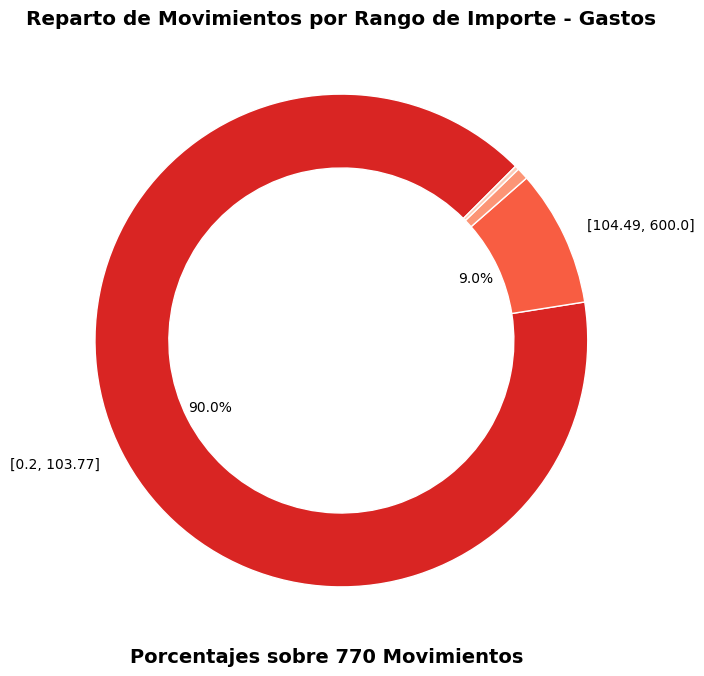

In [173]:
filtro = df_gastos.groupby('Rango_Importe')['Importe'].count().sort_values(ascending = False)
etiquetas = list(filtro.index)
valores = list(filtro.values)
unidad = "Movimientos"
title = f'Reparto de {unidad} por Rango de Importe - Gastos'
graficar_pie(valores, etiquetas, title, unidad, colormap_rojos)

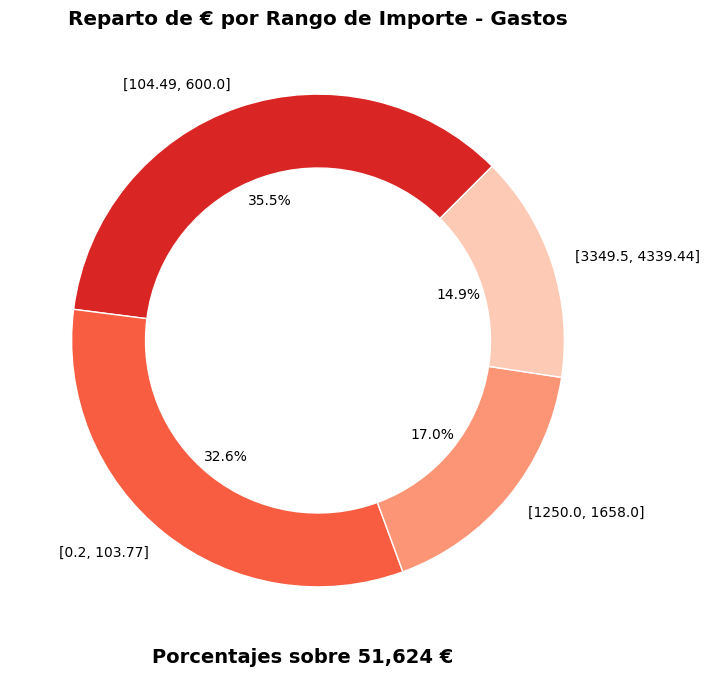

In [174]:
filtro = df_gastos.groupby('Rango_Importe')['Importe'].sum().sort_values(ascending = False)
etiquetas = list(filtro.index)
valores = list(filtro.values)
unidad = '€'
title = f'Reparto de {unidad} por Rango de Importe - Gastos'
graficar_pie(valores, etiquetas, title, unidad, colormap_rojos)

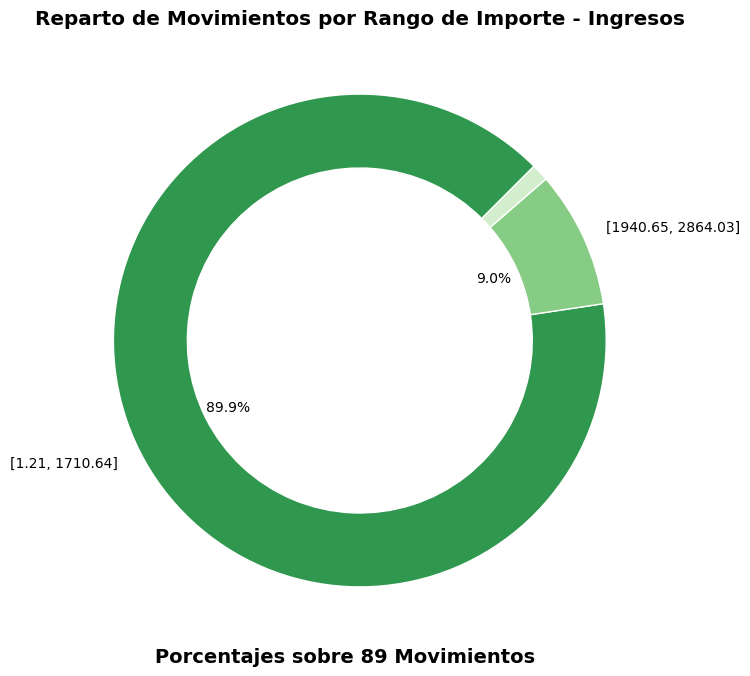

In [175]:
filtro = df_ingresos.groupby('Rango_Importe')['Importe'].count().sort_values(ascending = False)
etiquetas = list(filtro.index)
valores = list(filtro.values)
unidad = "Movimientos"
title = f'Reparto de {unidad} por Rango de Importe - Ingresos'
graficar_pie(valores, etiquetas, title, unidad, colormap_verdes)

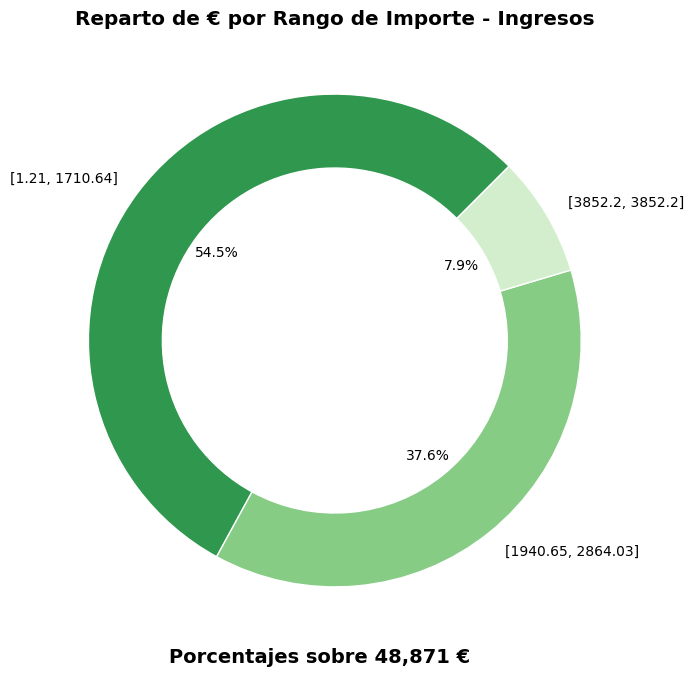

In [176]:
filtro = df_ingresos.groupby('Rango_Importe')['Importe'].sum().sort_values(ascending = False)
etiquetas = list(filtro.index)
valores = list(filtro.values)
unidad = '€'
title = f'Reparto de {unidad} por Rango de Importe - Ingresos'
graficar_pie(valores, etiquetas, title, unidad, colormap_verdes)

Una vez realizada la agrupación de variables continuas, como lo es el importe, en función de su frecuencia, es interesante crear otra categoría (también del importe) en función de lo alto o bajo que sea el gasto. Sin embargo, debido a la enorme variabilidad que hay de gastos, es menester crear subtablas y elegir un grupo para estudiarlo más a fondo. Lo ideal es crear subtablas para el grupo-rango con mayor importe total gastado.

Se va a crear una lista donde almacenar tantos df como grupos haya. Esto se escribirá en forma de función para poder realizarlo con los ingresos más adelante.

In [177]:
def obtener_df_rangos(df):
    #Se identifican los distintos rangos y se guardan en una lista
    rangos_importes = list(df['Rango_Importe'].unique())
    list_df_rangos = [df[df['Rango_Importe'].apply(lambda x: x == rango)] for rango in rangos_importes]
    return list_df_rangos

Se crea la lista de dataframes

In [178]:
list_df_rangos_gastos = obtener_df_rangos(df_gastos)
list_df_rangos_ingresos = obtener_df_rangos(df_ingresos)

Se resetean los index

In [179]:
for _df in list_df_rangos_gastos:
    _df.reset_index(inplace = True, drop = True)

for _df in list_df_rangos_ingresos:
    _df.reset_index(inplace = True, drop = True)

Ahora se dividen los datos. Una partición adecuada para este df sería en 10 partes. Sin embargo, estas divisiones no se realizarán por igual cantidad de valor, sino por igual cantidad de valores, es decir, usando deciles

In [180]:
import math

In [181]:
def subdividir_grupos(df):
    if df.index.size > 20:
        q = 10
    elif df.index.size > 10:
        q = 5
    elif df.index.size > 1:
        q = 2
    else:
        q = 1
    
    #Creo una nueva columna llamada Nivel_Importe
    df['Nivel_Importe'] = None
    #Utilizo qcut sin precisión
    df['Nivel_Importe'], bins = pd.qcut(df['Importe'], q = q, retbins=True, duplicates = 'drop')
    #Redondeo los rangos con la precisión deseada
    bins = np.round(bins, 2)
    #Aplico ahora cut con los bins ya modificados
    #df['Nivel_Importe'] = pd.cut(df['Importe'], bins, duplicates = 'drop')
    return df




In [182]:
for _df in list_df_rangos_gastos:
    _df = subdividir_grupos(_df)

for _df in list_df_rangos_ingresos:
    _df = subdividir_grupos(_df)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\438691932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nivel_Importe'] = None
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\438691932.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nivel_Importe'], bins = pd.qcut(df['Importe'], q = q, retbins=True, duplicates = 'drop')
C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\438691932.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\3801709730.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtro = _df.groupby('Nivel_Importe')['Importe'].sum().sort_values(ascending = False)


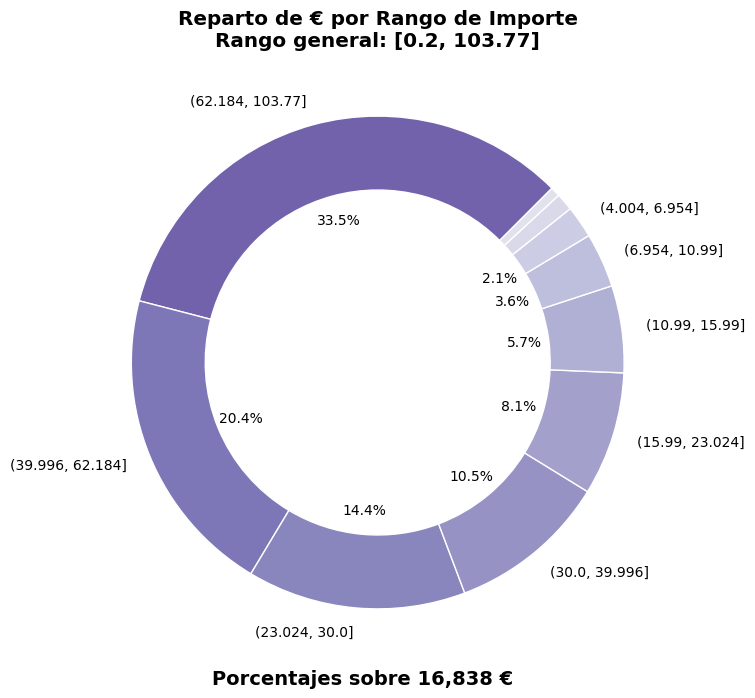

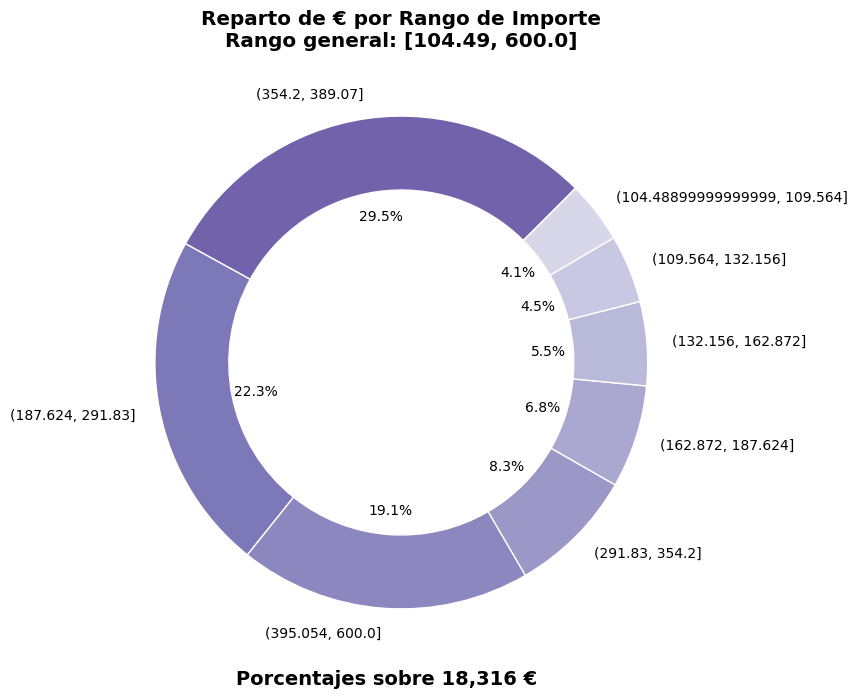

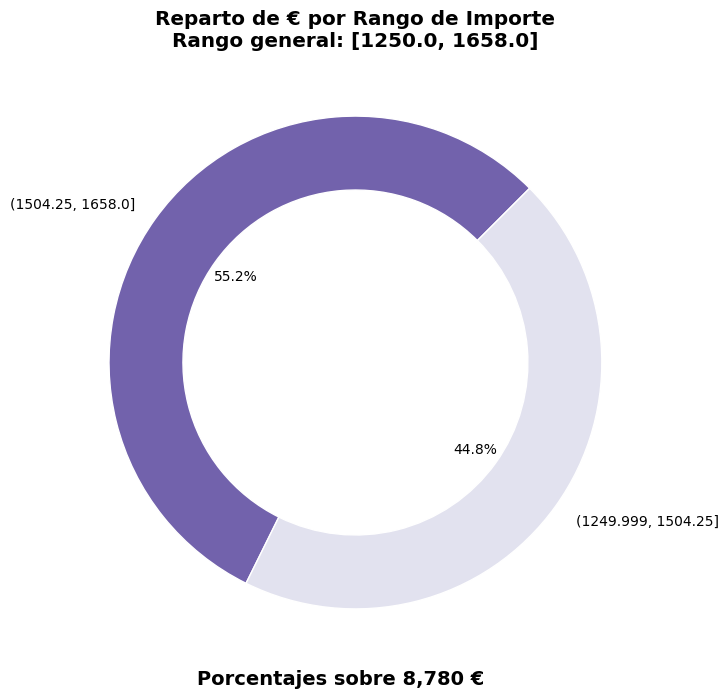

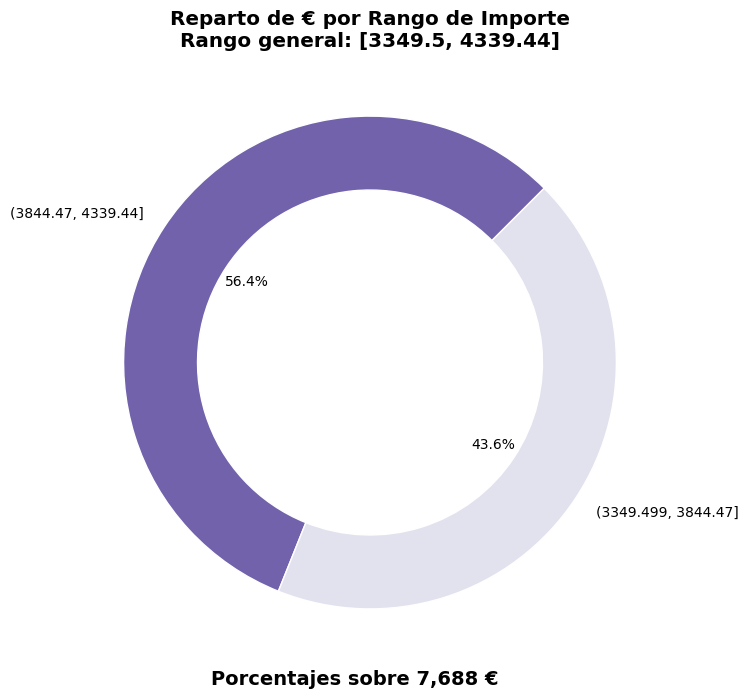

In [183]:
for _df in list_df_rangos_gastos:
    filtro = _df.groupby('Nivel_Importe')['Importe'].sum().sort_values(ascending = False)
    valores = list(filtro.values)
    etiquetas = list(filtro.index)
    unidad = '€'
    title = f"Reparto de {unidad} por Rango de Importe\nRango general: [{min(_df['Importe'])}, {max(_df['Importe'])}]"
    graficar_pie(valores, etiquetas, title, unidad, colormap_lilas)

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1148540790.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtro = _df.groupby('Nivel_Importe')['Importe'].sum().sort_values(ascending = False)


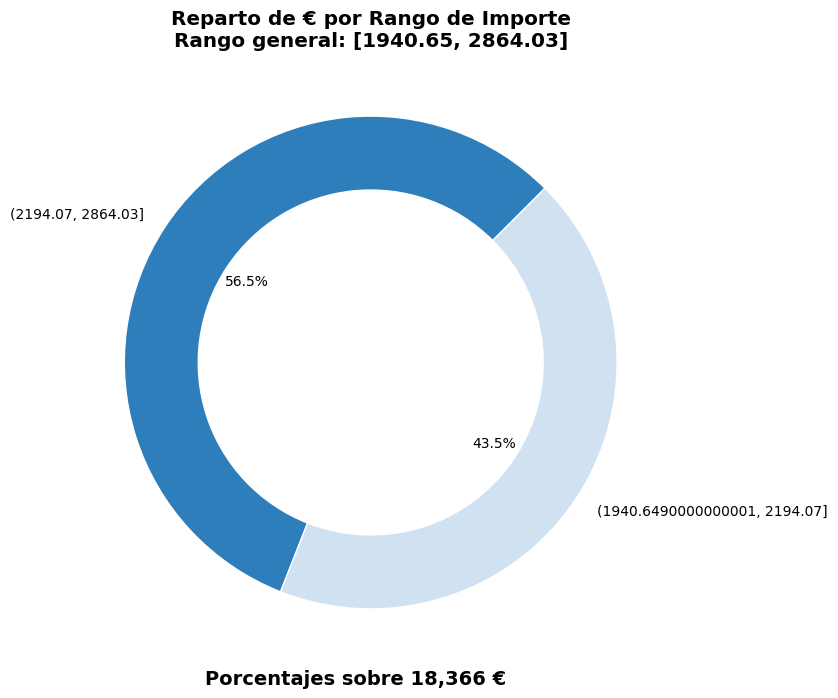

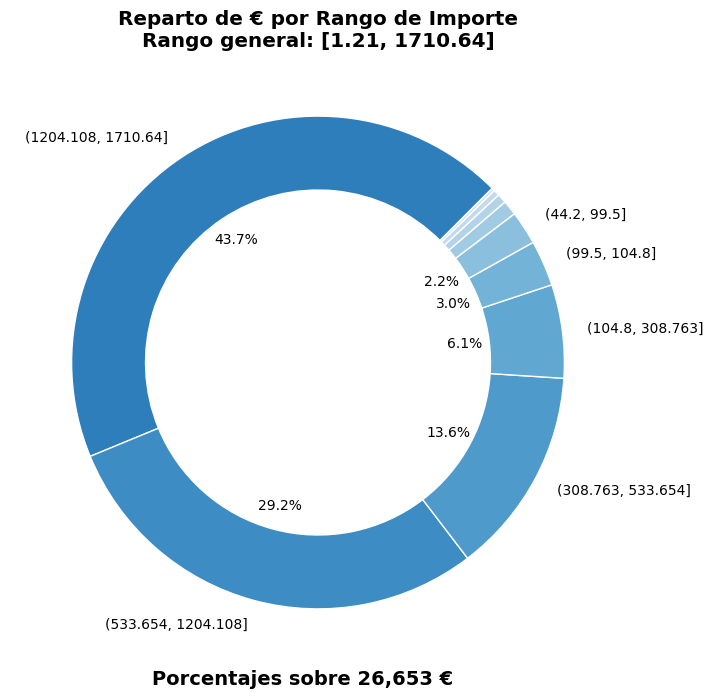

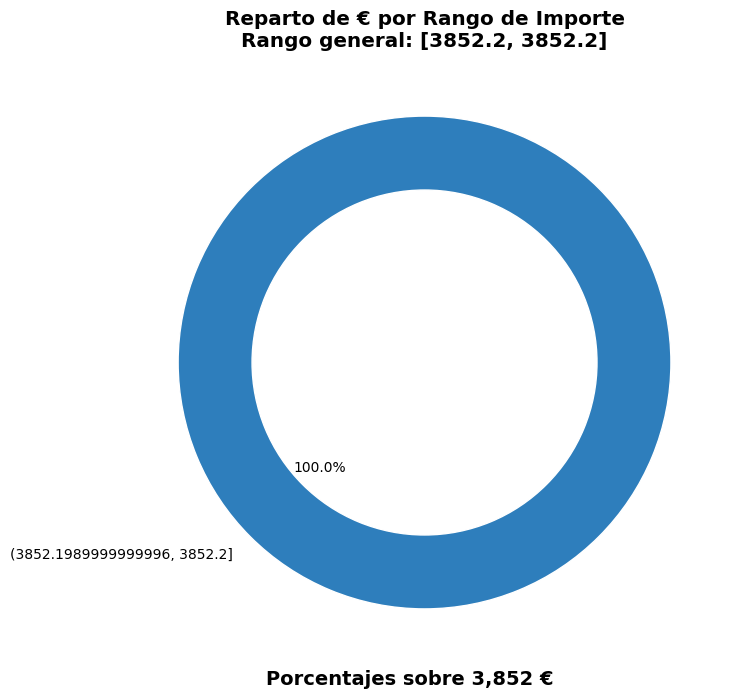

In [184]:
for _df in list_df_rangos_ingresos:
    filtro = _df.groupby('Nivel_Importe')['Importe'].sum().sort_values(ascending = False)
    valores = list(filtro.values)
    etiquetas = list(filtro.index)
    unidad = '€'
    title = f"Reparto de {unidad} por Rango de Importe\nRango general: [{min(_df['Importe'])}, {max(_df['Importe'])}]"
    graficar_pie(valores, etiquetas, title, unidad, colormap_azules)

#### **Resumen y Conclusiones**

En este apartado se han realizado las siguientes operaciones:
1. Se han categorizado los importes por frecuencia. Como es una columna de valores continuos, primero se ha discretizado y a la vez se generan estos rangos. Para ello se ha utilizado el concepto de cuartiles. Sin embargo, se ha realizado un proceso iterativo en el que el rango se forma con los valores sin outliers. Esto se repite para cada grupo de valores que quedan sin categorizar. De esta manera, se forman varios grupos según la "normalidad" de los datos que caen en este rango. Estos son: *Muy frecuente, frecuente, Poco Frecuente e Infrecuente* 
2. Se ha visualizado cuál es el rango en el que hay un mayor gasto sobre el total, donde *Frecuente* > *Muy Frecuente* > *Poco Frecuente* > *Infrecuente*. 
3. Se han discretizado en una nueva categoría dos grupos concretos, aquellos con una suma total de gastos mayor: el grupo *Frecuente* y el *Muy Frecuente*. Esta nueva cateogría divide los datos de estos grupos en **deciles**, y de nuevo se visualiza en qué rangos de importes se ha gastado más. 
    - Para la categoría de *Muy Frecuentes [0.2, 100.02]*, se ha gastado un total de aproximadamente 14 mil euros, donde el 32.3% de los gastos están en el intervalo [59, 100], y el 19.1% en [39, 59].
    - Para la categoría de *Frecuentes [104.49, 600.0]*, se ha gastado un total de aproximadamente 18,600 euros, donde el 41.9% de los gastos están en el intervalo [389, 600].
    - Los porcentajes mencionados son los relativos a su grupo y no al total de gastos.

# **4- DISTRIBUCION DE VARIABLES**

## 4.1- Distribución de variables numéricas

Es una buena practica el uso de historiogramas para ver la distribución de una variable

<AxesSubplot: ylabel='Frequency'>

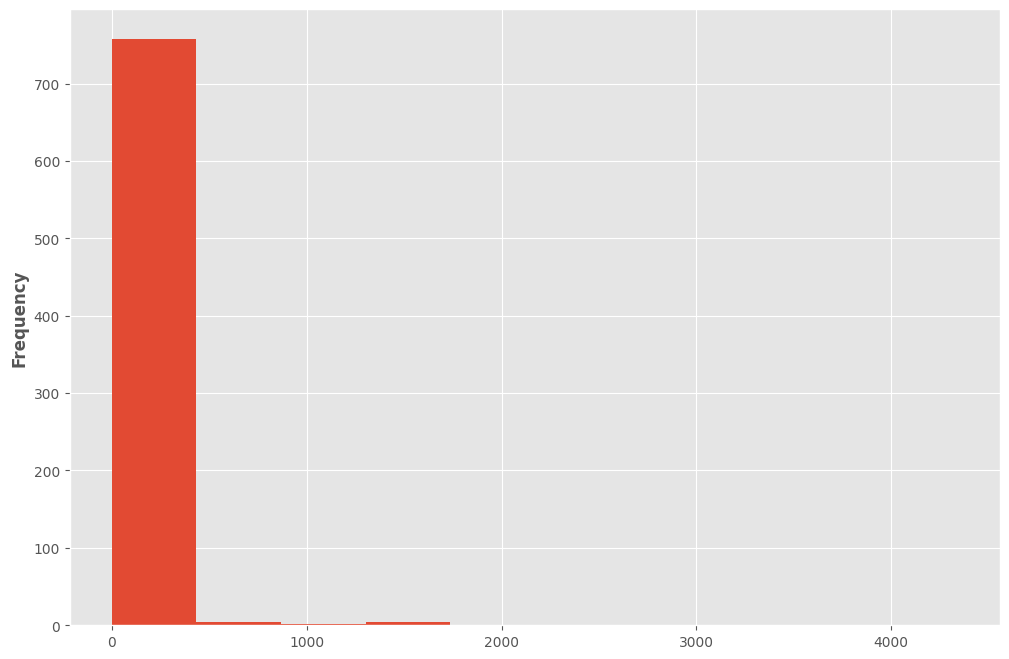

In [185]:
df_gastos['Importe'].plot.hist()

<AxesSubplot: ylabel='Frequency'>

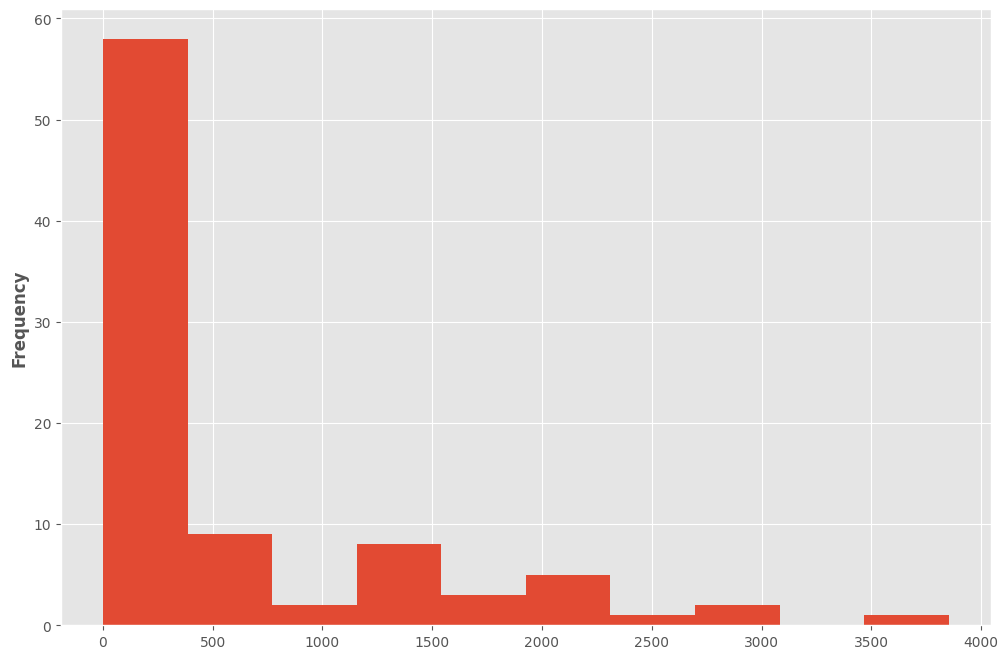

In [186]:
df_ingresos['Importe'].plot.hist()

Alternativamente, se puede hacer un gráfico KDE, o Kernel Density Estimate, que produce una función estimada de la distribución de la variable ([Función de densidad de probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad)). Además, se va a comparar con una lista de números con una distribución normal hecha por numpy

Text(0.5, 1.0, 'Distribución de la variable Importe del grupo "Gastos"')

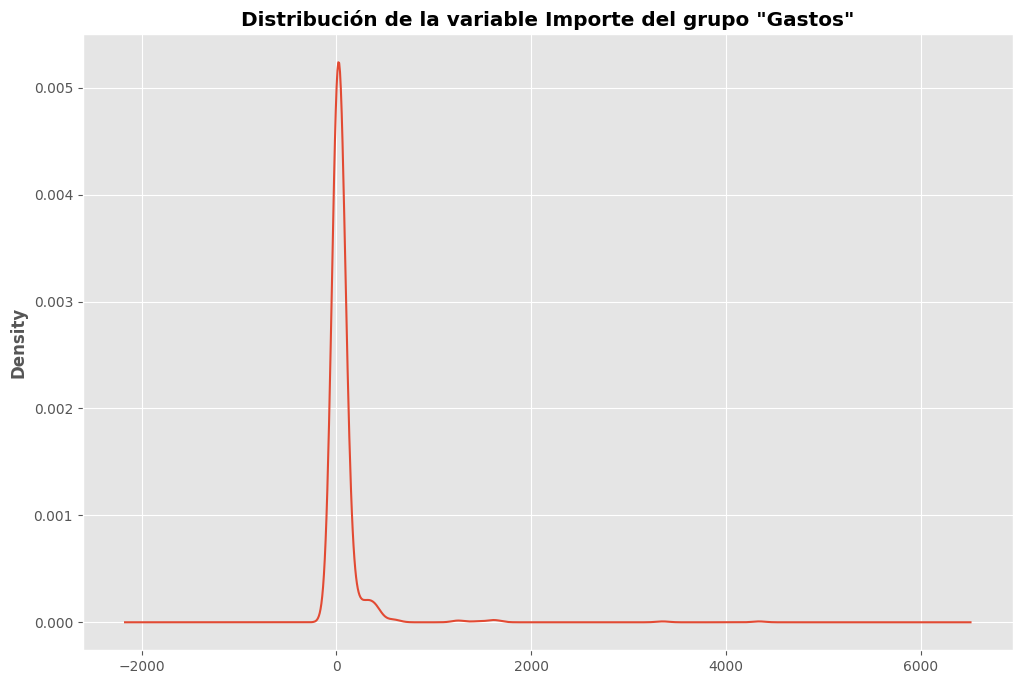

In [187]:
df_gastos['Importe'].plot.kde()
plt.title('Distribución de la variable Importe del grupo "Gastos"')

Text(0.5, 1.0, 'Distribución de la variable Importe del grupo "Ingresos"')

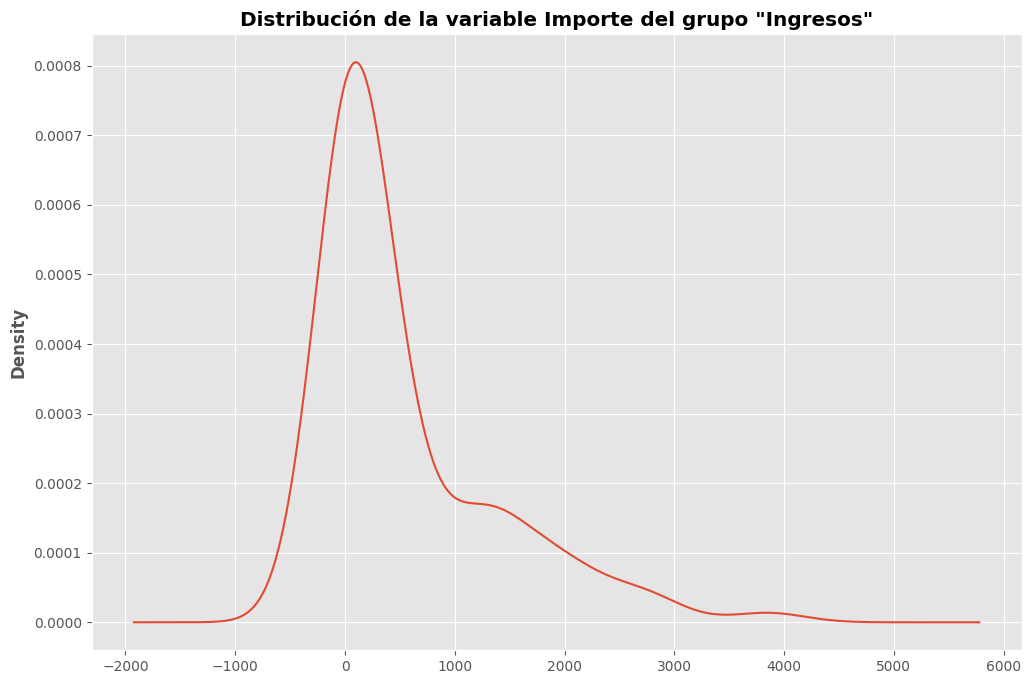

In [188]:
df_ingresos['Importe'].plot.kde()
plt.title('Distribución de la variable Importe del grupo "Ingresos"')

Con esta función se puede deducir lo que en apartados anteriores se ha estudiado más a fondo; La probabilidad de que un gasto esté en valores lejanos de los miles de euros y más cercana a cero es alta. Sin embargo, esto no nos está diciendo mucho, y esto es debido a la dispersión de los datos. No sigue una **distribución normal**

Text(0.5, 1.0, 'Distribución de la variable Saldo')

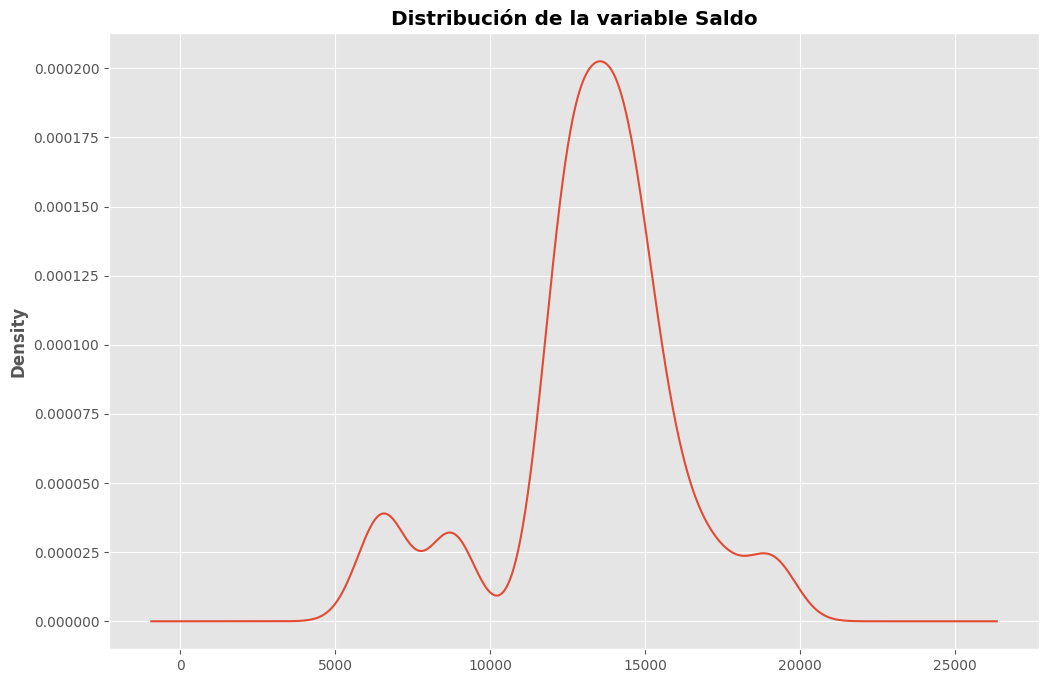

In [189]:
df['Saldo'].plot.kde()
plt.title('Distribución de la variable Saldo')

El saldo tiene una distribución más parecida a la normal, donde hay una alta probabilidad de que el saldo se encuentre en valores entre los 11 mil y los 16 mil euros.

Que las variables sigan una distribución normal es importante dado que muchos algoritmos asumen que la distribución de las variables es normal. La funcion de scipy.stats probplot compara la distribucion de una variable con una distribucion teorica (la normal por defecto), cuanto más se parezca la gráfica a una linea de 45 grados más normal será.

Text(0.5, 1.0, 'Diagrama de Probabilidad normal de la variable Importe del grupo "Gastos"')

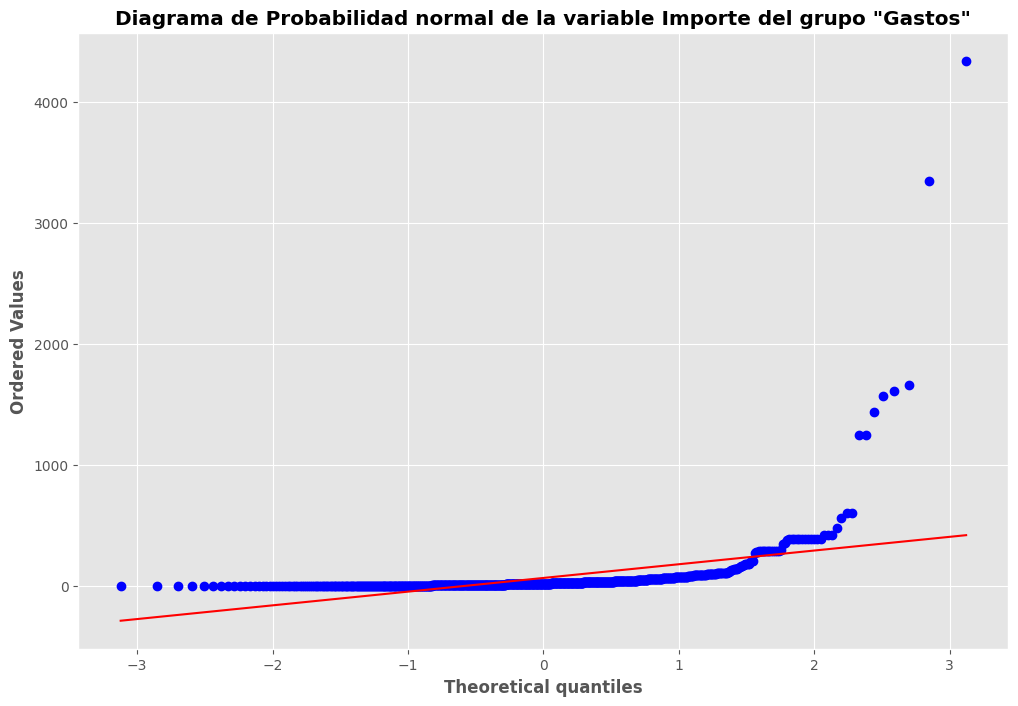

In [190]:
stats.probplot(df_gastos['Importe'], plot = plt)
plt.title('Diagrama de Probabilidad normal de la variable Importe del grupo "Gastos"')

Text(0.5, 1.0, 'Diagrama de Probabilidad normal de la variable Importe del grupo "Ingresos"')

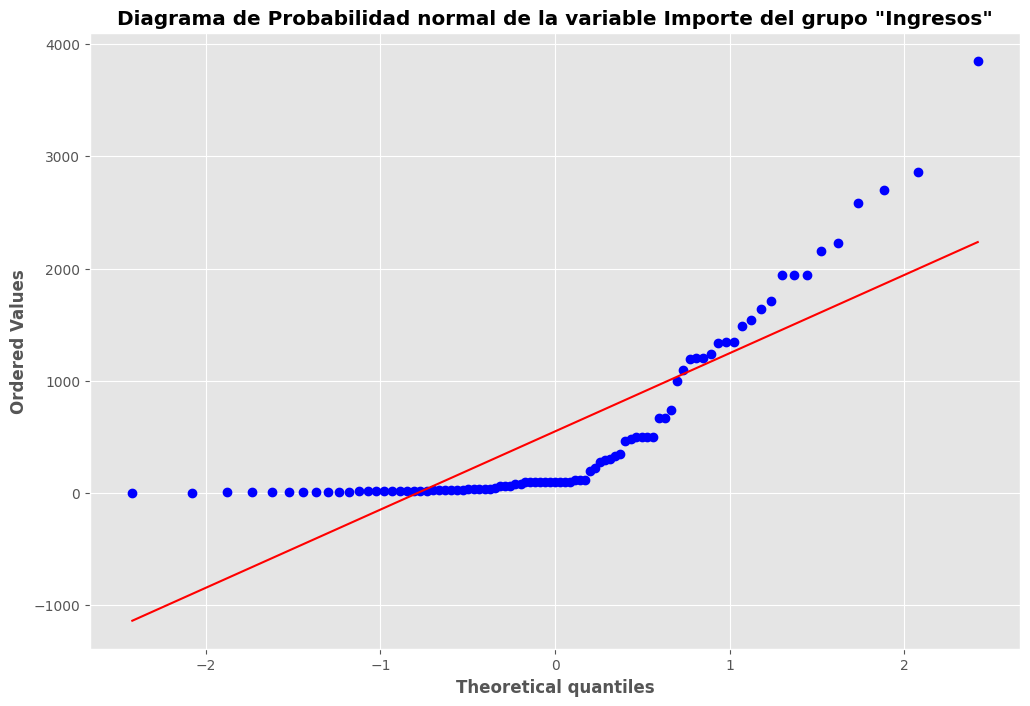

In [191]:
stats.probplot(df_ingresos['Importe'], plot= plt)
plt.title('Diagrama de Probabilidad normal de la variable Importe del grupo "Ingresos"')

Text(0.5, 1.0, 'Diagrama de Probabilidad normal de la variable Saldo del grupo "Ingresos"')

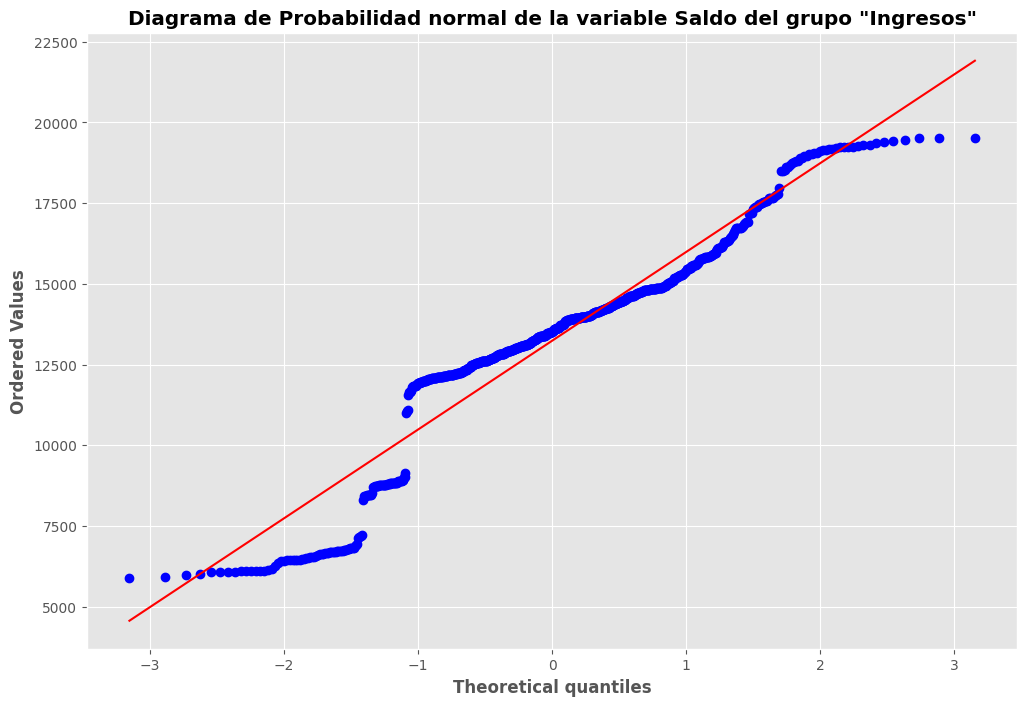

In [192]:
stats.probplot(df['Saldo'], plot = plt)
plt.title('Diagrama de Probabilidad normal de la variable Saldo del grupo "Ingresos"')

Se va a crear la lista de numeros con distr. normal por numpy y se generarán las gráficas anteriores

In [193]:
# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar una serie de números con distribución normal
media = 0  # media de la distribución
desviacion_estandar = 1  # desviación estándar de la distribución
tamanio_muestra = 1000  # tamaño de la muestra

numeros_normalmente_distribuidos = np.random.normal(loc=media, scale=desviacion_estandar, size=tamanio_muestra)

In [194]:
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.0, 'Distribución de un conjunto de distribución normal')

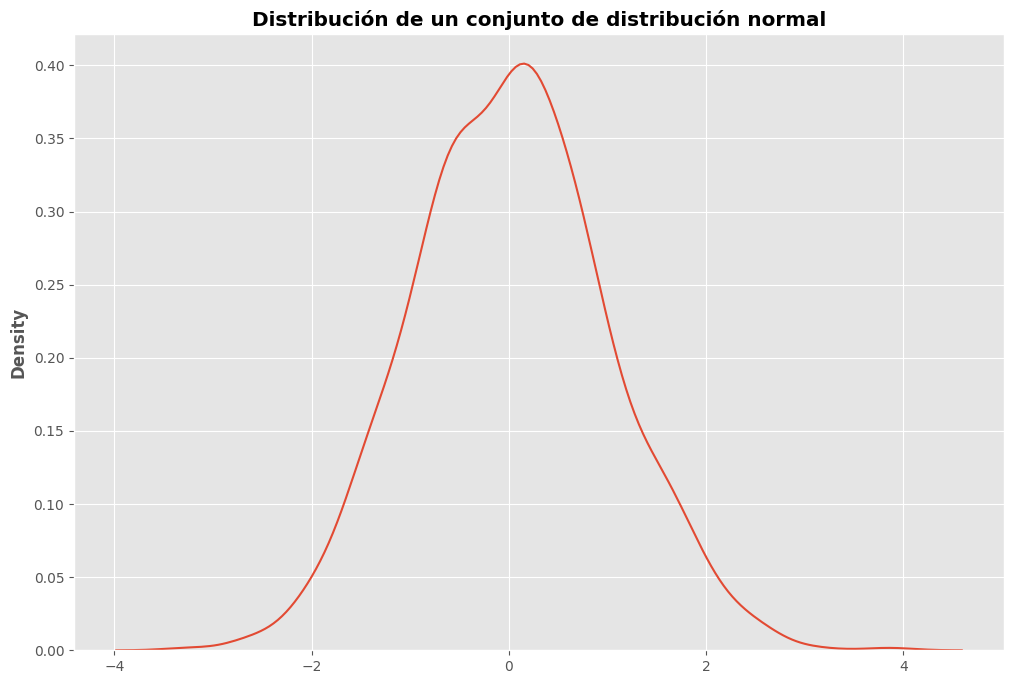

In [195]:
sns.kdeplot(numeros_normalmente_distribuidos)
plt.title('Distribución de un conjunto de distribución normal')

Text(0.5, 1.0, 'Diagrama de Probabilidad normal de un dataset de distribución normal')

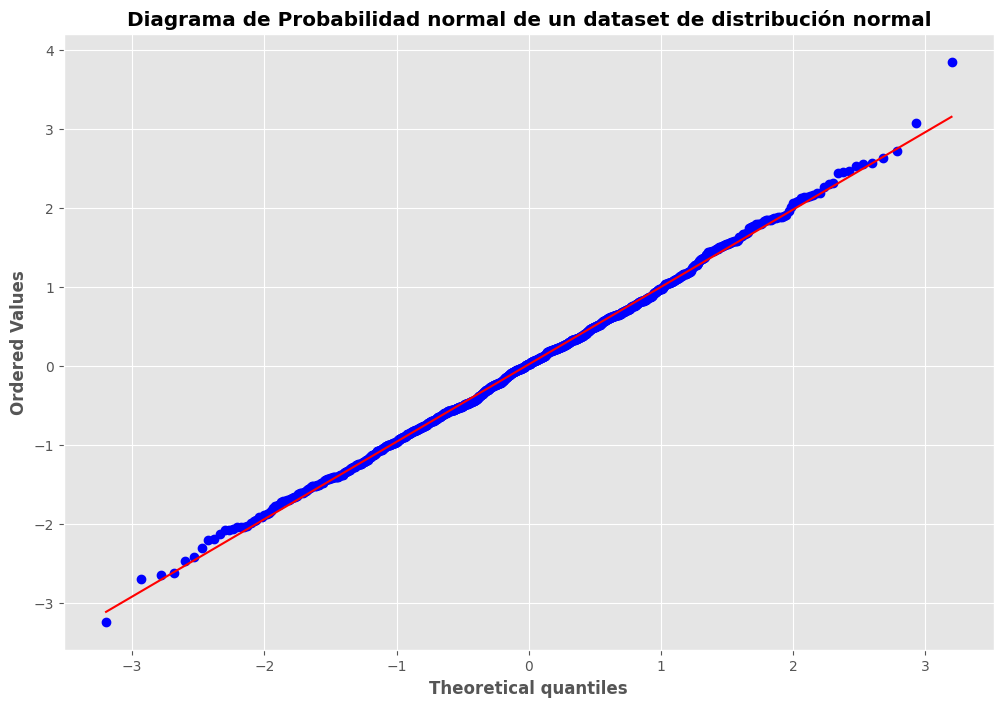

In [196]:
stats.probplot(numeros_normalmente_distribuidos, plot = plt)
plt.title('Diagrama de Probabilidad normal de un dataset de distribución normal')

Se puede comprobar que la variable de importe dentro de los gastos está lejos de seguir una distribución normal. Sin embargo, el saldo parece que sí que es más parecida a una distribución normal.

No obstante, conviene asegurarse haciendo un test de normalidad. En un test de normalidad, lo que queremos es rechazar la hipótesis nula de que la variable a analizar se ha obtenido de una población que sigue una distribución normal. Para un nivel de confianza de 95%, rechazamos la hipótesis nula si el p-value es inferior a 0.05. Esto es, si se obtiene un valor P (p-value) menor de 0.05, significa que las probabilidades de que la hipótesis nula sean ciertas es tan baja (menos de un 5%) que la rechazamos.

In [197]:
_, pval = stats.normaltest(df_gastos['Importe'])
pval

2.7592651324594937e-295

In [198]:
_, pval = stats.normaltest(df_ingresos['Importe'])
pval

2.578607541950299e-09

In [199]:
_, pval = stats.normaltest(df['Saldo'])
pval

2.097811535773677e-15

In [200]:
_, pval = stats.normaltest(numeros_normalmente_distribuidos)
pval

0.2758883767428564

Se comprueba que ninguna de los datos que tenemos sigue una distribución normal, excepto el conjunto de destribución normal de prueba.

Veamos ahora con las subtablas que se crearon

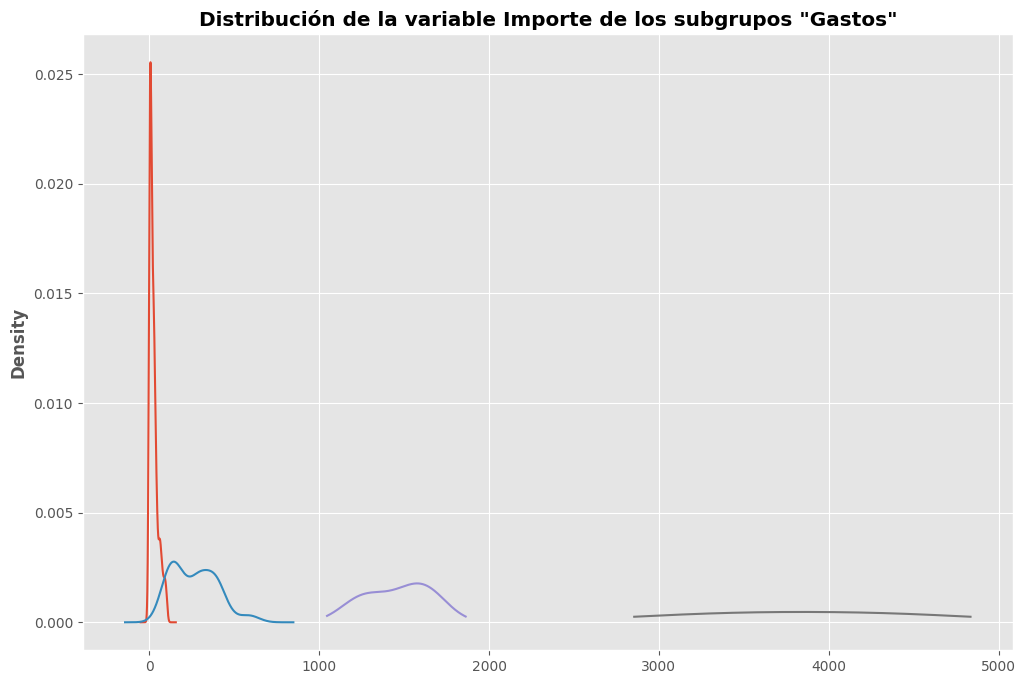

In [201]:
for _df in list_df_rangos_gastos:
    _df['Importe'].plot.kde()
    plt.title('Distribución de la variable Importe de los subgrupos "Gastos"')

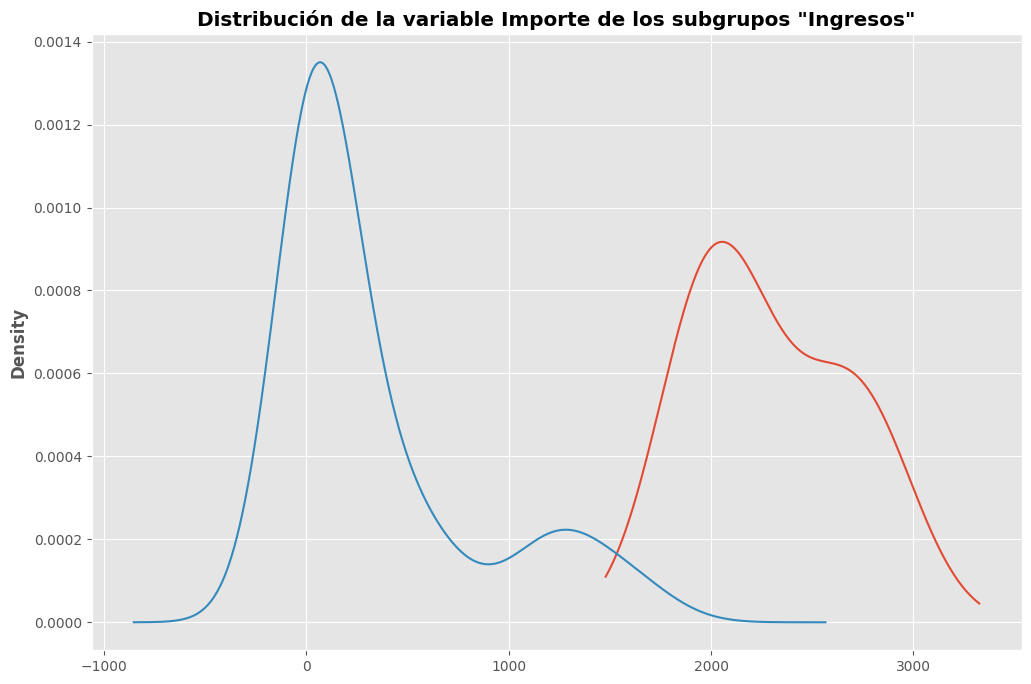

In [202]:
for _df in list_df_rangos_ingresos:
    if _df['Importe'].size > 1:
        _df['Importe'].plot.kde()
        plt.title('Distribución de la variable Importe de los subgrupos "Ingresos"')

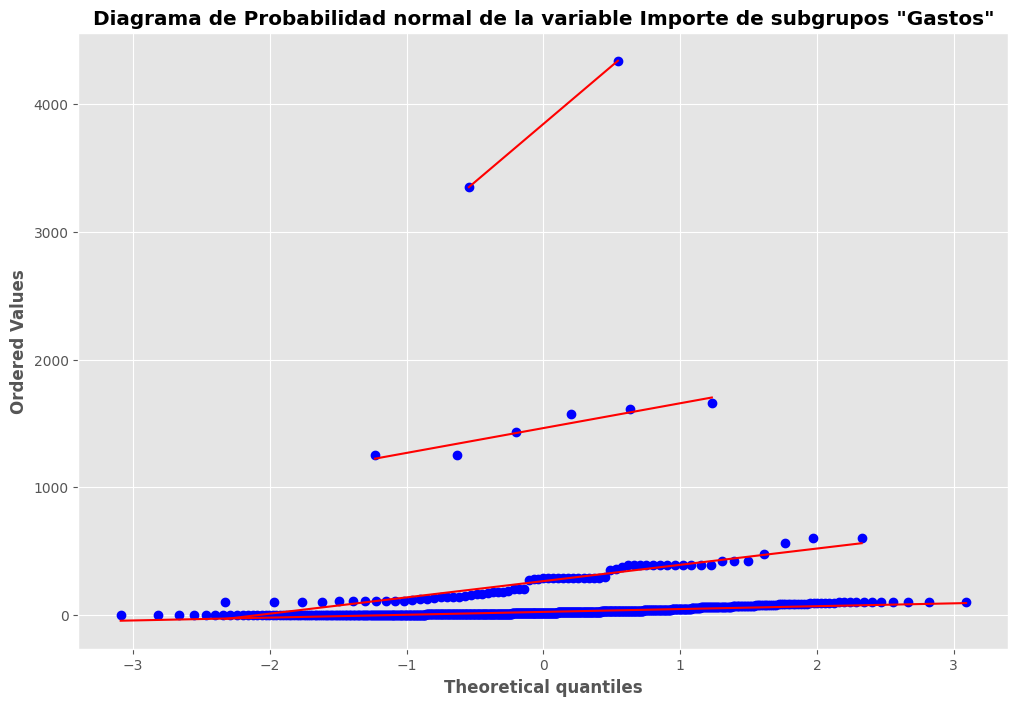

In [203]:
for _df in list_df_rangos_gastos:
    stats.probplot(_df['Importe'], plot = plt)
    plt.title('Diagrama de Probabilidad normal de la variable Importe de subgrupos "Gastos"')

c:\Users\Cristian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
c:\Users\Cristian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\Cristian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


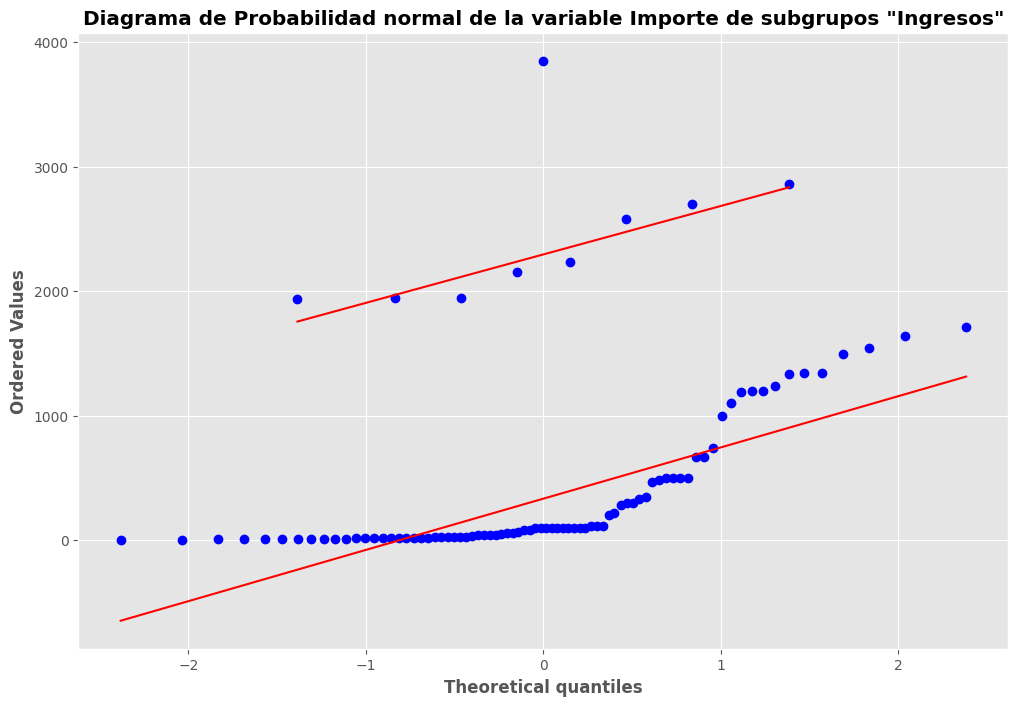

In [204]:
for _df in list_df_rangos_ingresos:
    stats.probplot(_df['Importe'], plot = plt)
    plt.title('Diagrama de Probabilidad normal de la variable Importe de subgrupos "Ingresos"')

Ahora el test de distribución normal

In [205]:
for _df in list_df_rangos_gastos:
    print(f"Intervalo {_df['Rango_Importe'][0]}:")
    if _df['Importe'].size >= 8:
        _, pval = stats.normaltest(_df['Importe'])
        print(pval)
    else:
        print("Se necesitan al menos 8 datos")

Intervalo [0.2, 103.77]:
3.2554354792488124e-33
Intervalo [104.49, 600.0]:
0.15418206114372293
Intervalo [1250.0, 1658.0]:
Se necesitan al menos 8 datos
Intervalo [3349.5, 4339.44]:
Se necesitan al menos 8 datos


In [206]:
for _df in list_df_rangos_ingresos:
    print(f"Intervalo {_df['Rango_Importe'][0]}:")
    if _df['Importe'].size >= 8:
        _, pval = stats.normaltest(_df['Importe'])
        print(pval)
    else:
        print("Se necesitan al menos 8 datos")

Intervalo [1940.65, 2864.03]:
0.37111176398869744
Intervalo [1.21, 1710.64]:
3.911384192353335e-06
Intervalo [3852.2, 3852.2]:
Se necesitan al menos 8 datos


c:\Users\Cristian\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Tal y como se esperaba por el comportamiento de las gráficas de distribución, la que más se acerca a tener una distribución normal es el grupo de Gastos - Frecuente. El resto, no tiene una distribución normal.

## 4.2- Distribución de variables categóricas

Como ya se ha visto en apartados anteriores, la mejor forma de ver la distribución de variables categoricas es usando el value.counts.

In [209]:
def graficar_barh(valores, etiquetas, titulo, unidad, colormap):
    #Se definen los colores
    num_colores = len(valores)
    color_min = 0.2
    color_max = 0.7
    colores = colormap(np.linspace(color_max, color_min, num_colores))
    plt.barh(etiquetas, valores, color = colores)
    plt.ylabel('Concepto')
    plt.xlabel(unidad)
    plt.title(titulo)
    #Se añaden los valores de cada barra en forma de texto
    for i, valor in enumerate(valores):
        plt.text(valor / 2, i, int(valor), va = 'center', ha = 'center')

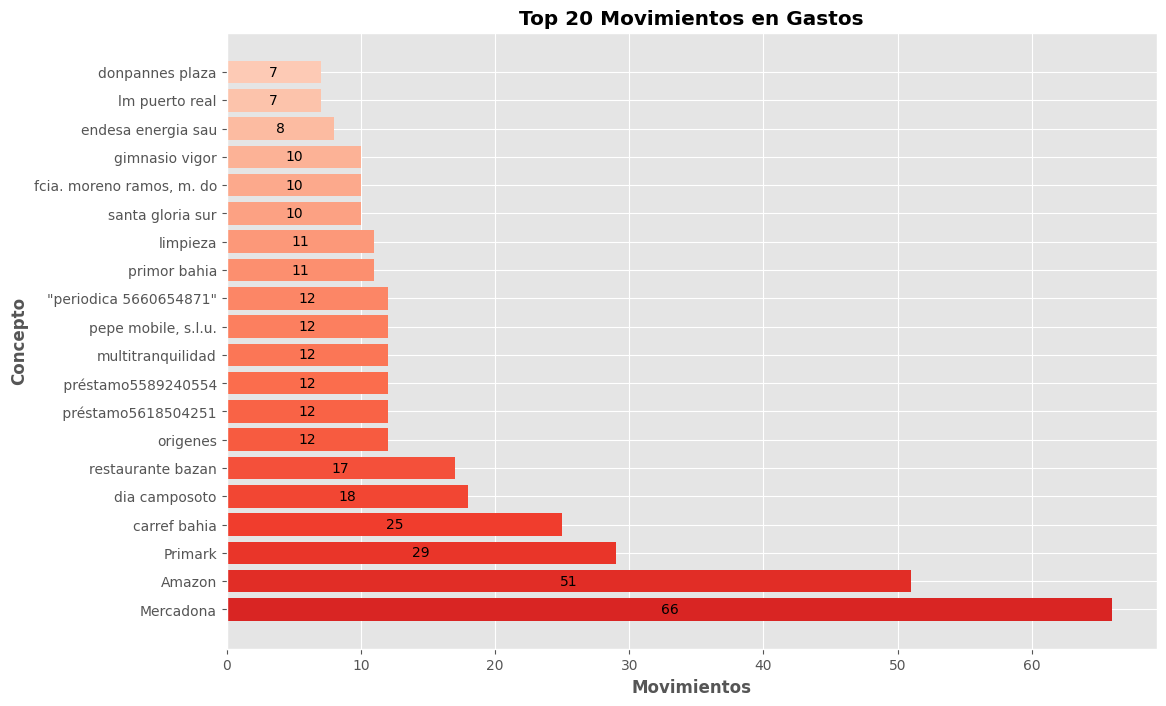

In [210]:
max_resultados = 20
filtro = df_gastos['Concepto'].value_counts(ascending = False).head(max_resultados)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = 'Movimientos'
titulo = f'Top {max_resultados} {unidad} en Gastos'
graficar_barh(valores, etiquetas, titulo, unidad, colormap_rojos)

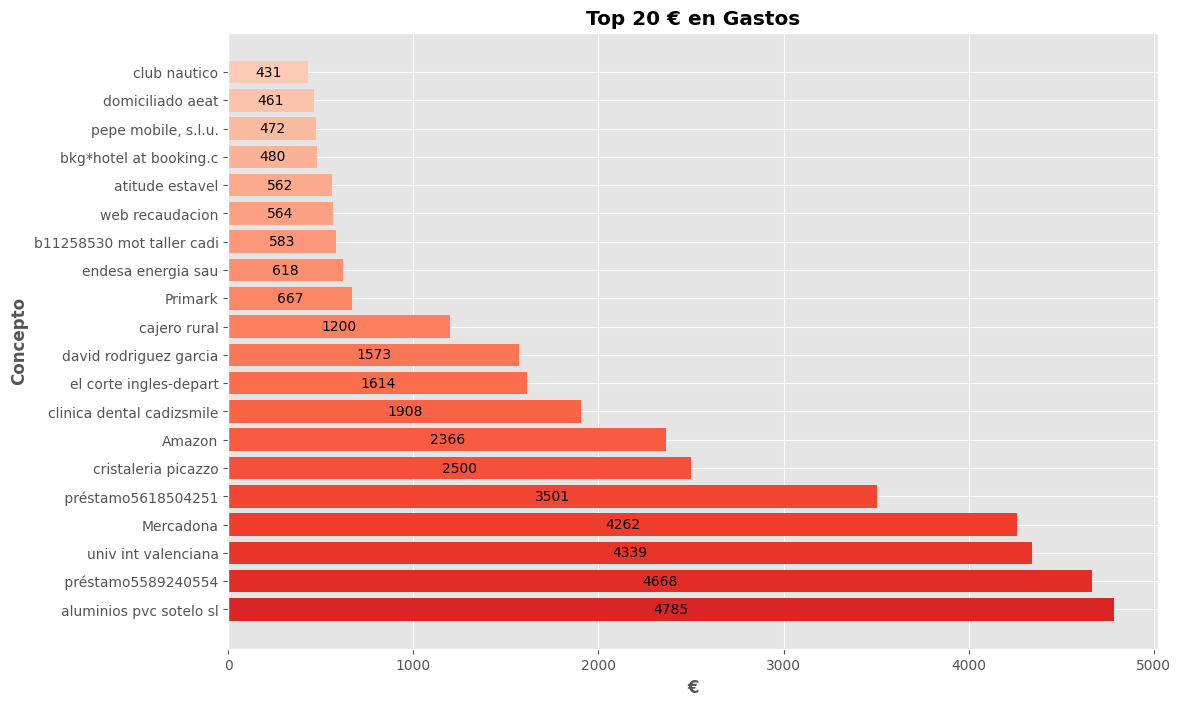

In [211]:
max_resultados = 20
filtro = df_gastos.groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Top {max_resultados} {unidad} en Gastos'
graficar_barh(valores, etiquetas, titulo, unidad, colormap_rojos)

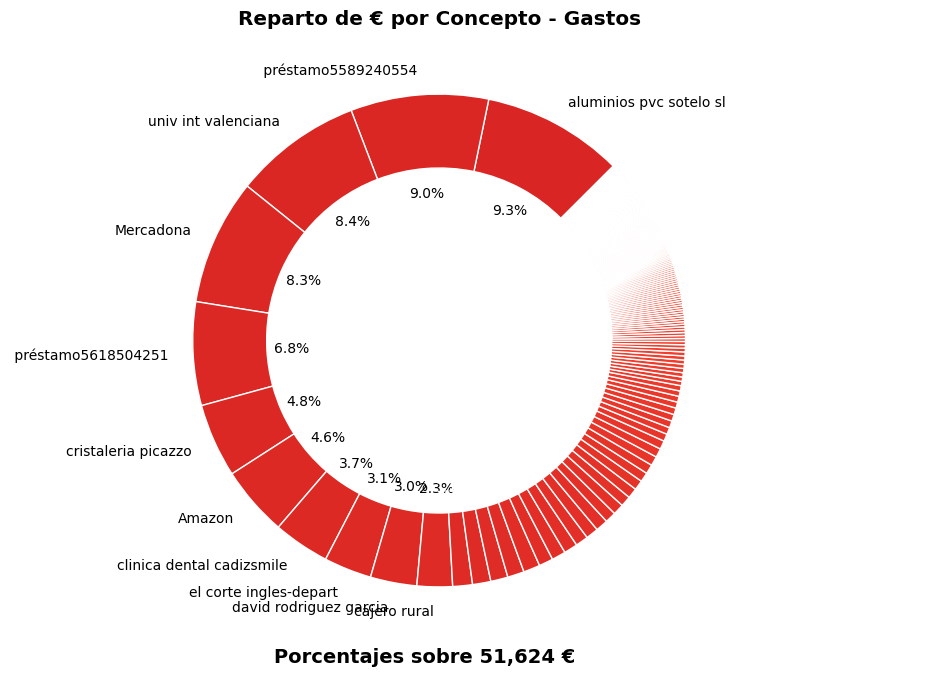

In [212]:
filtro = df_gastos.groupby('Concepto')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Concepto - Gastos'
graficar_pie(valores, etiquetas, titulo, unidad, colormap_rojos)

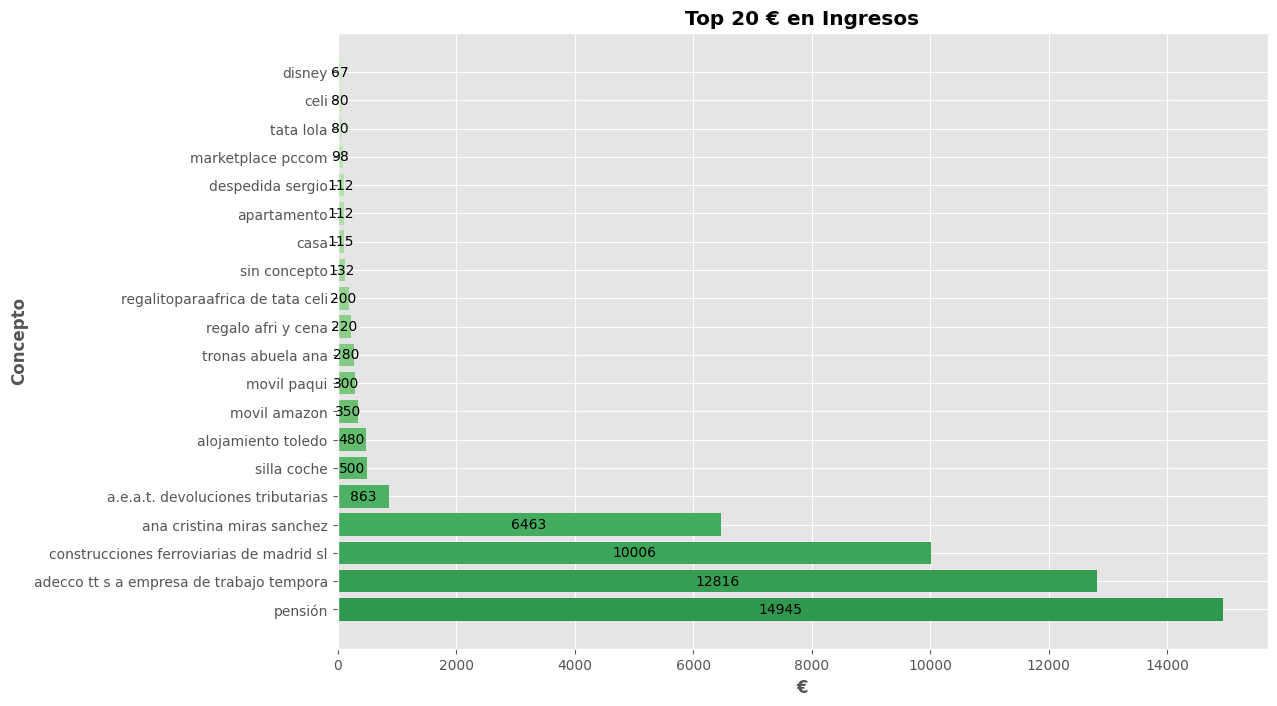

In [214]:
max_resultados = 20
filtro = df_ingresos.groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Top {max_resultados} {unidad} en Ingresos'
graficar_barh(valores, etiquetas, titulo, unidad, colormap_verdes)

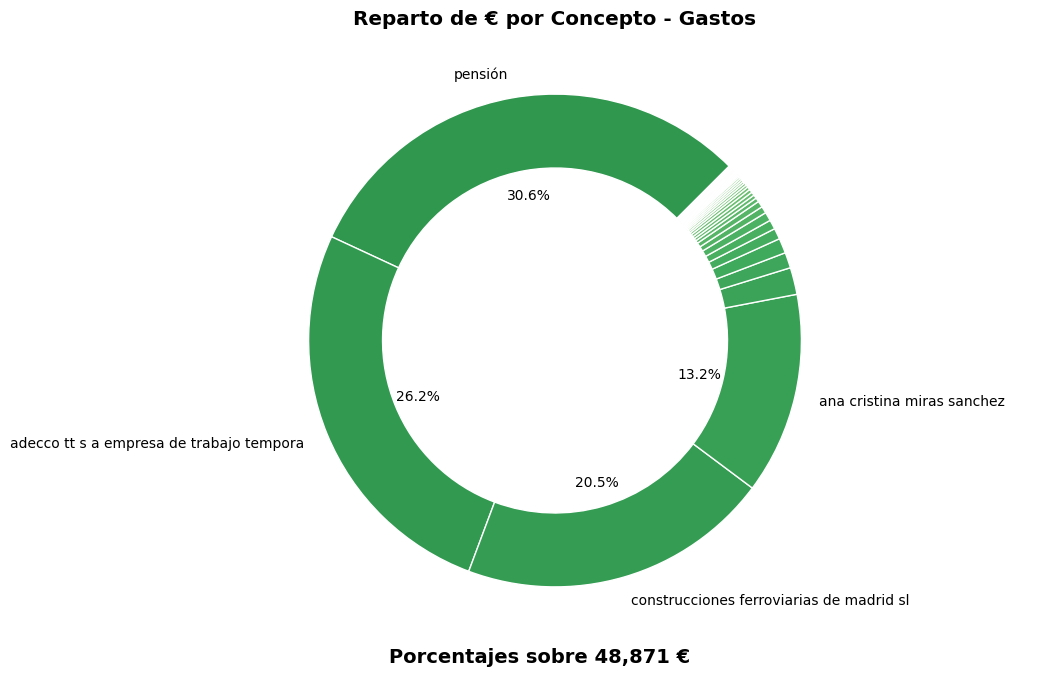

In [215]:
filtro = df_ingresos.groupby('Concepto')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Concepto - Gastos'
graficar_pie(valores, etiquetas, titulo, unidad, colormap_verdes)

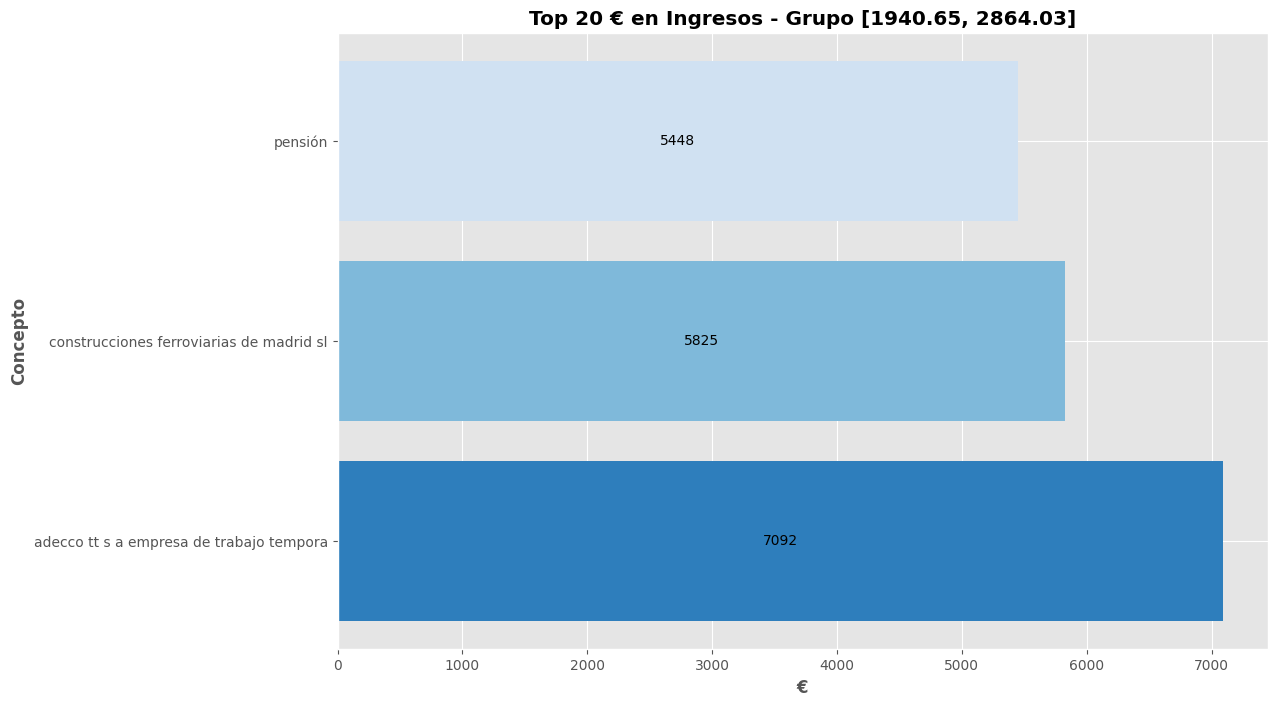

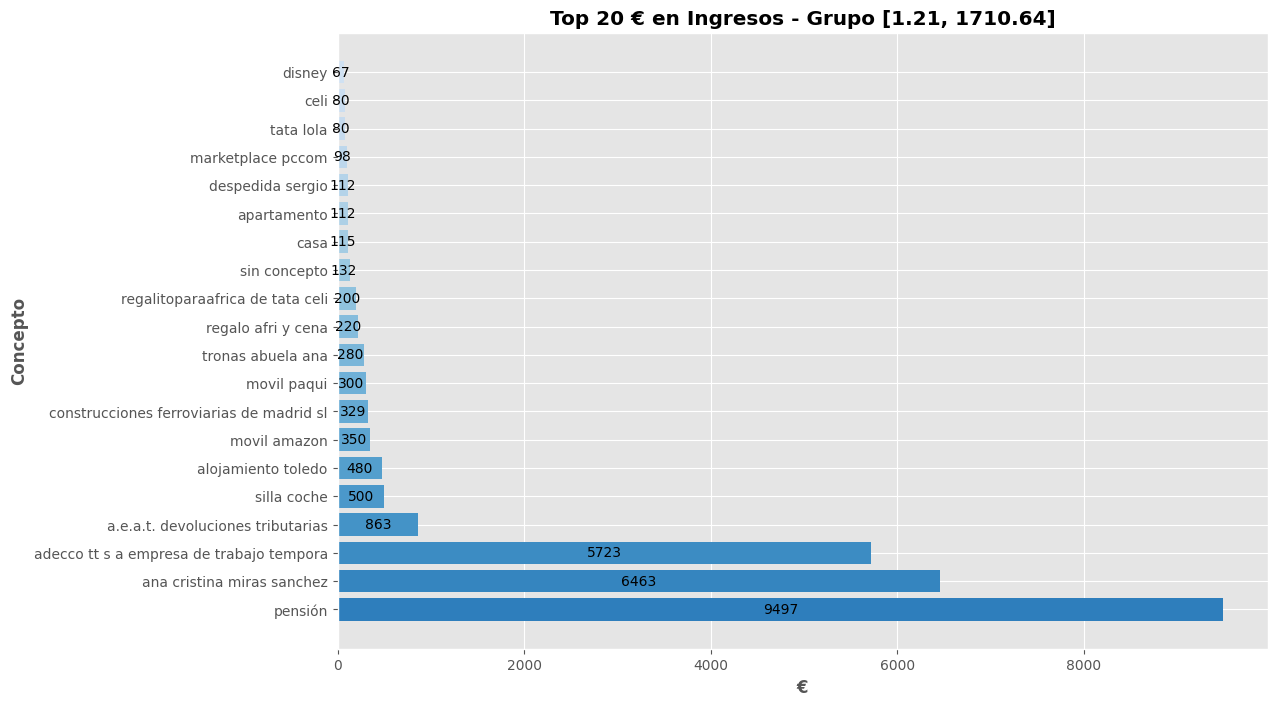

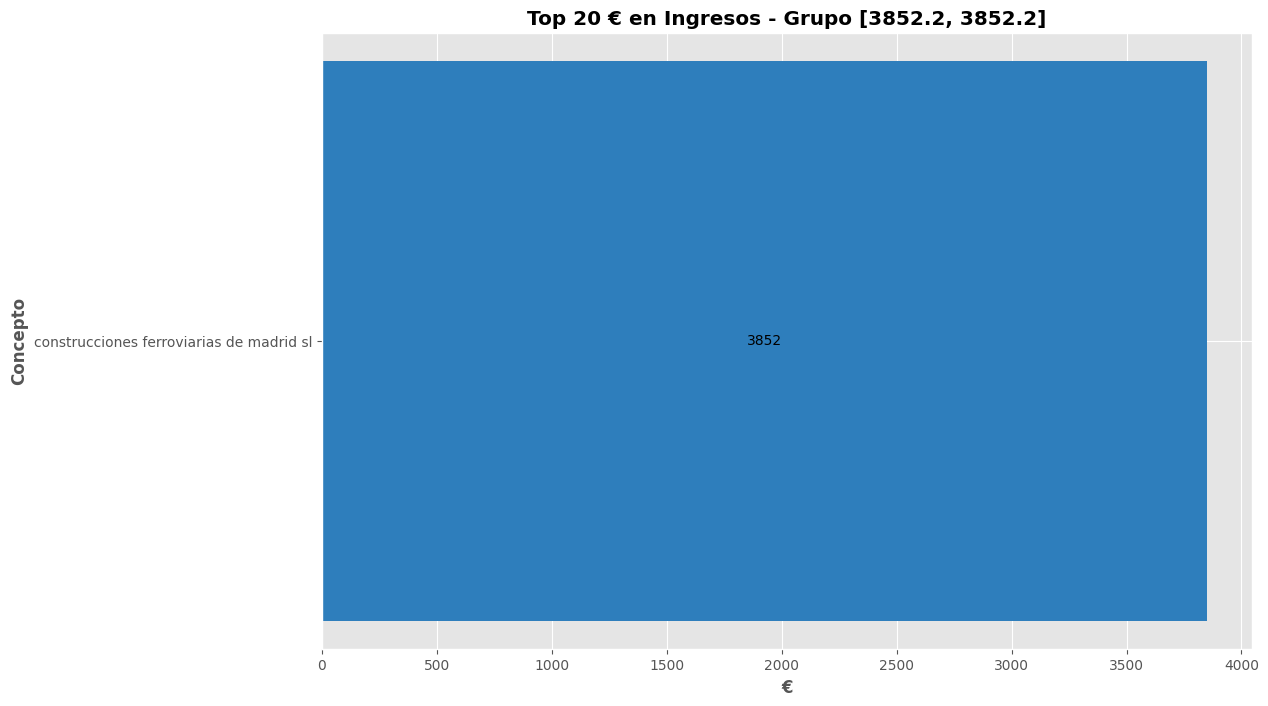

In [217]:
max_resultados = 20
for _df in list_df_rangos_ingresos:
    filtro = _df.groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
    valores = list(filtro.values)
    etiquetas = list(filtro.index)
    unidad = '€'
    titulo = f"Top {max_resultados} {unidad} en Ingresos - Grupo [{min(_df['Importe'])}, {max(_df['Importe'])}]"
    graficar_barh(valores, etiquetas, titulo, unidad, colormap_azules)
    plt.show()

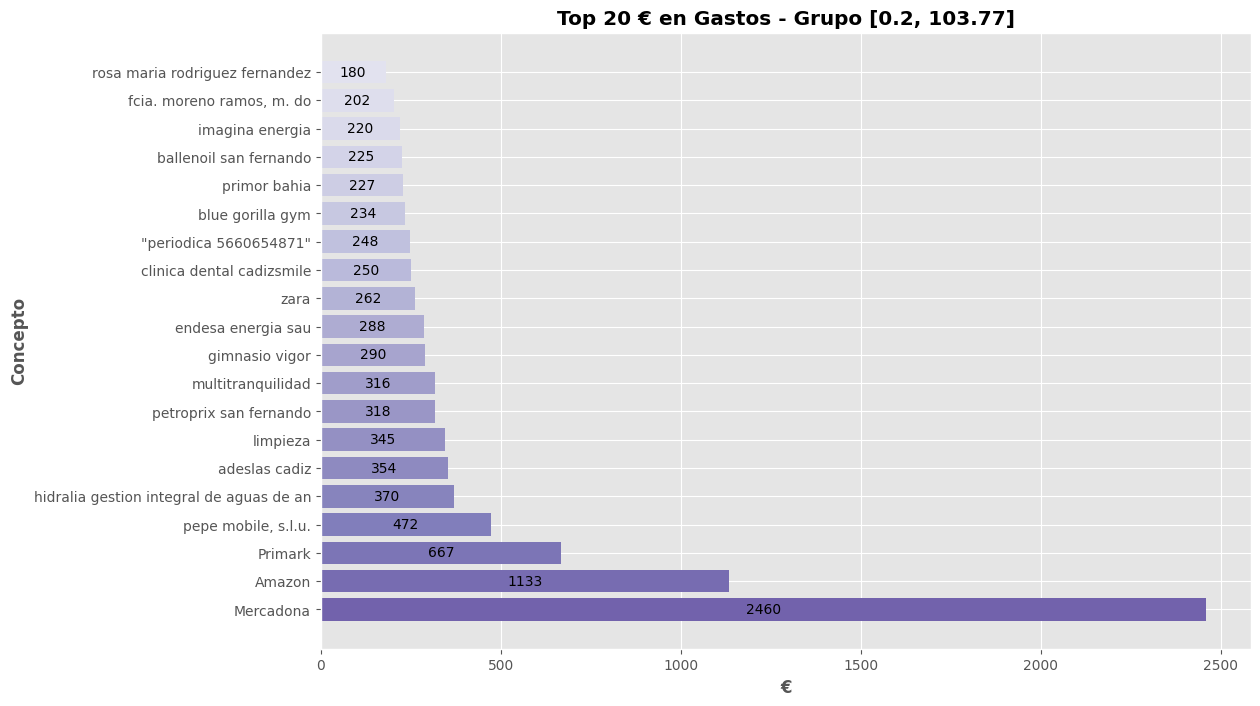

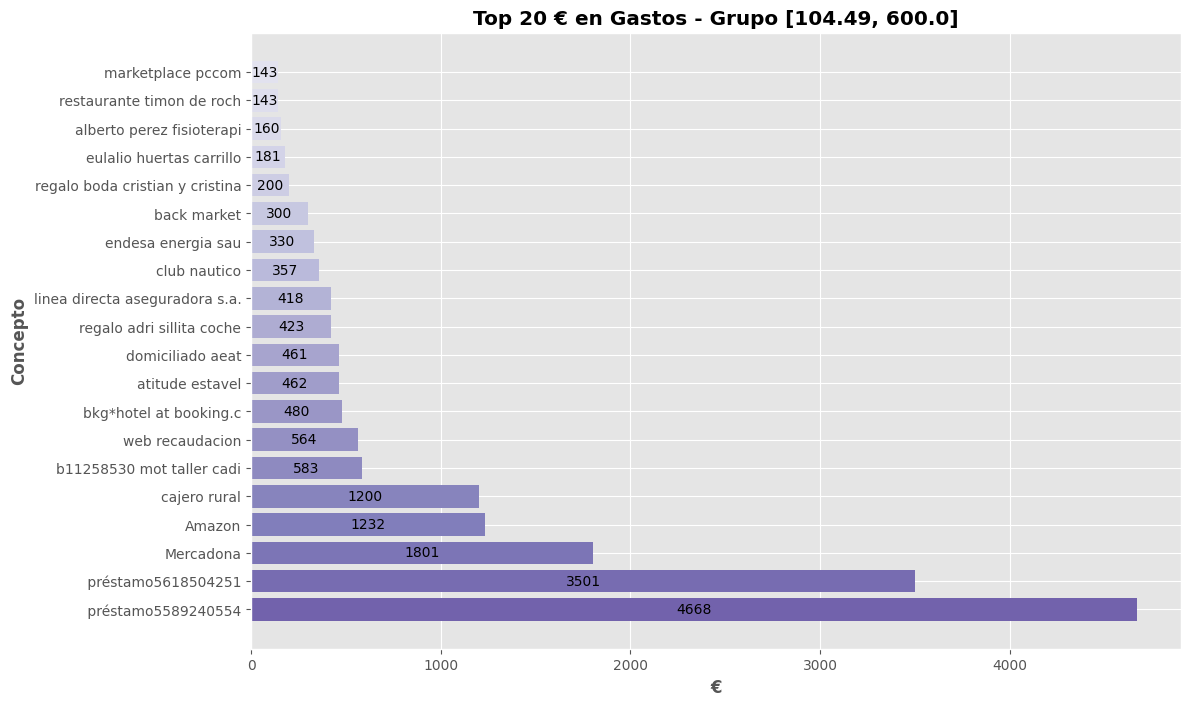

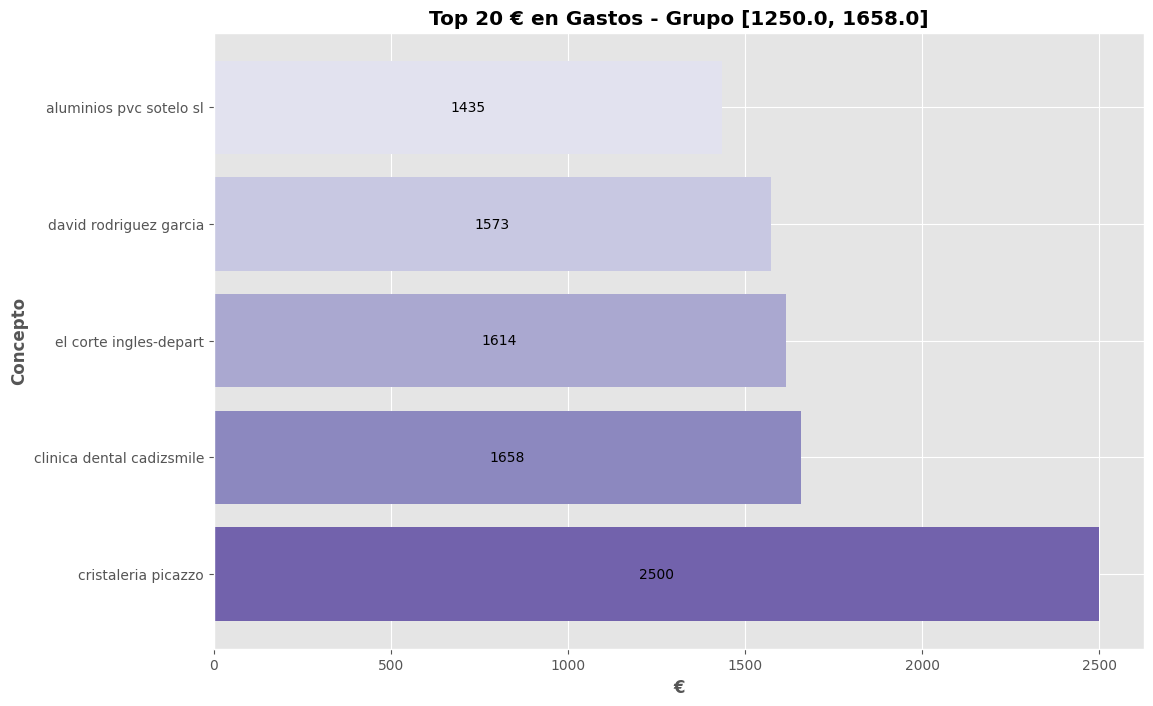

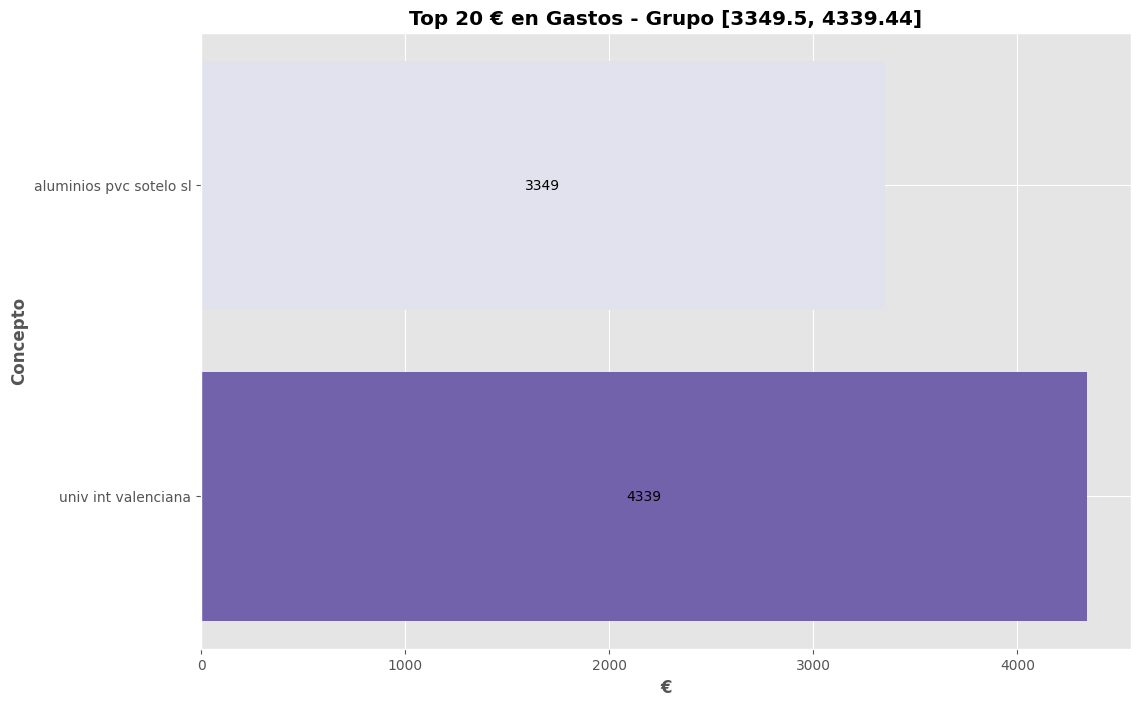

In [218]:
max_resultados = 20
for _df in list_df_rangos_gastos:
    filtro = _df.groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
    valores = list(filtro.values)
    etiquetas = list(filtro.index)
    unidad = '€'
    titulo = f"Top {max_resultados} {unidad} en Gastos - Grupo [{min(_df['Importe'])}, {max(_df['Importe'])}]"
    graficar_barh(valores, etiquetas, titulo, unidad, colormap_lilas)
    plt.show()

Primero se van a crear unas categorías superiores para una mayor agrupación de conceptos. Esto es un trabajo muy personal porque dependerá en gran medida del dueño del dataset. La cantidad y el detalle que se quiera alcanzar dependerá será una decisión personal. Sin embargo, se aconseja, al menos, categorizar el top 20 de los gastos comunes.

Se crearán dos nuevas columnas:
1. Concep_Aclarativo
2. Concep_Categoria

In [219]:
supermercados_espania = [
    'mercadona', 'dia', 'carref', 'eliant', 'lidl', 'fruteria', 'supeco', 'aldi',
    'eroski', 'caprabo', 'hipercor', 'alcampo', 'coviran', 'superdino', 'myprotein', 'hsn',
    'supersol', 'froiz', 'masymas', 'mas', 'mercadal', 'merkabici', 'ahorramas', 'tuotrosuper',
    'tusuper', 'ecocenter', 'coviran', 'masfresco', 'sumapaz', 'caserito',
    'masymas', 'mascoop', 'consumcoop', 'saludable', 'amazonfresh', 'ulabox',
    'hiperusera', 'isoySuper', 'tendamarket', 'primaprix', 'capraboacasa',
    'carritus', 'mistral', 'mundofood', 'delSuperes',
    'hiperber', 'ycoms', 'tabaola', 'youzee', 'entrellaves', 'delhortaeacasa',
    'autofacil', 'ontruck', 'notelapierdas'
]
estaciones_combustible_espania = [
    'petroprix', 'petrol', 'autofuel', 'ballenoil', 'Repsol',
    'Cepsa', 'BP', 'Galp', 'Shell', 'Avia',
    'E.S. Auchan', 'E.S. Alcampo', 'E.S. Carrefour', 'BonÁrea', 'Esclatoil',
    'Esso', 'GALP', 'Iberdoex', 'Iturmendi', 'Meroil',
    'Petrocat', 'Staroil', 'Valcarce', 'VLC', 'Agip',
    'Beroil', 'Campsa', 'Disa', 'Energy', 'Eurocam',
    'Farruco', 'Gases Express Nieto', 'Integra Oil', 'Lecta', 'Magna Oil',
    'MGOil', 'Molgas', 'Oil Albera', 'Oil Precio', 'PetroAlacant',
    'PetroPrix', 'Petromax', 'Petromiralmag', 'Petronor', 'Petroprix',
    'Petroset', 'Plenoil', 'Prellezo', 'Prio', 'Red Ahorro',
    'Repsol', 'SAGIM', 'Shell', 'Staroil', 'Tamoil',
    'Tegasa', 'Urbaprix', 'Urbia', 'VCC', 'VITOGAS', 'hm oil'
]
companias_luz_espania = [
    'Endesa', 'Iberdrola', 'Naturgy', 'Imagina energ', 'EDP España', 'Viesgo', 'Energía XXI', 'Holaluz', 'Aldro Energía',
    'Podo', 'Lucera', 'Aura Energía', 'HidroCantábrico', 'Energía Sostenible', 'Fortia Energía', 'Som Energia',
    'Factor Energía', 'Cepsa Energía', 'Fenie Energía', 'Gana Energía', 'Energía Verde', 'Gas Natural Fenosa',
    'Repsol Electricidad y Gas', 'EDP Renewables', 'Holaluz', 'Iberia Solar', 'Acciona Energía'
]
sitios_compras_web_espana = [
    'Amazon', 'AliExpress', 'eBay', 'Wallapop', 'Temu', 'back market',
    'El Corte Inglés', 'Fnac', 'MediaMarkt', 'Carrefour Online',
    'Zalando', 'Worten', 'PCComponentes', 
    'Ulabox', 'Veepee',
    'Tiendanimal', 'PcBox', 'MobileFun',
    'Ulabox', 'Veepee', 'Tiendanimal', 'PcBox', 'MobileFun', 'marketplace'
]

tiendas_espana = [
    'El Corte Ingles', 'Primark', 'MediaMarkt', 'Zara', 'Mango', 'Decathlon',
    'Leroy Merlin', 'Aki Bricolaje', 'Ikea', 'FNAC', 'Toys "R" Us', 'jd', 'kiabi',
    'Sprinter', 'Bershka', 'Pull&Bear', 'Stradivarius', 'Conforama', 'newyorker',
    'Casa del Libro', 'PCComponentes', 'Leroy Merlin', 'El Ganso', 'Primor', 'alvaro moreno'
]

In [220]:
df_gastos['Concep_Aclarativo'] = None

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\166049899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Concep_Aclarativo'] = None


Aunque anteriormente ha sido graficado, está bien visualizar cuáles son los conceptos con mayor gasto y así comprobar que, al menos, la mayoría de los primeros estén categorizados

In [221]:
max_resultados = 20
df_gastos.groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)

Concepto
aluminios pvc sotelo sl      4785.00
 préstamo5589240554          4668.84
univ int valenciana          4339.44
Mercadona                    4262.01
 préstamo5618504251          3501.99
cristaleria picazzo          2500.00
Amazon                       2366.29
clinica dental cadizsmile    1908.00
el corte ingles-depart       1614.15
david rodriguez garcia       1573.00
cajero rural                 1200.00
Primark                       667.00
endesa energia sau            618.94
b11258530 mot taller cadi     583.87
web recaudacion               564.44
atitude estavel               562.32
bkg*hotel at booking.c        480.00
pepe mobile, s.l.u.           472.75
domiciliado aeat              461.33
club nautico                  431.40
Name: Importe, dtype: float64

In [263]:
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(supermercados_espania), case = False), 'Concep_Aclarativo'] = 'Supermercados'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(estaciones_combustible_espania), case = False), 'Concep_Aclarativo'] = 'Gasolina'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(companias_luz_espania), case = False), 'Concep_Aclarativo'] = 'Electricidad'
df_gastos.loc[df_gastos['Concepto'].str.contains('hidralia', case = False), 'Concep_Aclarativo'] = 'Agua'
df_gastos.loc[df_gastos['Concepto'].str.contains('5618504251', case = False), 'Concep_Aclarativo'] = 'Préstamo Coche'
df_gastos.loc[df_gastos['Concepto'].str.contains('farmacia', case = False), 'Concep_Aclarativo'] = 'Farmacia'
df_gastos.loc[df_gastos['Concepto'].str.contains('multitranquilidad', case = False), 'Concep_Aclarativo'] = 'Seguro Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('adeslas', case = False), 'Concep_Aclarativo'] = 'Seguro Salud'
df_gastos.loc[df_gastos['Concepto'].str.contains('web recaudacion', case = False), 'Concep_Aclarativo'] = 'IBI'
df_gastos.loc[df_gastos['Concepto'].str.contains('5589240554', case = False), 'Concep_Aclarativo'] = 'Hipoteca Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('rosa maria rodriguez fernandez', case = False), 'Concep_Aclarativo'] = 'Garaje'
df_gastos.loc[df_gastos['Concepto'].str.contains('5660654871', case = False), 'Concep_Aclarativo'] = 'Comunidad Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('cocinas el pinar', case = False), 'Concep_Aclarativo'] = 'Reforma Cocina'
df_gastos.loc[df_gastos['Concepto'].str.contains('pepe mobile', case = False), 'Concep_Aclarativo'] = 'Internet y Móvil'
df_gastos.loc[df_gastos['Concepto'].str.contains('cafe', case = False), 'Concep_Aclarativo'] = 'Cafeteria'
df_gastos.loc[df_gastos['Concepto'].str.contains('restaurant', case = False), 'Concep_Aclarativo'] = 'Restaurante'
df_gastos.loc[df_gastos['Concepto'].str.contains('bar', case = False), 'Concep_Aclarativo'] = 'Bar'
df_gastos.loc[df_gastos['Concepto'].str.contains('aeat', case = False), 'Concep_Aclarativo'] = 'Hacienda'
df_gastos.loc[df_gastos['Concepto'].str.contains('picaz', case = False), 'Concep_Aclarativo'] = 'Reforma Despacho'
df_gastos.loc[df_gastos['Concepto'].str.contains('sotelo|eulalio', case = False), 'Concep_Aclarativo'] = 'Reforma Ventanas'
df_gastos.loc[df_gastos['Concepto'].str.contains('david rodriguez garcia', case = False), 'Concep_Aclarativo'] = 'Instalación Aire Acondicionado'
df_gastos.loc[df_gastos['Concepto'].str.contains('valenciana', case = False), 'Concep_Aclarativo'] = 'Master en Big Data y Data Science'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(sitios_compras_web_espana), case = False), 'Concep_Aclarativo'] = 'Compras Web'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(tiendas_espana), case = False), 'Concep_Aclarativo'] = 'Compra Tiendas'
df_gastos.loc[df_gastos['Concepto'].str.contains('dental', case = False), 'Concep_Aclarativo'] = 'Dentista'
df_gastos.loc[df_gastos['Concepto'].str.contains('taller', case = False), 'Concep_Aclarativo'] = 'Mantenimiento Coche'
df_gastos.loc[df_gastos['Concepto'].str.contains('booking', case = False), 'Concep_Aclarativo'] = 'Hotel/Hostal'
df_gastos.loc[df_gastos['Concepto'].str.contains('limpieza', case = False), 'Concep_Aclarativo'] = 'Servicio Limpieza'
df_gastos.loc[df_gastos['Concepto'].str.contains('regalo', case = False), 'Concep_Aclarativo'] = 'Regalo'
df_gastos.loc[df_gastos['Concepto'].str.contains('gim|gym', case = False), 'Concep_Aclarativo'] = 'Gym'
df_gastos.loc[df_gastos['Concepto'].str.contains('fisiotera', case = False), 'Concep_Aclarativo'] = 'Fisioterapeuta'
df_gastos.loc[df_gastos['Concepto'].str.contains('linea directa aseguradora', case = False), 'Concep_Aclarativo'] = 'Seguro coche'
df_gastos.loc[df_gastos['Concepto'].str.contains('atitude estavel', case = False), 'Concep_Aclarativo'] = 'Hotel Despedida Sergio'

df_gastos.loc[df_gastos['Concep_Aclarativo'].isna(), 'Concep_Aclarativo'] = 'Otros'

In [264]:
df_gastos['Concep_Categoria'] = None

C:\Users\Cristian\AppData\Local\Temp\ipykernel_25448\1982431993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gastos['Concep_Categoria'] = None


In [265]:
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(supermercados_espania), case = False), 'Concep_Categoria'] = 'Supermercados'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(estaciones_combustible_espania), case = False), 'Concep_Categoria'] = 'Transporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(companias_luz_espania), case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('hidralia', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('5618504251', case = False), 'Concep_Categoria'] = 'Transporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('farmacia|fcia', case = False), 'Concep_Categoria'] = 'Salud'
df_gastos.loc[df_gastos['Concepto'].str.contains('multitranquilidad', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('adeslas', case = False), 'Concep_Categoria'] = 'Salud'
df_gastos.loc[df_gastos['Concepto'].str.contains('web recaudacion', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('5589240554', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('rosa maria rodriguez fernandez', case = False), 'Concep_Categoria'] = 'Transporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('5660654871', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('cocinas el pinar', case = False), 'Concep_Categoria'] = 'Mejora Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('pepe mobile', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('cafe', case = False), 'Concep_Categoria'] = 'Cafeterias y Restaurantes'
df_gastos.loc[df_gastos['Concepto'].str.contains('restaurant', case = False), 'Concep_Categoria'] = 'Cafeterias y Restaurantes'
df_gastos.loc[df_gastos['Concepto'].str.contains('bar', case = False), 'Concep_Categoria'] = 'Cafeterias y Restaurantes'
df_gastos.loc[df_gastos['Concepto'].str.contains('aeat', case = False), 'Concep_Categoria'] = 'Hacienda'
df_gastos.loc[df_gastos['Concepto'].str.contains('picaz', case = False), 'Concep_Categoria'] = 'Mejora Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('sotelo|eulalio', case = False), 'Concep_Categoria'] = 'Mejora Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('david rodriguez garcia', case = False), 'Concep_Categoria'] = 'Mejora Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('valenciana', case = False), 'Concep_Categoria'] = 'Formación'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(sitios_compras_web_espana), case = False), 'Concep_Categoria'] = 'Compras Tiendas y web'
df_gastos.loc[df_gastos['Concepto'].str.contains('|'.join(tiendas_espana), case = False), 'Concep_Categoria'] = 'Compras Tiendas y web'
df_gastos.loc[df_gastos['Concepto'].str.contains('dental', case = False), 'Concep_Categoria'] = 'Salud'
df_gastos.loc[df_gastos['Concepto'].str.contains('taller', case = False), 'Concep_Categoria'] = 'Transporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('booking', case = False), 'Concep_Categoria'] = 'Viajes y Hoteles'
df_gastos.loc[df_gastos['Concepto'].str.contains('limpieza', case = False), 'Concep_Categoria'] = 'Hogar'
df_gastos.loc[df_gastos['Concepto'].str.contains('regalo', case = False), 'Concep_Categoria'] = 'Regalos'
df_gastos.loc[df_gastos['Concepto'].str.contains('gim|gym', case = False), 'Concep_Categoria'] = 'Deporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('fisiotera', case = False), 'Concep_Categoria'] = 'Salud'
df_gastos.loc[df_gastos['Concepto'].str.contains('linea directa aseguradora', case = False), 'Concep_Categoria'] = 'Transporte'
df_gastos.loc[df_gastos['Concepto'].str.contains('atitude estavel', case = False), 'Concep_Categoria'] = 'Viajes y Hoteles'

df_gastos.loc[df_gastos['Concep_Categoria'].isna(), 'Concep_Categoria'] = 'Otros'

Se va a utilizar otro tipo de chart de una biblioteca llamada squarify

In [266]:
!pip install squarify
import squarify as sqf


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Se va a utilizar la cantidad de días totales hasta la fecha como una ayuda para calcular relaciones de gastos temporales

In [280]:
primer_dia = min(df['Fecha'])
ultimo_dia = max(df['Fecha'])
n_dias = (ultimo_dia - primer_dia).days

In [303]:
def graficar_cuadrados(valores, etiquetas, titulo, unidad, colormap = plt.get_cmap('viridis')):
    #Se definen los colores
    num_colores = len(valores)
    color_min = 0.2
    color_max = 0.7
    colores = colormap(np.linspace(color_max, color_min, num_colores))
    #Se modifican las etiquetas para añadir, además, el valor
  
    etiquetas_valor = [f"{etiqueta}\n{int(valores[i])}\n{int((valores[i] / n_dias) * 30)} € / mes" for i, etiqueta in enumerate(etiquetas)]
    #Se grafica
    sqf.plot(sizes = valores, label = etiquetas_valor, alpha = 0.7, color = colores)
    plt.title(titulo)
    plt.axis("off")

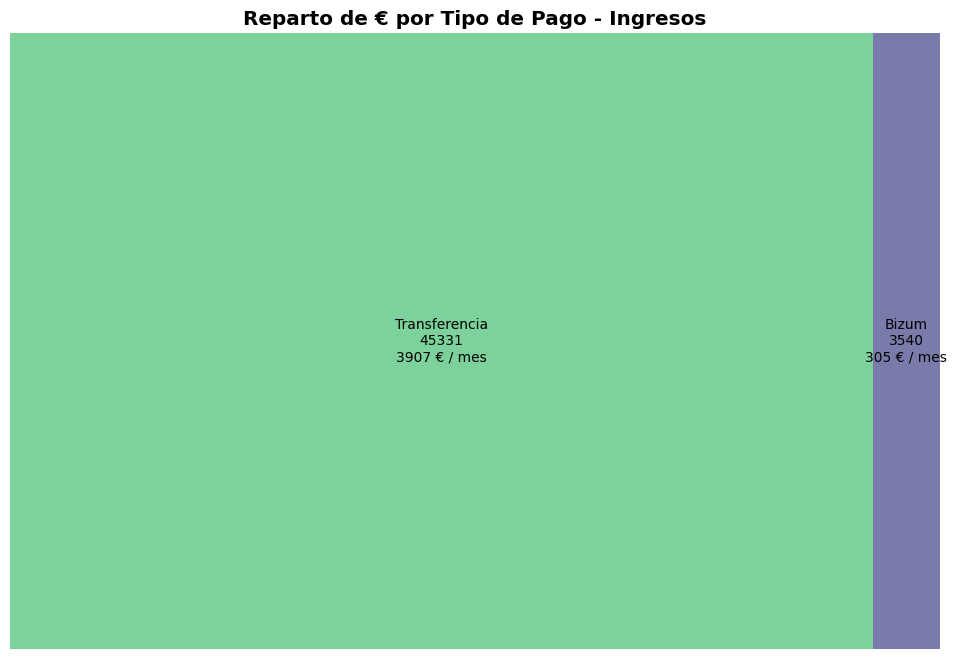

In [304]:
filtro = df_ingresos.groupby('Tipo_Pago')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Tipo de Pago - Ingresos'
graficar_cuadrados(valores, etiquetas, titulo, unidad)

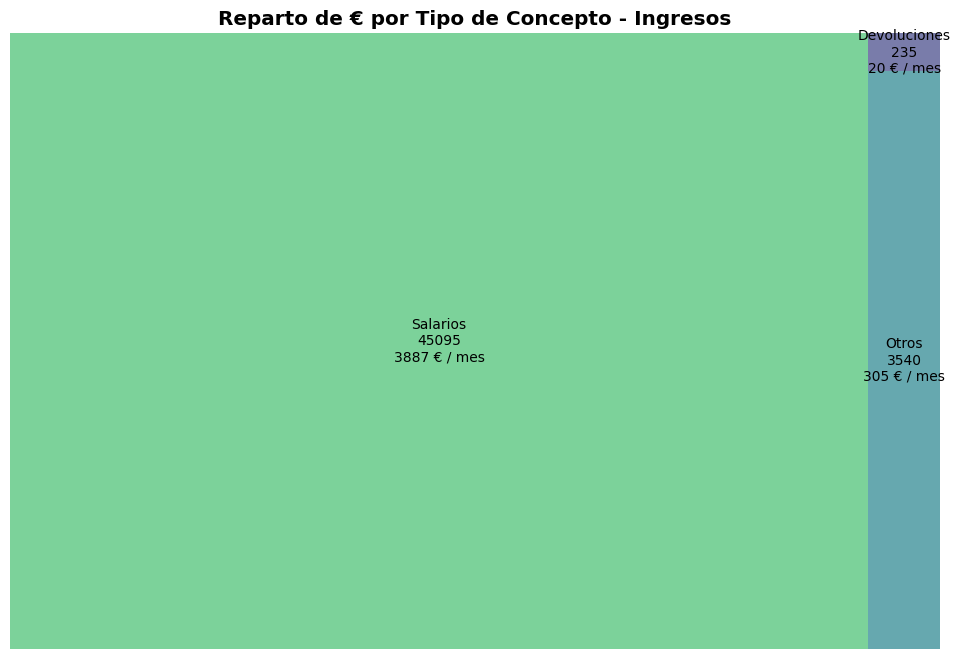

In [305]:
filtro = df_ingresos.groupby('Tipo_Concepto')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Tipo de Concepto - Ingresos'
graficar_cuadrados(valores, etiquetas, titulo, unidad)

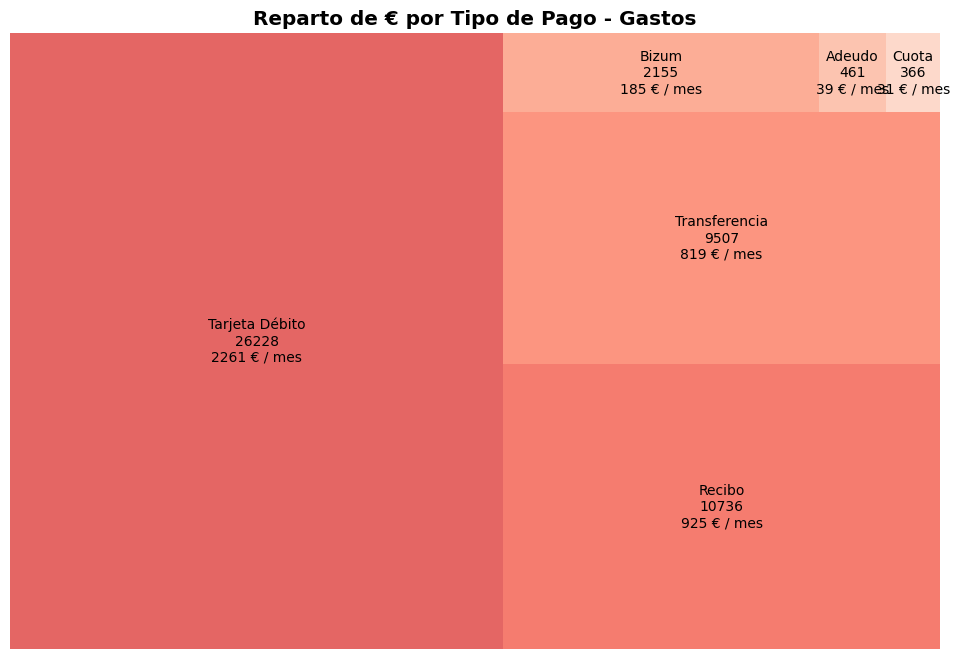

In [315]:
filtro = df_gastos.groupby('Tipo_Pago')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Tipo de Pago - Gastos'
graficar_cuadrados(valores, etiquetas, titulo, unidad, colormap_rojos)

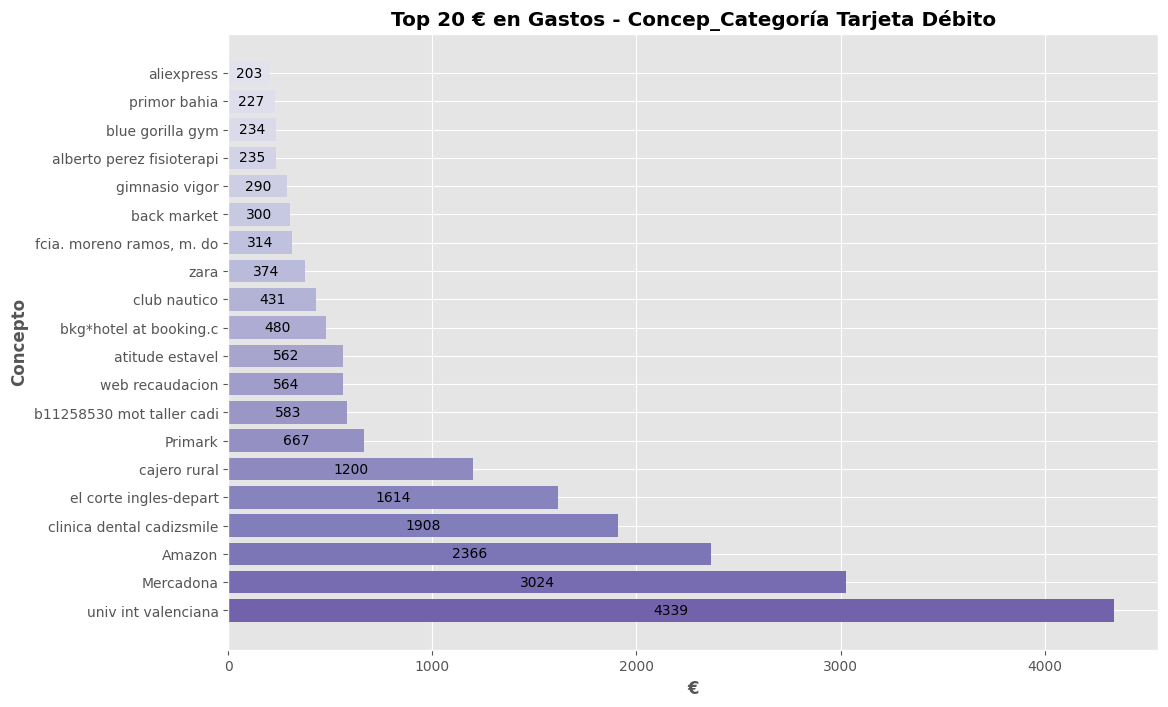

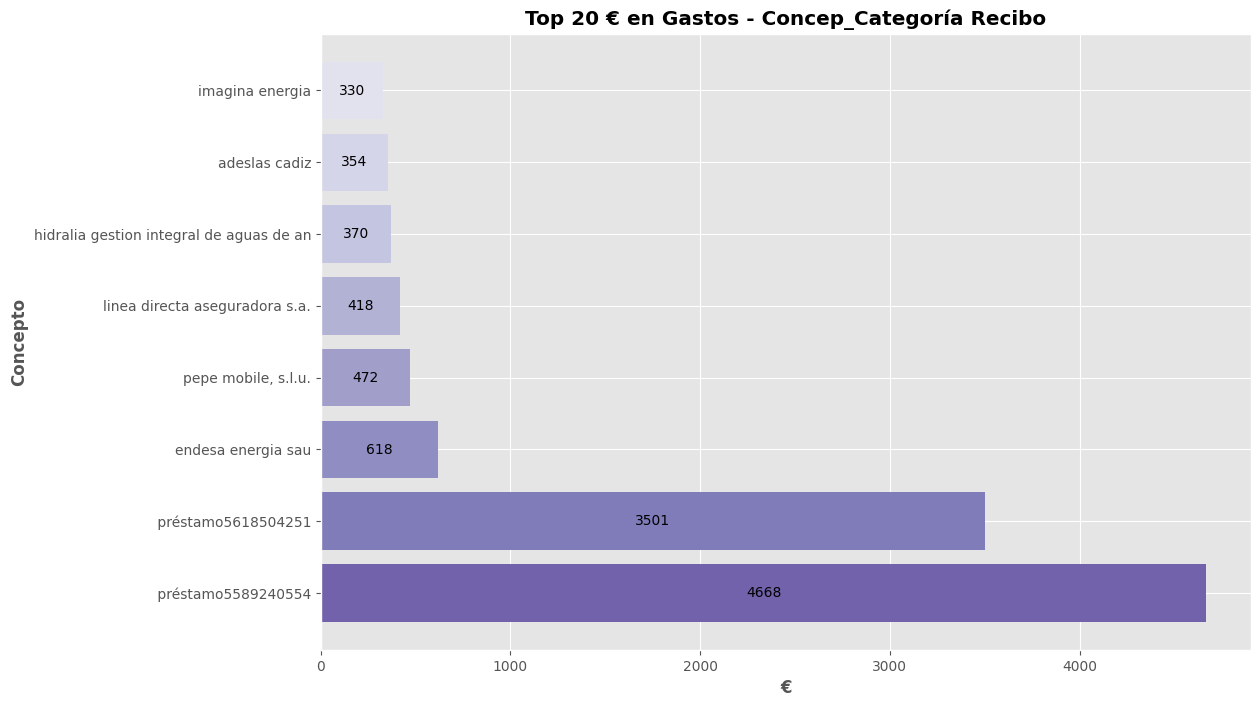

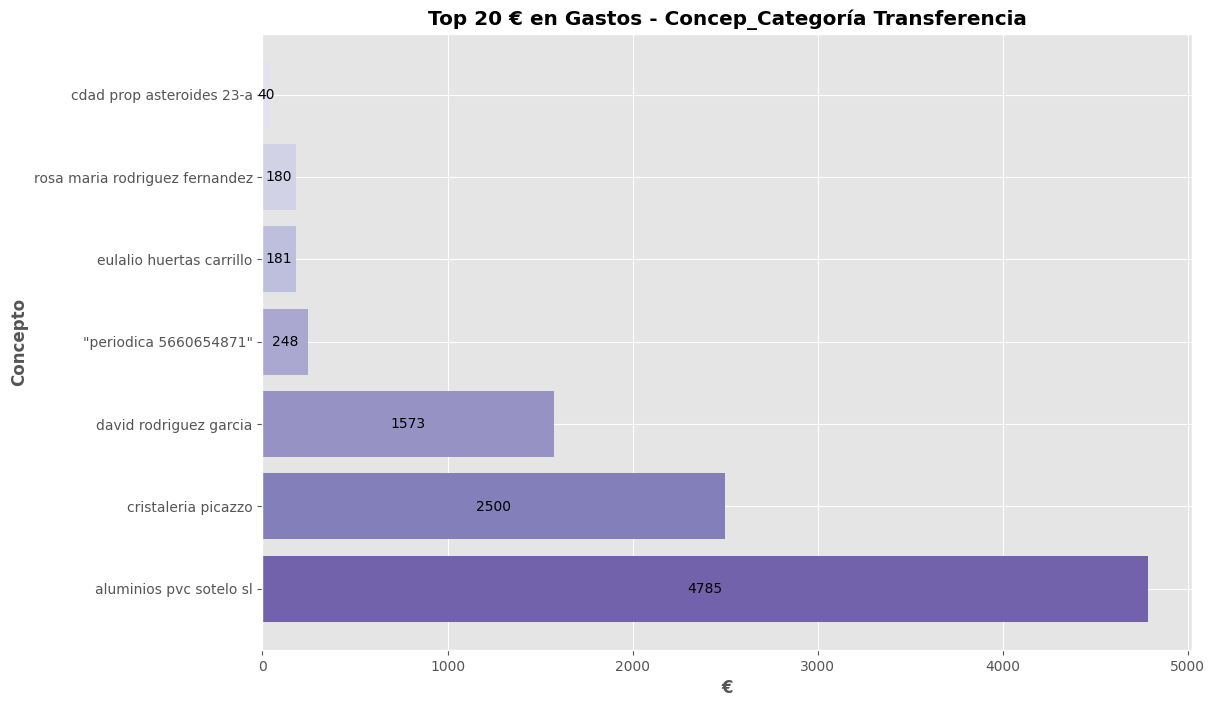

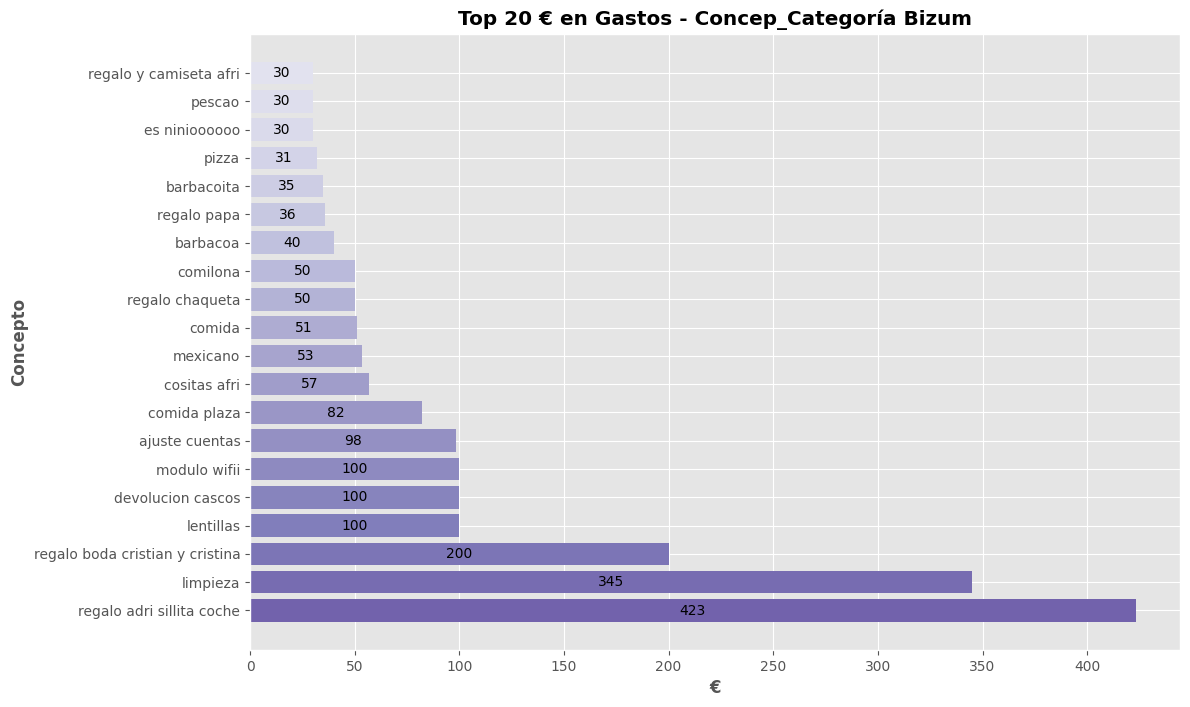

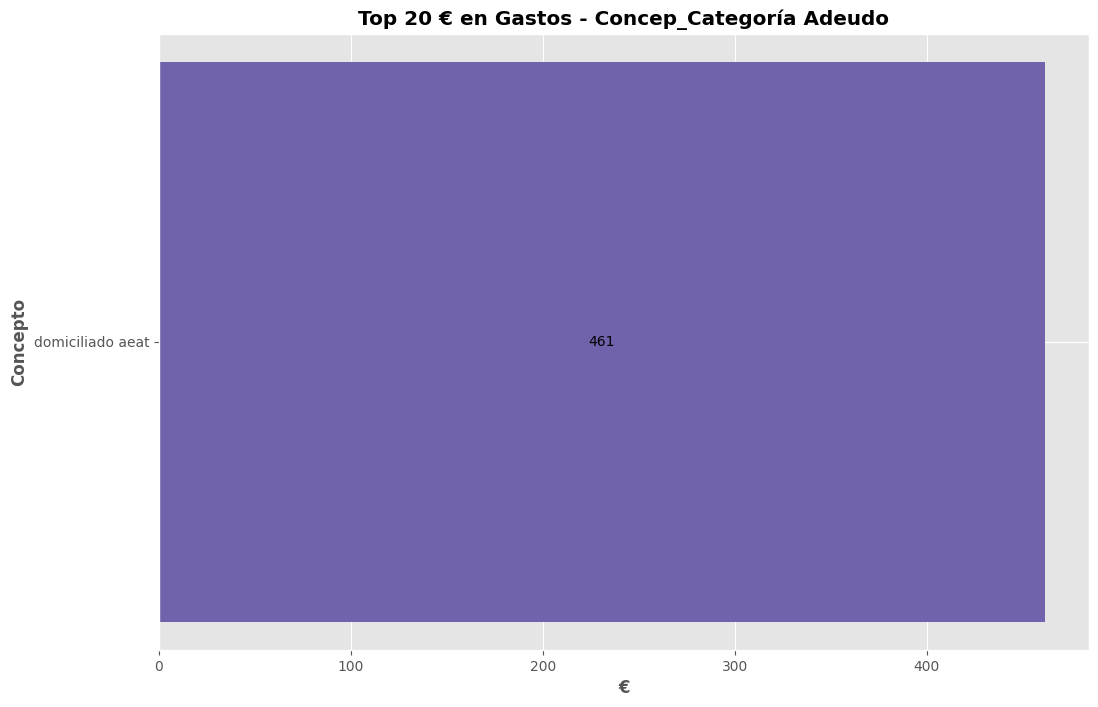

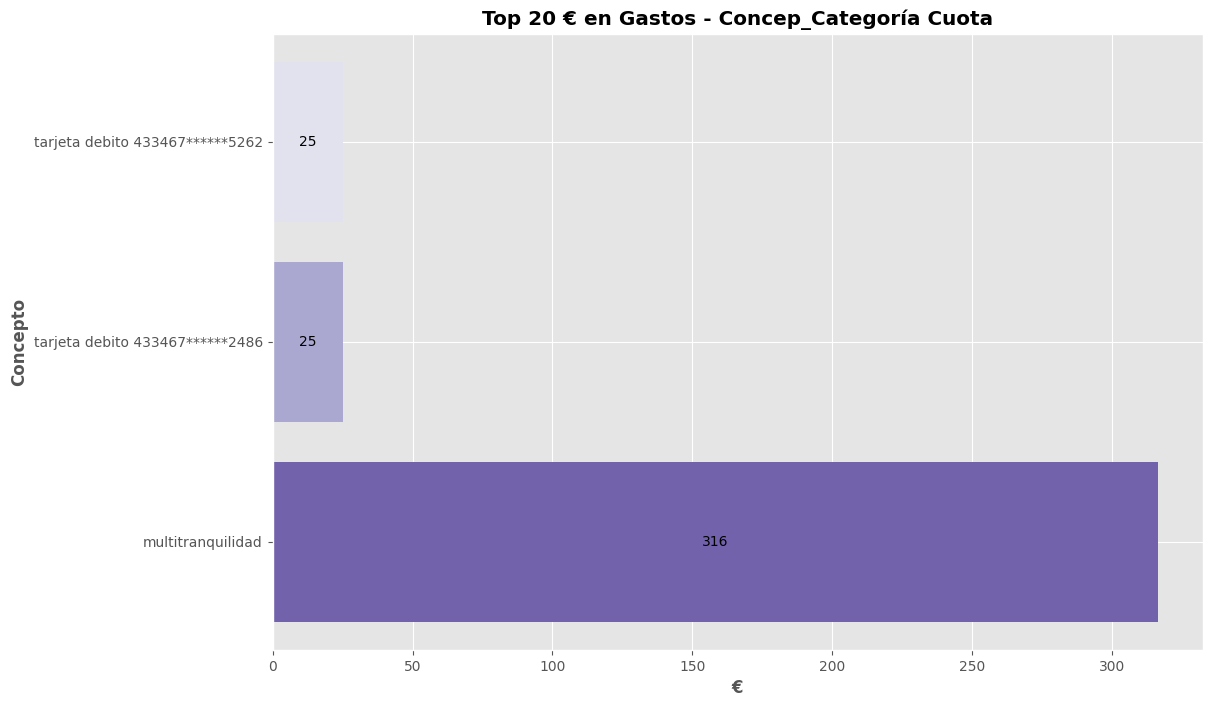

In [316]:
max_resultados = 20
for etiqueta in etiquetas:
    filtro = df_gastos[df_gastos['Tipo_Pago'] == etiqueta].groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
    valores = list(filtro.values)
    _etiquetas = list(filtro.index)
    unidad = '€'
    titulo = f"Top {max_resultados} {unidad} en Gastos - Concep_Categoría {etiqueta}"
    graficar_barh(valores, _etiquetas, titulo, unidad, colormap_lilas)
    plt.show()

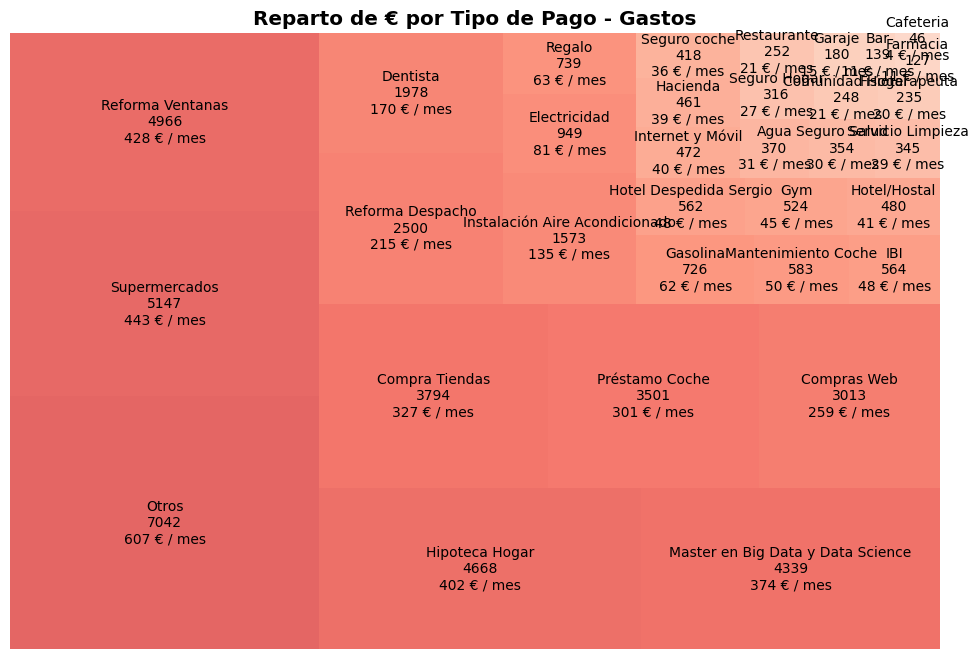

In [307]:
filtro = df_gastos.groupby('Concep_Aclarativo')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Tipo de Pago - Gastos'
graficar_cuadrados(valores, etiquetas, titulo, unidad, colormap_rojos)

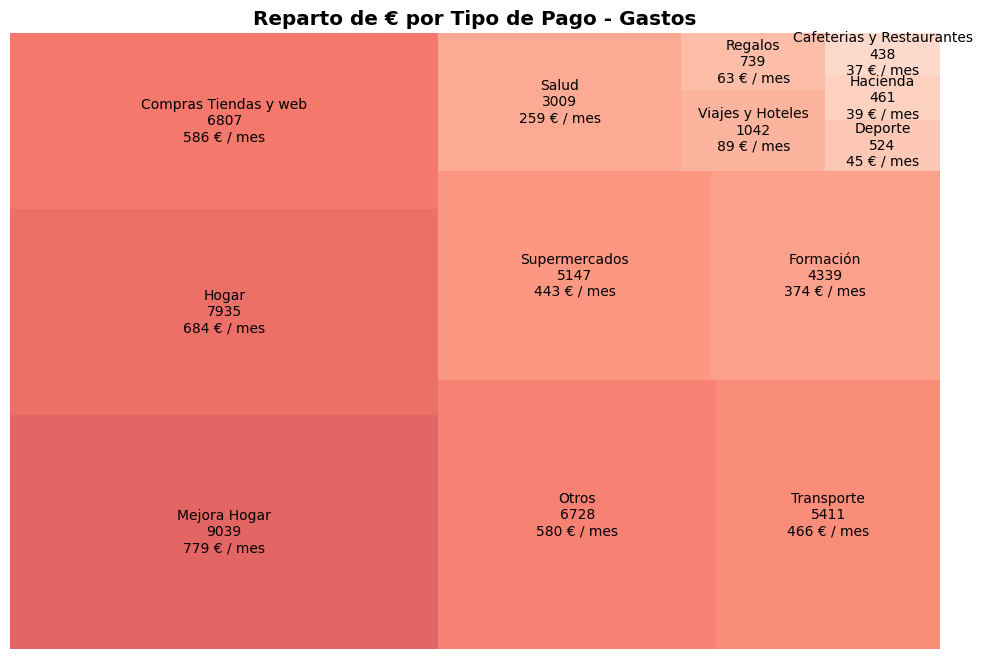

In [311]:
filtro = df_gastos.groupby('Concep_Categoria')['Importe'].sum().sort_values(ascending = False)
valores = list(filtro.values)
etiquetas = list(filtro.index)
unidad = '€'
titulo = f'Reparto de {unidad} por Tipo de Pago - Gastos'
graficar_cuadrados(valores, etiquetas, titulo, unidad, colormap_rojos)

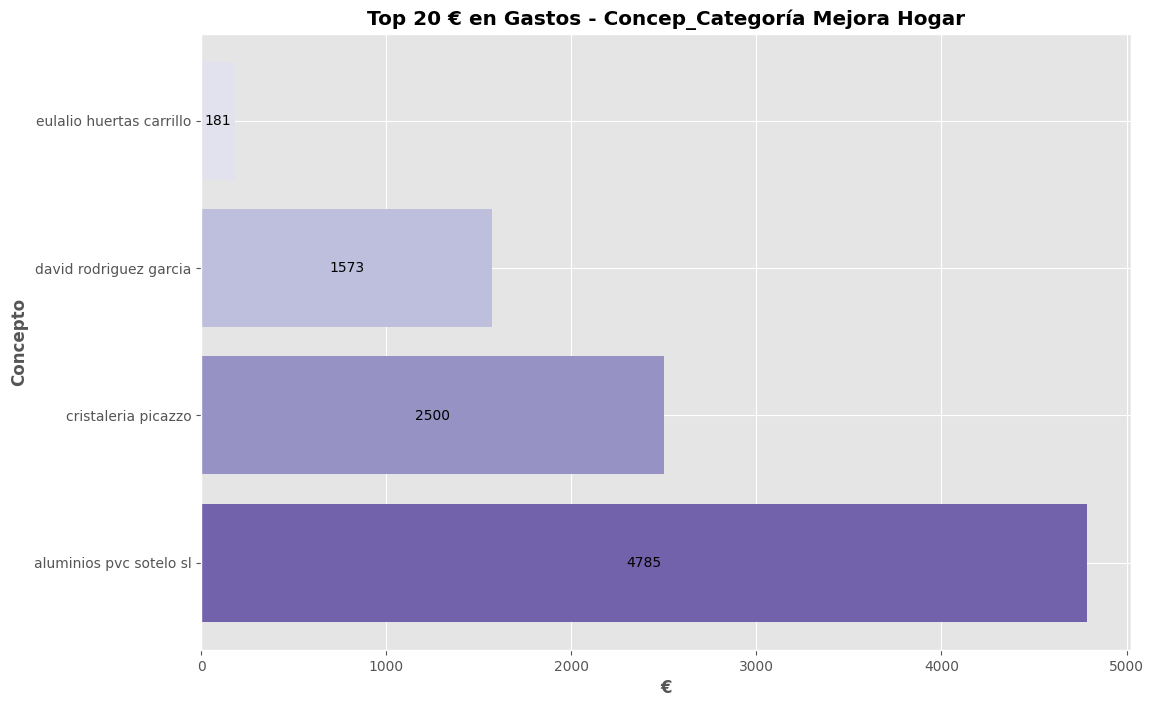

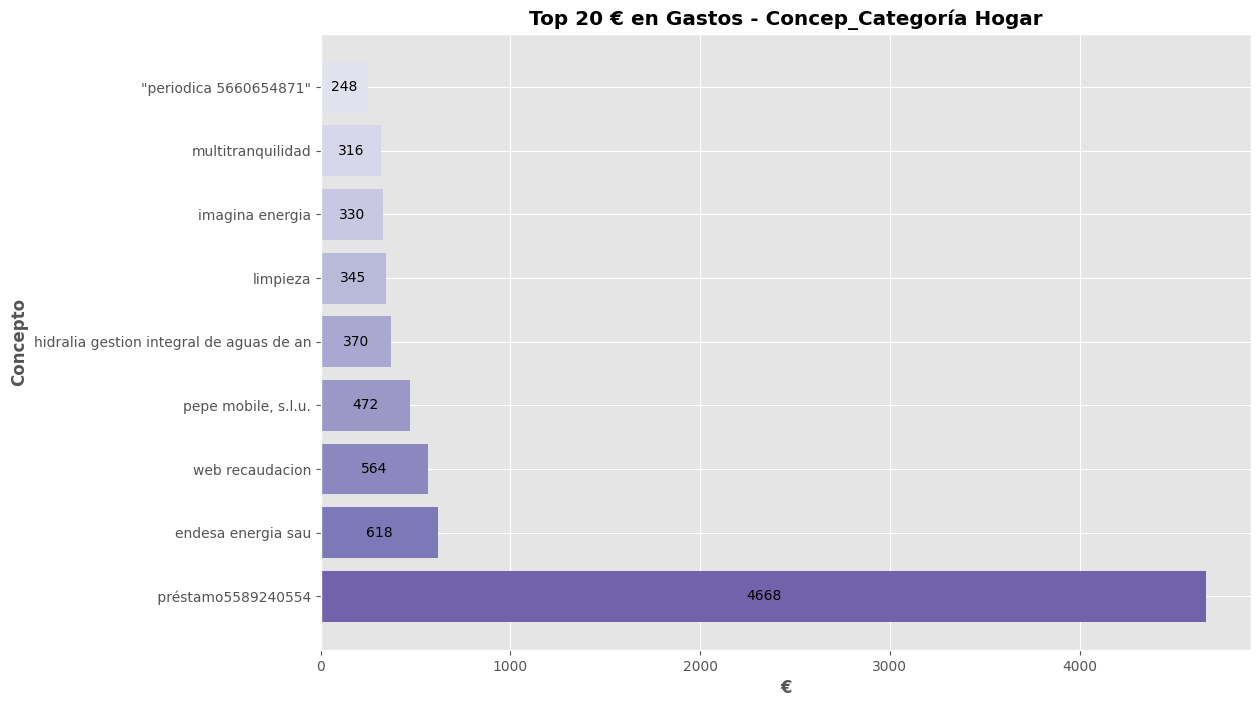

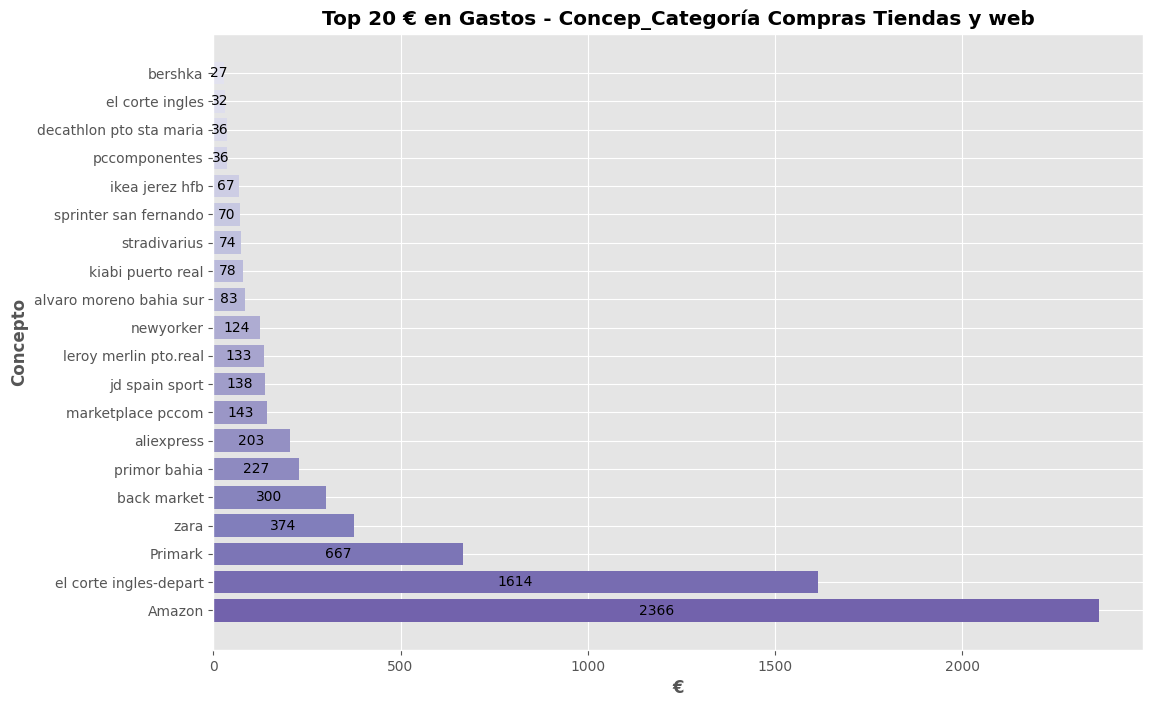

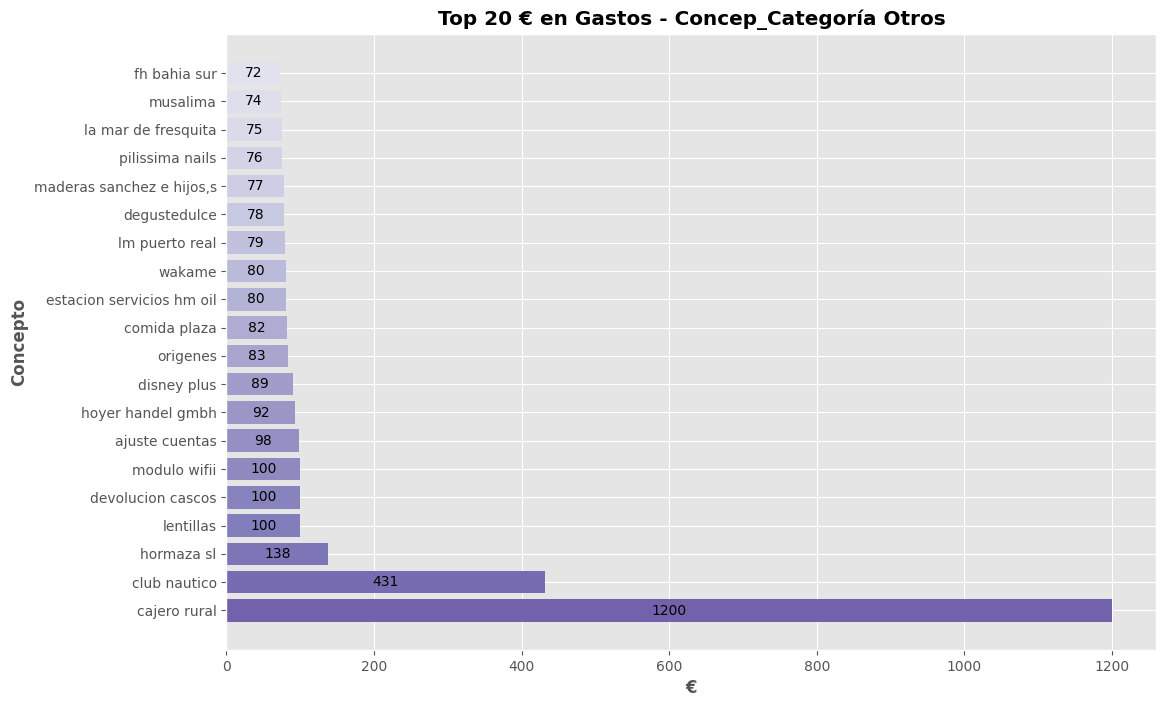

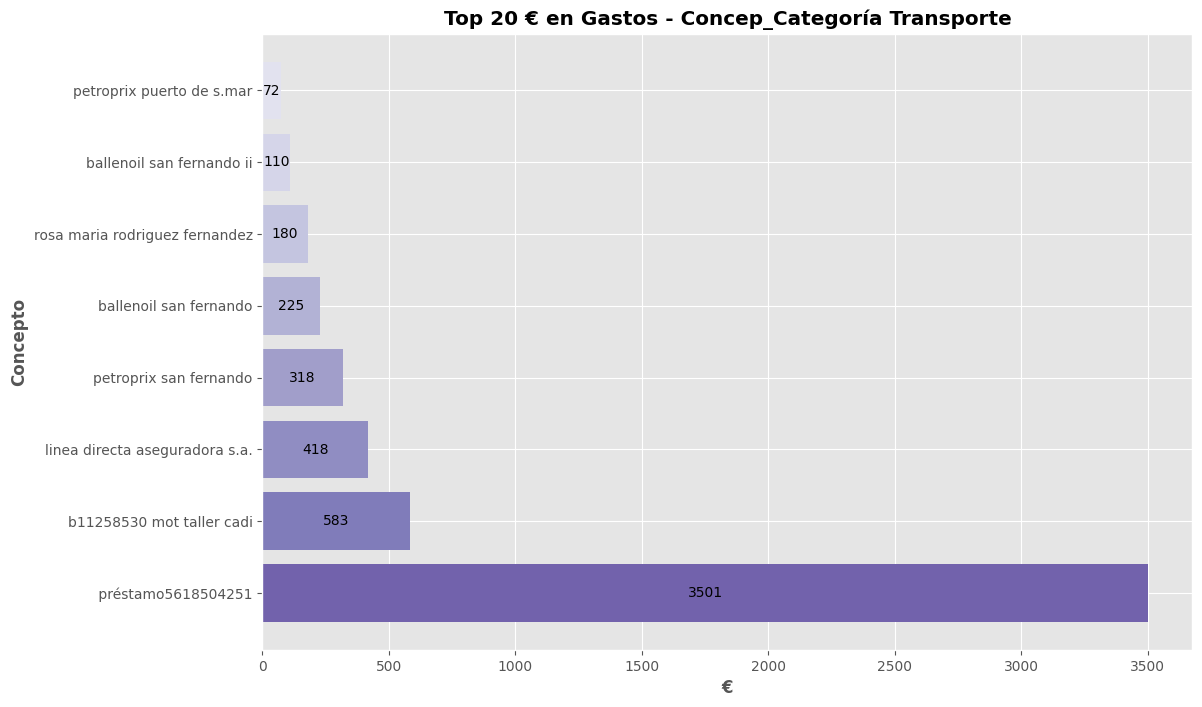

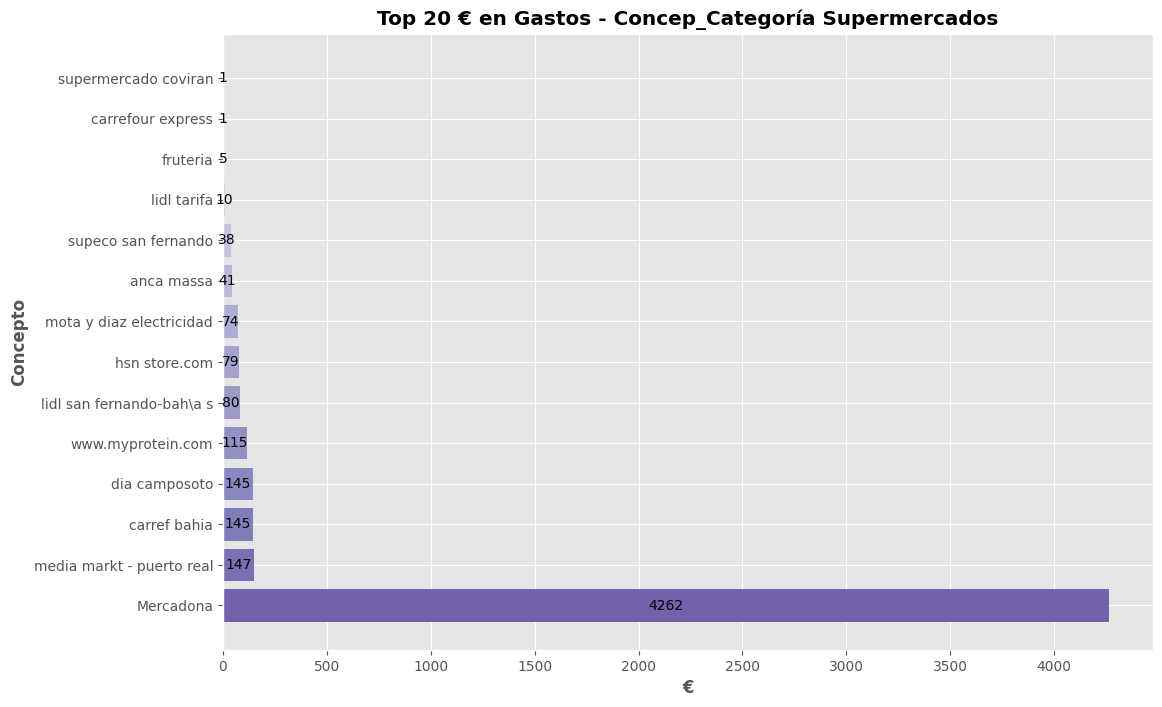

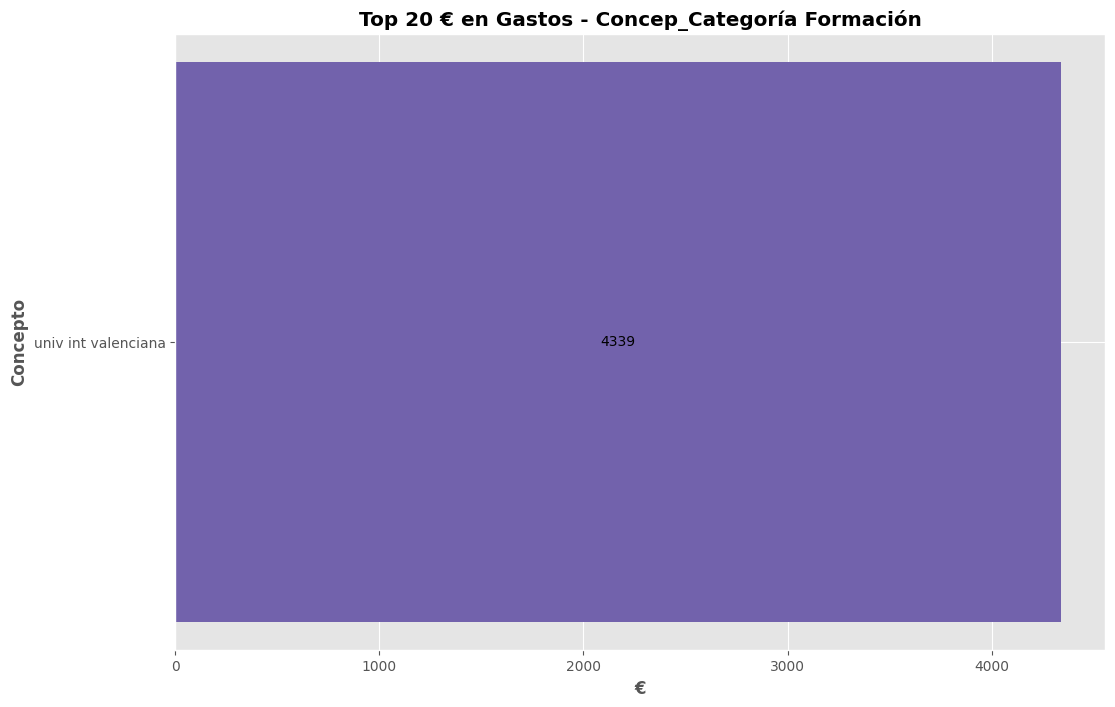

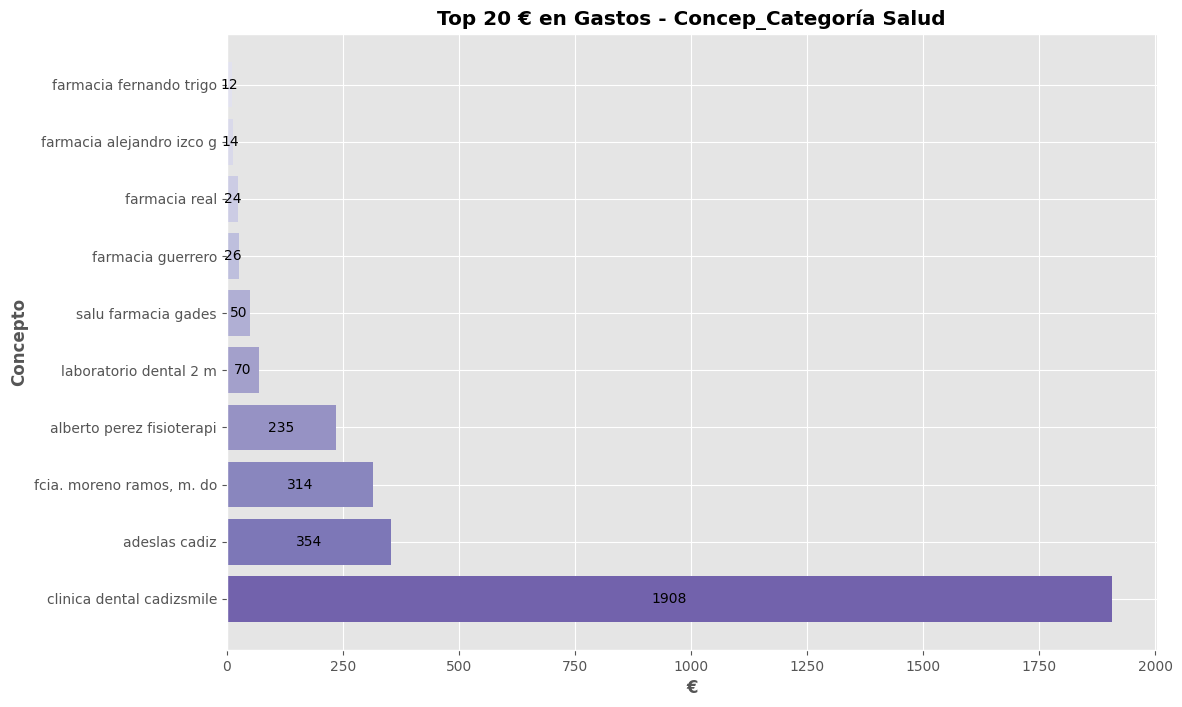

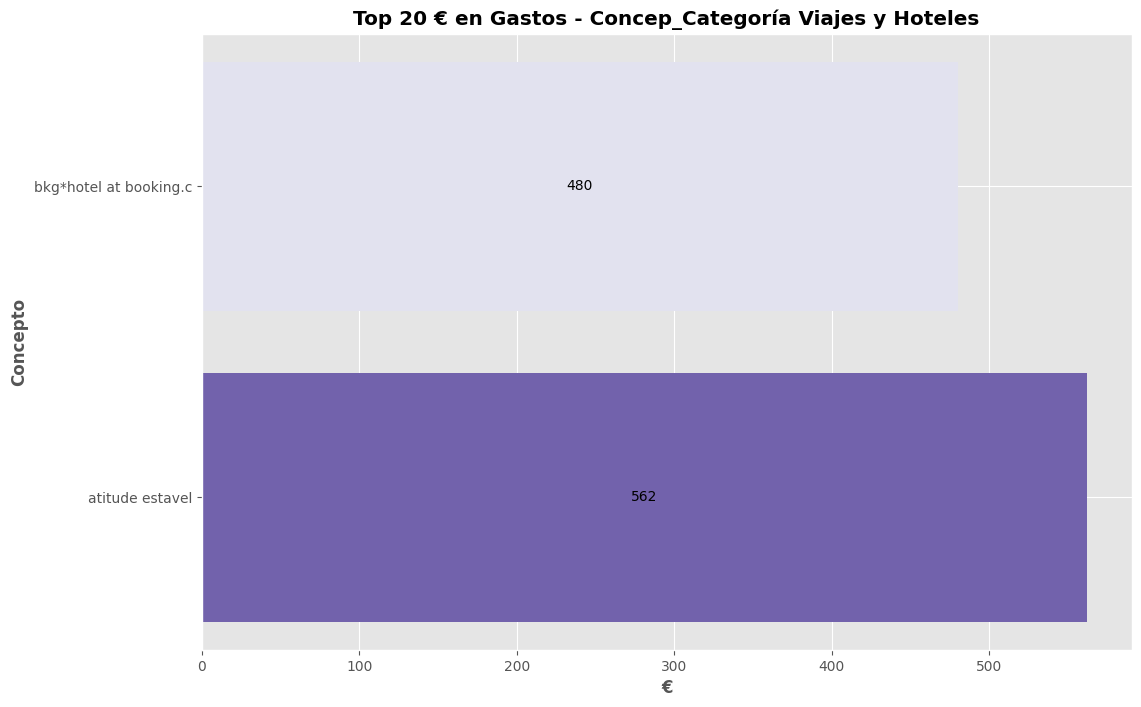

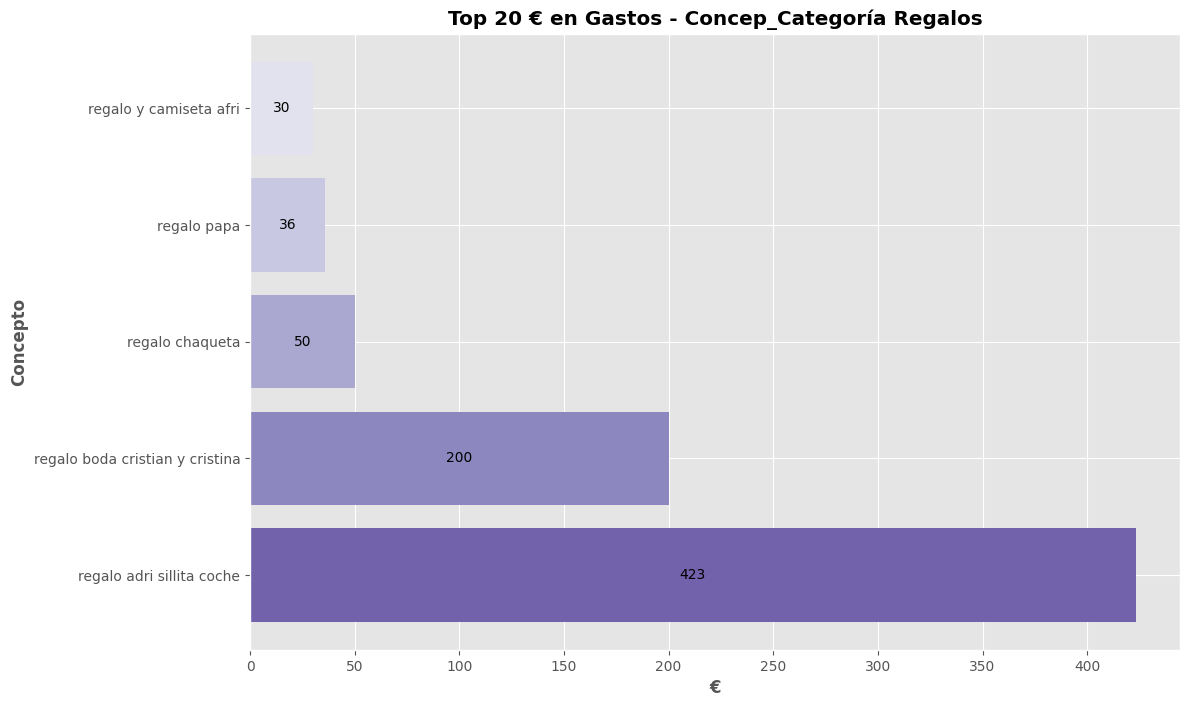

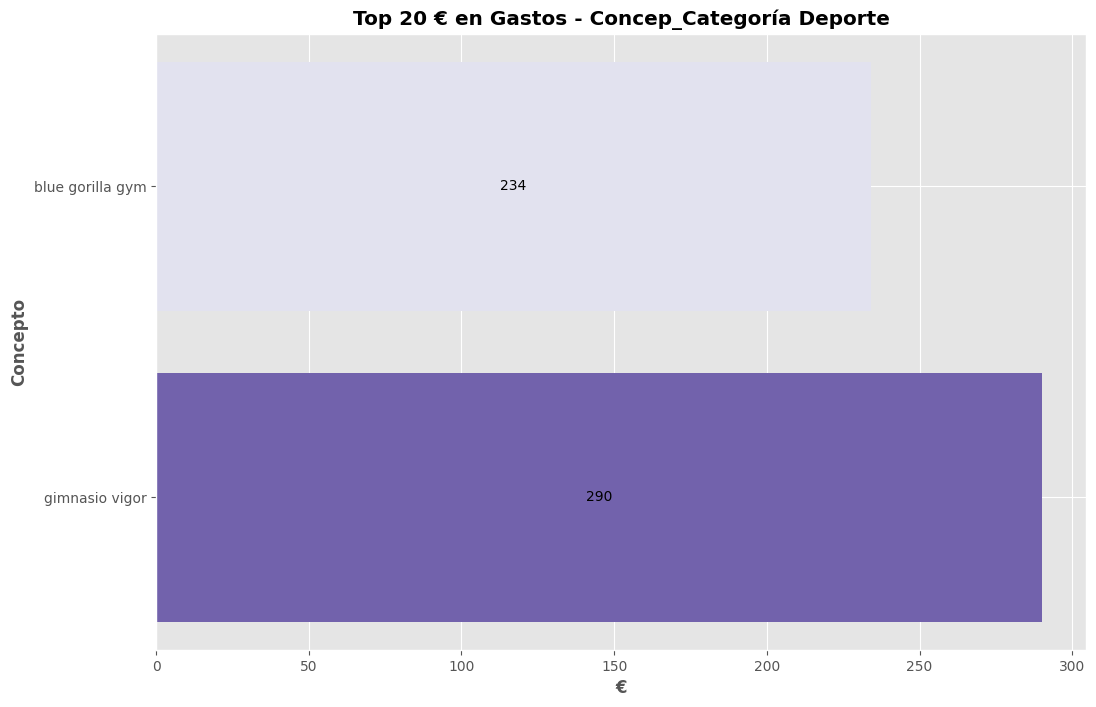

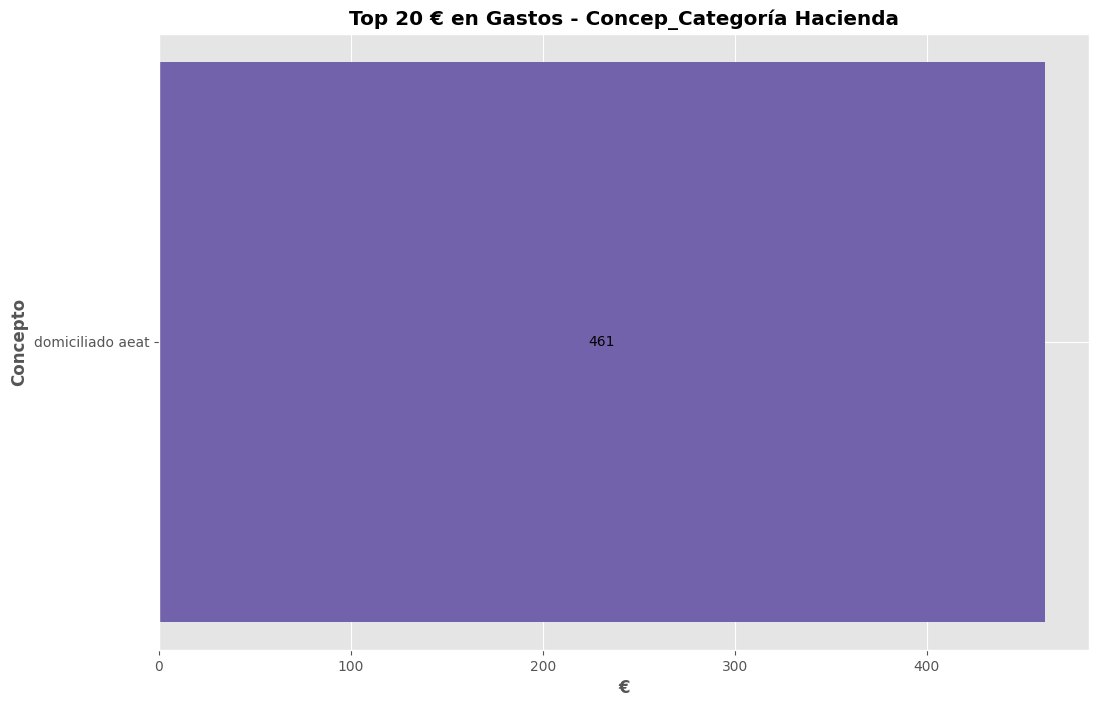

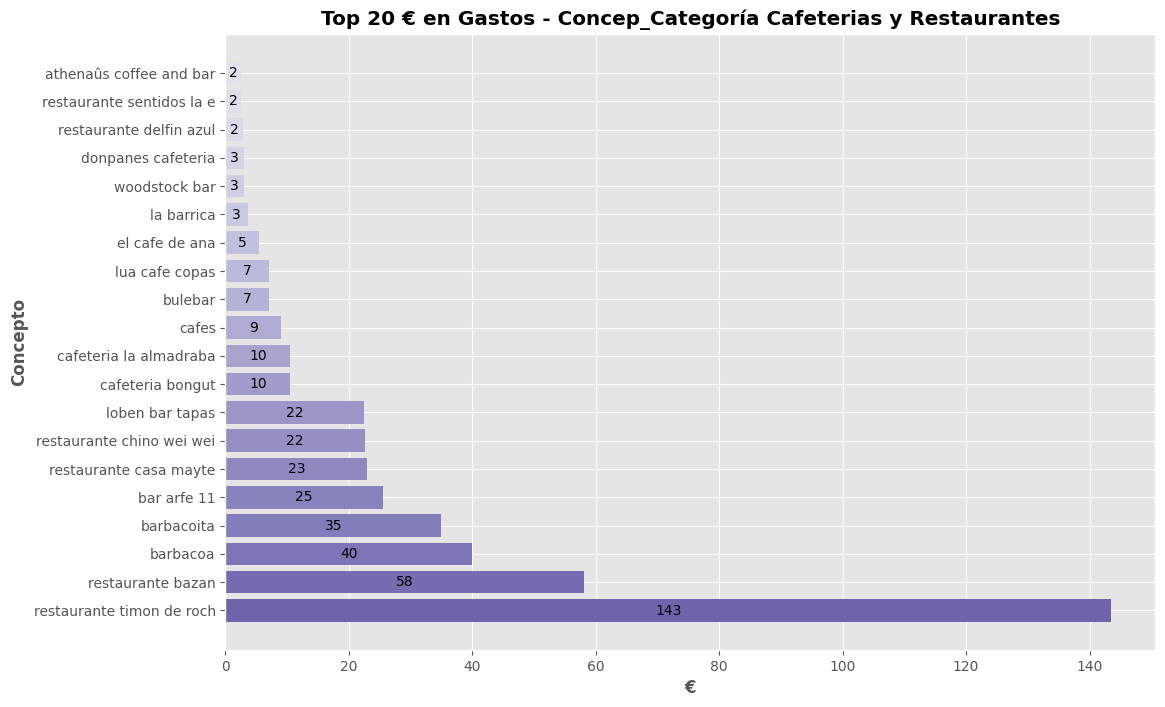

In [314]:
max_resultados = 20
for etiqueta in etiquetas:
    filtro = df_gastos[df_gastos['Concep_Categoria'] == etiqueta].groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(max_resultados)
    valores = list(filtro.values)
    _etiquetas = list(filtro.index)
    unidad = '€'
    titulo = f"Top {max_resultados} {unidad} en Gastos - Concep_Categoría {etiqueta}"
    graficar_barh(valores, _etiquetas, titulo, unidad, colormap_lilas)
    plt.show()

In [310]:
df_gastos[df_gastos['Concep_Categoria'] == 'Otros'].groupby('Concepto')['Importe'].sum().sort_values(ascending = False).head(30)

Concepto
cajero rural                 1200.00
club nautico                  431.40
hormaza sl                    138.20
lentillas                     100.00
devolucion cascos             100.00
modulo wifii                  100.00
ajuste cuentas                 98.60
hoyer handel gmbh              92.89
disney plus                    89.90
origenes                       83.30
comida plaza                   82.00
estacion servicios hm oil      80.81
wakame                         80.20
lm puerto real                 79.15
degustedulce                   78.70
maderas sanchez e hijos,s      77.94
pilissima nails                76.00
la mar de fresquita            75.60
musalima                       74.00
fh bahia sur                   72.95
la cabaãa                      67.30
ayuntamiento de cadiz          67.25
tinmar sport sl                66.98
sp yepoda.es                   65.81
la alacena del aljarafe        64.55
asador la taberna de beni      62.00
nueva optica san rafael      

In [273]:
df_gastos[df_gastos['Concepto'] == 'atitude estavel']

Fecha         Concepto  Importe       Tipo_Pago    Rango_Importe  \
315 2023-06-14  atitude estavel   281.16  Tarjeta Débito  [104.49, 600.0]   
317 2023-06-15  atitude estavel   181.14  Tarjeta Débito  [104.49, 600.0]   
318 2023-06-15  atitude estavel   100.02  Tarjeta Débito    [0.2, 103.77]   

          Concep_Aclarativo  Concep_Categoria  
315  Hotel Despedida Sergio  Viajes y Hoteles  
317  Hotel Despedida Sergio  Viajes y Hoteles  
318  Hotel Despedida Sergio  Viajes y Hoteles

In [274]:
stats.kurtosis(df_gastos_muy_frecuente['Importe'])

NameError: name 'df_gastos_muy_frecuente' is not defined

Al ser positivo el exceso de kurtosis, diríamos que *df_gastos_muy_frecuente* es una distribución leptocúrtica (valores cercanos a su media)

In [ ]:
np.mean(df_gastos_muy_frecuente['Importe'])

23.070228310502284

La media son unos 23 €

In [ ]:
stats.kurtosis(df_gastos_frecuente['Importe'])

-0.13684563938632932

Por el contrario, *df_gastos_frecuente* es platicúrtica, ya que el exceso de kurtosis es negativo, y esto significa que sus valores están más alejados de su media.

In [ ]:
np.mean(df_gastos_frecuente['Importe'])

257.4291025641026

La media son unos 260 €

Ahora se va a utilizar el coeficiente de simetría (skewness). Un asimetría positiva significa más valores a la derecha de la media que a la izquierda. Negativo, más a la izquierda (o más cola al a izquierda) que en la derecha. Una distribución normal perfecta es la que tiene un coeficiente de simetria = 0.

In [ ]:
stats.skew(df_gastos_muy_frecuente['Importe'])

1.4478872813647659

Al ser positiva, estamos diciendo que la distribución tiene más valores por encima de los 23 € que por debajo.

Observando la distribución *df_gastos_muy_frecuente['Importe']* , debe ocurrir igual

In [ ]:
stats.skew(df_gastos_frecuente['Importe'])

NameError: name 'df_gastos_frecuente' is not defined

In [ ]:
df_gastos['Importe'].cumsum()

0         90.00
1        140.00
2        190.00
3        245.48
4        304.48
         ...   
765    51246.79
766    51256.79
767    51548.63
768    51620.90
769    51624.10
Name: Importe, Length: 770, dtype: float64

# **5-COMPARACIONES y GRAFICADO FINAL**

In [ ]:
def generar_y_linea_tendencia(valores):
    x = np.linspace(0, len(valores), len(valores))
    y = valores
    #Obtener coeficientes de la ecuación recta de tendencia
    coef = np.polyfit(x, y, 1)  # El último parámetro es el grado del polinomio, 1 para una línea recta
    # Crear una función polinómica con los coeficientes calculados
    polynomial = np.poly1d(coef)
    #Devuelve los valores de acuerdo a dicha funcion
    y = polynomial(x)
    return y

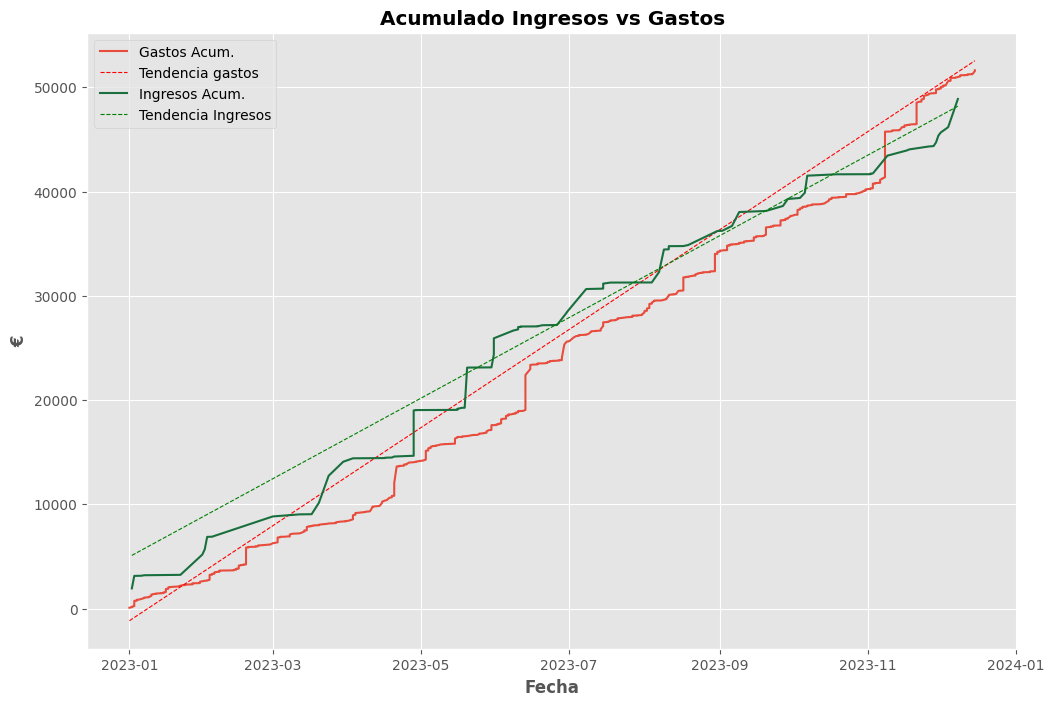

In [ ]:
#Gastos
etiquetas = df_gastos['Fecha']
valores = df_gastos['Importe'].cumsum()
plt.plot(etiquetas, valores, label = "Gastos Acum.", color = colores_I_G[1])
#Calcular tendencias
y = generar_y_linea_tendencia(valores)
#Extraemos el primer y último dato de los valores y etiquetas para pintar una recta perfecta
etiquetas_recta = [etiquetas.iloc[0], etiquetas.iloc[-1]]
y_recta = [y[0], y[-1]]
plt.plot(etiquetas_recta, y_recta, label = "Tendencia gastos", color = 'r', linewidth = 0.8, linestyle = '--')

#Ingresos
etiquetas = df_ingresos['Fecha']
valores = df_ingresos['Importe'].cumsum()
plt.plot(etiquetas, valores, label = "Ingresos Acum.", color = colores_I_G[0])
#Calcular tendencias
y = generar_y_linea_tendencia(valores)
#Extraemos el primer y último dato de los valores y etiquetas para pintar una recta perfecta
etiquetas_recta = [etiquetas.iloc[0], etiquetas.iloc[-1]]
y_recta = [y[0], y[-1]]
#Se pinta la linea de tendencia
plt.plot(etiquetas_recta, y_recta, label = "Tendencia Ingresos", color = 'g', linewidth = 0.8, linestyle = '--')

plt.title("Acumulado Ingresos vs Gastos")
plt.xlabel("Fecha")
plt.ylabel("€")
plt.legend() 

Ahora se pueden ver las distribuciones de importes pero mostrando los rangos de outliers

Text(0.5, 1.0, 'Distrubución de Importes')

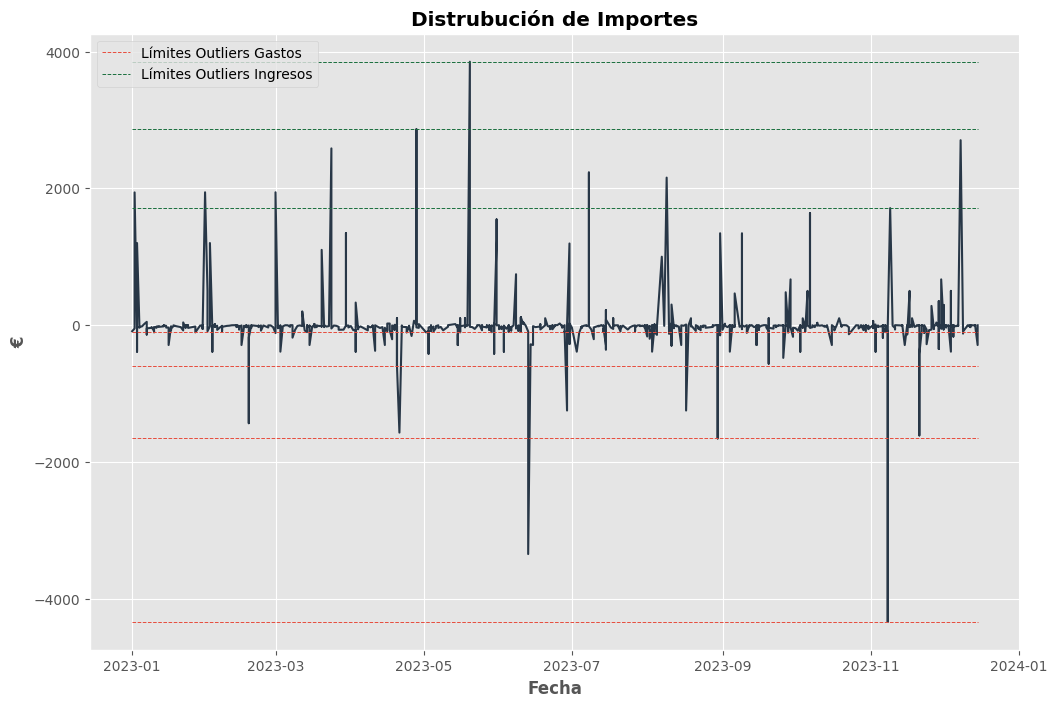

In [ ]:
etiquetas = df['Fecha']
valores = df['Importe']
plt.plot(etiquetas, valores, color = '#283747')
#Pintar lineas de ouliers
check_label_gastos = False
check_label_ingresos = False
for _df in list_df_rangos_gastos:
    valor_outlier = [max(_df['Importe']) * (-1) for i in range(len(etiquetas))]
    if check_label_gastos == False:
        plt.plot(etiquetas, valor_outlier, color = colores_I_G[1], linewidth = 0.7, linestyle = '--', label = 'Límites Outliers Gastos')
        check_label_gastos = True
    else:
        plt.plot(etiquetas, valor_outlier, color = colores_I_G[1], linewidth = 0.7, linestyle = '--')

for _df in list_df_rangos_ingresos:
    valor_outlier = [max(_df['Importe']) for i in range(len(etiquetas))]
    if check_label_ingresos == False:
        plt.plot(etiquetas, valor_outlier, color = colores_I_G[0], linewidth = 0.7, linestyle = '--', label = 'Límites Outliers Ingresos')
        check_label_ingresos = True
    else:
        plt.plot(etiquetas, valor_outlier, color = colores_I_G[0], linewidth = 0.7, linestyle = '--')

plt.xlabel('Fecha')
plt.ylabel('€')
plt.legend()
plt.title('Distrubución de Importes')

# 5.1- Recuento de múltiples grupos

La función pivot_table en pandas se utiliza para crear tablas dinámicas (pivot tables) en el estilo de las que se encuentran en hojas de cálculo como Excel. Permite resumir y reorganizar los datos de un DataFrame, proporcionando una forma conveniente de analizar y visualizar la información.

In [ ]:
def pivot_recuento(df, calc_field, rows, columns):
    df_pivot = df.pivot_table(values = calc_field,
                        index = rows,
                        columns = columns,
                        aggfunc='sum')
    return df_pivot

In [ ]:
df_gastos_pivot = pivot_recuento(df_gastos, 'Importe', 'Fecha', 'Rango_Importe')

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(df_gastos['Concepto'],df_gastos['Importe'], annot = True, fmt = 'g')

TypeError: heatmap() takes 1 positional argument but 2 positional arguments (and 2 keyword-only arguments) were given

<AxesSubplot: xlabel='Rango_Importe', ylabel='Fecha'>

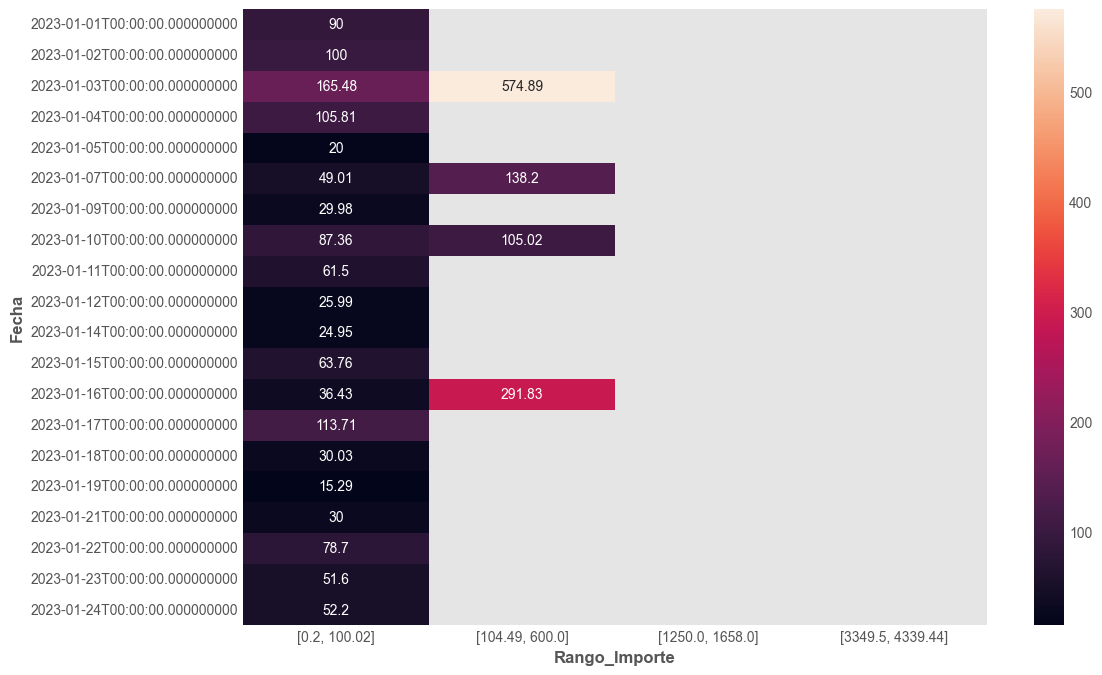

In [ ]:
sns.heatmap(df_gastos_pivot.head(20), annot=True, fmt='g')

In [ ]:
orden_col_gastos = ['Fecha', 'Concepto', 'Concep_Aclarativo', 'Concep_Categoria', 'Tipo_Pago','Importe', 'Rango_Importe']
orden_col_ingresos = ['Fecha', 'Concepto', 'Tipo_Concepto', 'Importe','Tipo_Pago']
orden_col_gastos_subgrupos = ['Fecha', 'Concepto', 'Concep_Aclarativo', 'Concep_Categoria', 'Tipo_Pago','Importe', 'Nivel_Importe']
orden_col_ingresos_subgrupos = ['Fecha', 'Concepto', 'Tipo_Concepto', 'Importe','Tipo_Pago', 'Nivel_Importe']
df_gastos = df_gastos[orden_col_gastos]
df_ingresos = df_ingresos[orden_col_ingresos]

for _df in list_df_rangos_gastos:
    _df = _df[orden_col_gastos_subgrupos]
for _df in list_df_rangos_ingresos:
    _df = _df[orden_col_ingresos_subgrupos]